# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The initial code was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University) as a starting point for project. https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, application of multi-layer perceptron with one hidden layer and 10 neurons for classifying XOR Dataset is considered.  

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
import pandas as pd
import numpy.matlib
import numpy as np
import matplotlib
import math
plt.style.use('ggplot')
label = [-1,1]

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def trainMLP(X,D,H,eta,alpha,epochMax,MSETarget):
    '''%==========================================================================
    % Call Syntax:  [Wh,Wo,MSE] = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)
    %
    % Description:  The matrix implementation of the Backpropagation algorithm
    %               for a Multilayer Perceptron (MLP).
    %
    % Input Arguments:
    %	Name: X
    %	Type: (p x N) dimensional matrix, where p is a number of the inputs and N is a training size
    %	Description: a series of input oberservation vectors as columns in a matrix
    %
    %	Name: D
    %	Type: (m x N) dimensional matrix, where m is a number of the output neurons and N is a training size
    %	Description: a series of desired output responses as columns in a matrix
    %
    %	Name: H
    %	Type: vector
    %	Description: Number of hidden neurons in each hidden layer
    %
    %	Name: eta
    %	Type: scalar
    %	Description: learning rate parameter
    %
    %	Name: alpha
    %	Type: scalar
    %	Description: momentum parameter
    %
    %	Name: epochMax
    %	Type:  scalar
    %	Description: maximum number of training epochs
    %
    %	Name: MSETarget (optional)
    %	Type:  scalar (default: MSETarget = 1e-12)
    %	Description: target mse error rate
    %
    % Output Arguments:
    %	Name: Wh
    %	Type: Cell arrray, with each cell containing a (H(j) x p+1) dimensional matrix, where H(j) is the number of neurons in the j'th hidden layer
    %	Description: hidden layer weight matrix for each hidden layer
    %
    %	Name: Wo
    %	Type: (m x H(end)+1) dimensional matrix
    %	Description: Output layer weight matrix
    %
    %	Name: MSE
    %	Type: vector
    %	Description: mean square error per epoch
    %
    %--------------------------------------------------------------------------
    % Notes:
    %
    % References:
    % [1] - S. Haykin, Neural Networks and Learning Machines, vol. 3, Pearson,2009
    %
    %--------------------------------------------------------------------------
    % Author: Steven Sandoval
    %--------------------------------------------------------------------------
    % Revision History:
    %
    %          Steven Sandoval - 25 September 2012 - Adapted 2-layer MLP codes by Marcelo Augusto Costa Fernandes (mfernandes@dca.ufrn.br).
    %          Steven Sandoval -   06 October 2012 - Cleaned code, added comments
    %          Steven Sandoval -      01 July 2018 - updated references and variable names, added ReLU activation function
    %          Steven Sandoval -   30 October 2019 - simplified code for EE565 Project
    %          Brandon Byford  -   30 OCtober 2019 - ported to python3 
    %==========================================================================
    ''';
    
    '''%-----------
    %INITIALIZE
    %-----------''';
    
    a = 1.7159
    b = 2/3.
    [p, N] = np.shape(np.array(X))                 #dimension of input vector and number of training data pts
    m = len(D)                                  #number of output neurons
    bias = -1                                      #bias value
    Wh=[]
    WhAnt=[]
    X = np.concatenate([bias*np.ones([1,N]),X ],axis=0)                  #add zero'th order terms
    for j in range(len(H)):
        if j ==0:
            Wh.append(np.random.rand(H[j],p+1))                          #initialize first hidden layer weights
            WhAnt.append(np.zeros([H[j],p+1]))                      #initialize variable for weight correction using momentum 
        else:
            Wh.append( np.random.rand(H[j],H[j-1]+1)  ) #initialize hidden layer weights
            WhAnt.append(np.zeros([H[j],H[j-1]+1]) )                #initialize variable for weight correction using momentum 
            
    Wo = np.random.rand(m,H[-1]+1)                                 #initialize output layer weights
    WoAnt = np.zeros([m,H[-1]+1])                            #initialize variable for weight correction using momentum
    MSETemp = np.zeros([epochMax,1])                   #allocate memory for MSE error for each epoch

    for i in range(epochMax):
        O=[]
        '''%-------------------------------------------------
        %PROPAGATE INPUTS FORWARD
        %-------------------------------------------------''';
        
        '''%------------------------
        %HIDDEN LAYER
        %------------------------''';
        for j in range(len(H)):               #%loop over each hidden layer
            if j==0:
                V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
            else:
                V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
            PHI = a * np.tanh(b*V)         #%activation function [1] Eqn(4.37)
            O.append(np.concatenate([bias*np.ones([1,N]),PHI],axis=0))   #%add zero'th order terms
        
        '''%------------------------
        %OUTPUT LAYER
        %------------------------''';
        V = Wo@O[-1]                 #%weighted sum of inputs [1] Eqn(4.29)
        Y = a * np.tanh(b*V)       #%activation function [1] Eqn(4.37)


        '''%------------------------
        %ERROR CALCULATION 
        %------------------------''';
        E = D - Y                  #%calclate error
        mse = np.mean(E**2)    #%calculate mean square error
        
        MSETemp[i,0] = mse           #%save mse

        #%DISPLAY PROGRESS, BREAK IF ERROR CONSTRAINT MET
        print('epoch = ' +str(i)+ ' mse = ' +str(mse))
        if (mse < MSETarget):
            MSE = MSETemp
            return(Wh,Wo,MSE)
        
        '''%-------------------------------------------------
        %BACK PROPAGATE ERROR
        %-------------------------------------------------

        %------------------------
        %OUTPUT LAYER
        %------------------------''';
        PHI_PRMo = b/a *(a-Y)*(a+Y)   #%derivative of activation function [1] Eqn(4.38)

        dGo = E * PHI_PRMo                 #%local gradient [1] Eqn(4.35/39)
        DWo = dGo@O[-1].T                    #%non-scaled weight correction [1] Eqn(4.27)

        Wo = Wo + eta*DWo + alpha*WoAnt  #%weight correction including momentum term [1] Eqn(4.41)
        WoAnt = eta*DWo + alpha*WoAnt                         #%save weight correction for momentum calculation

        '''%------------------------
        %HIDDEN LAYERS
        %------------------------''';
        
        
        for j in np.arange(len(H))[::-1]:
            PHI_PRMh = b/a *(a-O[j])*(a+O[j])         #%derivative of activation function [1] Eqn(4.38)
            
            if j==(len(H)-1):
                dGh = PHI_PRMh * (Wo.T @ dGo)                   #%local gradient[1] Eqn(4.36/40)
            else:
                dGh = PHI_PRMh * (Wh[j+1].T @ np.matlib.repmat( dGo,Wh[j+1].shape[0],1 ) )         # %local gradient[1] Eqn(4.36/40)
            dGh = dGh[1:,:]                             #%dicard first row of local gradient (bias doesn't update)
            
            if j==0:
                DWh = dGh@X.T                            #%non-scaled weight correction [1] Eqn(4.27/30)
            else:
                DWh = dGh@O[j-1].T                       #%non-scaled weight correction [1] Eqn(4.27/31)
            
            Wh[j] =Wh[j]+ eta*DWh + alpha*WhAnt[j]  # %weight correction including momentum term [1] Eqn(4.41)
            WhAnt[j] =eta*DWh + alpha*WhAnt[j]     #%save weight correction for momentum calculation

    MSE = MSETemp
    return(Wh,Wo,MSE)

In [3]:
def MLP(X,Wh,Wo):
    '''%-----------
    %INITIALIZE
    %-----------''';
    a = 1.7159
    b = 2/3.
    N = len(X[0,:])               #%number of training data pts
    bias = -1                  # %initial bias value
    O=[]
    X = np.concatenate((bias*np.ones([1,N]) , X),axis=0)    #%add zero'th order terms
    H=[]
    for j in range(len(Wh)):
        H.append(len(Wh[j]))
    
    
    '''
    %-----
    %MAIN
    %-----

    %-------------------------------------------------
    %PROPAGATE INPUTS FORWARD
    %-------------------------------------------------
    %------------------------
    %HIDDEN LAYER
    %------------------------''';
    
    for j in range(len(H)):               #%loop over each hidden layer
        if j==0:
            V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
        else:
            V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
        
        PHI = a * np.tanh(b*V)     #%acivation function [1] Eqn(4.37)
        O.append( np.concatenate((bias*np.ones([1,N]),PHI),axis=0))   #%add zero'th order terms
    

    '''%------------------------
    %OUTPUT LAYER
    %------------------------''';
    V = Wo@O[-1]            #%weighted sum of inputs [1] Eqn(4.29)
    Y = a * np.tanh(b*V)    #%activation function [1] Eqn(4.37)

    return Y

In [4]:
def circGuass(N,Mean,VAR):
    dimension = len(Mean)
    a = np.array(Mean)
    p = np.random.randn(dimension,N)
    h = np.tile(a, (2, N//2))
    x = math.sqrt(Var) * p + h
    return x

In [5]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [6]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh1,Wo1,MSE1 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.145937183337831
epoch = 1 mse = 2.1387503597733217
epoch = 2 mse = 2.131715875528205
epoch = 3 mse = 2.124826835136279
epoch = 4 mse = 2.1180750858530732
epoch = 5 mse = 2.111452680864705
epoch = 6 mse = 2.104951867722892
epoch = 7 mse = 2.0985650776228177
epoch = 8 mse = 2.0922849156970833
epoch = 9 mse = 2.086104152199937
epoch = 10 mse = 2.080015714456181
epoch = 11 mse = 2.0740126794525096
epoch = 12 mse = 2.068088266954938
epoch = 13 mse = 2.0622358330435033
epoch = 14 mse = 2.0564488639640452
epoch = 15 mse = 2.050720970206132
epoch = 16 mse = 2.045045880725614
epoch = 17 mse = 2.0394174372396217
epoch = 18 mse = 2.03382958853076
epoch = 19 mse = 2.0282763847057135
epoch = 20 mse = 2.0227519713611826
epoch = 21 mse = 2.017250583617117
epoch = 22 mse = 2.0117665399834257
epoch = 23 mse = 2.0062942360317724
epoch = 24 mse = 2.0008281378487216
epoch = 25 mse = 1.9953627752503986
epoch = 26 mse = 1.9898927347420547
epoch = 27 mse = 1.9844126522084908
epoch = 28 mse 

epoch = 361 mse = 0.8846661237956804
epoch = 362 mse = 0.8837245559878149
epoch = 363 mse = 0.8827833225142039
epoch = 364 mse = 0.8818424303709115
epoch = 365 mse = 0.8809018866894753
epoch = 366 mse = 0.8799616987337643
epoch = 367 mse = 0.8790218738968415
epoch = 368 mse = 0.878082419697834
epoch = 369 mse = 0.8771433437788063
epoch = 370 mse = 0.8762046539016425
epoch = 371 mse = 0.875266357944935
epoch = 372 mse = 0.874328463900878
epoch = 373 mse = 0.873390979872169
epoch = 374 mse = 0.8724539140689173
epoch = 375 mse = 0.8715172748055602
epoch = 376 mse = 0.8705810704977855
epoch = 377 mse = 0.8696453096594623
epoch = 378 mse = 0.8687100008995793
epoch = 379 mse = 0.867775152919192
epoch = 380 mse = 0.8668407745083779
epoch = 381 mse = 0.8659068745431987
epoch = 382 mse = 0.8649734619826748
epoch = 383 mse = 0.8640405458657647
epoch = 384 mse = 0.8631081353083573
epoch = 385 mse = 0.8621762395002719
epoch = 386 mse = 0.8612448677022682
epoch = 387 mse = 0.8603140292430679
epoch 

epoch = 646 mse = 0.6571021073821924
epoch = 647 mse = 0.656478298812418
epoch = 648 mse = 0.6558554029357007
epoch = 649 mse = 0.6552334136737749
epoch = 650 mse = 0.6546123249630486
epoch = 651 mse = 0.653992130755399
epoch = 652 mse = 0.65337282501896
epoch = 653 mse = 0.6527544017388994
epoch = 654 mse = 0.6521368549181901
epoch = 655 mse = 0.6515201785783702
epoch = 656 mse = 0.650904366760296
epoch = 657 mse = 0.6502894135248847
epoch = 658 mse = 0.6496753129538511
epoch = 659 mse = 0.6490620591504308
epoch = 660 mse = 0.6484496462401006
epoch = 661 mse = 0.6478380683712837
epoch = 662 mse = 0.6472273197160509
epoch = 663 mse = 0.6466173944708107
epoch = 664 mse = 0.6460082868569902
epoch = 665 mse = 0.6453999911217082
epoch = 666 mse = 0.644792501538438
epoch = 667 mse = 0.6441858124076623
epoch = 668 mse = 0.6435799180575182
epoch = 669 mse = 0.6429748128444341
epoch = 670 mse = 0.642370491153756
epoch = 671 mse = 0.6417669474003664
epoch = 672 mse = 0.6411641760292933
epoch = 

epoch = 909 mse = 0.5134088560978579
epoch = 910 mse = 0.512929291133359
epoch = 911 mse = 0.5124503397824341
epoch = 912 mse = 0.5119720043530261
epoch = 913 mse = 0.5114942871499379
epoch = 914 mse = 0.511017190474519
epoch = 915 mse = 0.5105407166243536
epoch = 916 mse = 0.5100648678929541
epoch = 917 mse = 0.5095896465694548
epoch = 918 mse = 0.50911505493831
epoch = 919 mse = 0.508641095278996
epoch = 920 mse = 0.508167769865714
epoch = 921 mse = 0.5076950809670975
epoch = 922 mse = 0.5072230308459229
epoch = 923 mse = 0.5067516217588217
epoch = 924 mse = 0.5062808559559978
epoch = 925 mse = 0.5058107356809463
epoch = 926 mse = 0.5053412631701765
epoch = 927 mse = 0.504872440652937
epoch = 928 mse = 0.5044042703509457
epoch = 929 mse = 0.50393675447812
epoch = 930 mse = 0.5034698952403146
epoch = 931 mse = 0.5030036948350575
epoch = 932 mse = 0.5025381554512934
epoch = 933 mse = 0.5020732792691276
epoch = 934 mse = 0.501609068459575
epoch = 935 mse = 0.5011455251843108
epoch = 936

epoch = 1190 mse = 0.40797753609300147
epoch = 1191 mse = 0.40771146741478836
epoch = 1192 mse = 0.40744610660023345
epoch = 1193 mse = 0.40718145224194946
epoch = 1194 mse = 0.40691750292774964
epoch = 1195 mse = 0.4066542572407292
epoch = 1196 mse = 0.40639171375934613
epoch = 1197 mse = 0.40612987105750126
epoch = 1198 mse = 0.4058687277046188
epoch = 1199 mse = 0.40560828226572504
epoch = 1200 mse = 0.4053485333015279
epoch = 1201 mse = 0.4050894793684955
epoch = 1202 mse = 0.40483111901893354
epoch = 1203 mse = 0.4045734508010637
epoch = 1204 mse = 0.40431647325910053
epoch = 1205 mse = 0.40406018493332774
epoch = 1206 mse = 0.40380458436017524
epoch = 1207 mse = 0.4035496700722941
epoch = 1208 mse = 0.4032954405986322
epoch = 1209 mse = 0.4030418944645092
epoch = 1210 mse = 0.40278903019169054
epoch = 1211 mse = 0.4025368462984615
epoch = 1212 mse = 0.4022853412997007
epoch = 1213 mse = 0.4020345137069532
epoch = 1214 mse = 0.4017843620285022
epoch = 1215 mse = 0.4015348847694421

epoch = 1464 mse = 0.3564353409486462
epoch = 1465 mse = 0.3563075644686034
epoch = 1466 mse = 0.356180108654784
epoch = 1467 mse = 0.3560529724484039
epoch = 1468 mse = 0.35592615479424455
epoch = 1469 mse = 0.35579965464065055
epoch = 1470 mse = 0.3556734709395284
epoch = 1471 mse = 0.355547602646344
epoch = 1472 mse = 0.355422048720121
epoch = 1473 mse = 0.3552968081234383
epoch = 1474 mse = 0.35517187982242754
epoch = 1475 mse = 0.35504726278677123
epoch = 1476 mse = 0.3549229559896996
epoch = 1477 mse = 0.35479895840798803
epoch = 1478 mse = 0.3546752690219547
epoch = 1479 mse = 0.3545518868154572
epoch = 1480 mse = 0.3544288107758898
epoch = 1481 mse = 0.35430603989418064
epoch = 1482 mse = 0.3541835731647877
epoch = 1483 mse = 0.3540614095856965
epoch = 1484 mse = 0.3539395481584158
epoch = 1485 mse = 0.3538179878879749
epoch = 1486 mse = 0.3536967277829194
epoch = 1487 mse = 0.35357576685530806
epoch = 1488 mse = 0.3534551041207085
epoch = 1489 mse = 0.3533347385981936
epoch = 

epoch = 1699 mse = 0.33337597500641203
epoch = 1700 mse = 0.33330136477687217
epoch = 1701 mse = 0.33322691112787195
epoch = 1702 mse = 0.33315261364366205
epoch = 1703 mse = 0.33307847191012396
epoch = 1704 mse = 0.33300448551476036
epoch = 1705 mse = 0.33293065404668637
epoch = 1706 mse = 0.33285697709662043
epoch = 1707 mse = 0.33278345425687494
epoch = 1708 mse = 0.33271008512134764
epoch = 1709 mse = 0.3326368692855122
epoch = 1710 mse = 0.33256380634640975
epoch = 1711 mse = 0.33249089590263914
epoch = 1712 mse = 0.33241813755434907
epoch = 1713 mse = 0.33234553090322816
epoch = 1714 mse = 0.3322730755524968
epoch = 1715 mse = 0.3322007711068979
epoch = 1716 mse = 0.3321286171726885
epoch = 1717 mse = 0.3320566133576306
epoch = 1718 mse = 0.3319847592709825
epoch = 1719 mse = 0.3319130545234902
epoch = 1720 mse = 0.3318414987273788
epoch = 1721 mse = 0.33177009149634357
epoch = 1722 mse = 0.33169883244554155
epoch = 1723 mse = 0.33162772119158285
epoch = 1724 mse = 0.331556757352

epoch = 1962 mse = 0.31814155262731136
epoch = 1963 mse = 0.3180972386568155
epoch = 1964 mse = 0.31805300720033686
epoch = 1965 mse = 0.3180088580565142
epoch = 1966 mse = 0.3179647910243516
epoch = 1967 mse = 0.3179208059032176
epoch = 1968 mse = 0.31787690249284367
epoch = 1969 mse = 0.3178330805933238
epoch = 1970 mse = 0.3177893400051127
epoch = 1971 mse = 0.3177456805290248
epoch = 1972 mse = 0.3177021019662334
epoch = 1973 mse = 0.3176586041182694
epoch = 1974 mse = 0.3176151867870202
epoch = 1975 mse = 0.31757184977472874
epoch = 1976 mse = 0.3175285928839926
epoch = 1977 mse = 0.3174854159177624
epoch = 1978 mse = 0.31744231867934164
epoch = 1979 mse = 0.3173993009723849
epoch = 1980 mse = 0.31735636260089733
epoch = 1981 mse = 0.3173135033692336
epoch = 1982 mse = 0.31727072308209686
epoch = 1983 mse = 0.3172280215445378
epoch = 1984 mse = 0.31718539856195355
epoch = 1985 mse = 0.31714285394008745
epoch = 1986 mse = 0.31710038748502717
epoch = 1987 mse = 0.31705799900320447
e

epoch = 2226 mse = 0.3087617257885924
epoch = 2227 mse = 0.30873318470502775
epoch = 2228 mse = 0.30870468392722394
epoch = 2229 mse = 0.30867622333383954
epoch = 2230 mse = 0.3086478028038061
epoch = 2231 mse = 0.308619422216328
epoch = 2232 mse = 0.3085910814508825
epoch = 2233 mse = 0.3085627803872191
epoch = 2234 mse = 0.30853451890535966
epoch = 2235 mse = 0.30850629688559766
epoch = 2236 mse = 0.30847811420849847
epoch = 2237 mse = 0.30844997075489883
epoch = 2238 mse = 0.30842186640590635
epoch = 2239 mse = 0.3083938010429
epoch = 2240 mse = 0.3083657745475288
epoch = 2241 mse = 0.3083377868017124
epoch = 2242 mse = 0.3083098376876407
epoch = 2243 mse = 0.3082819270877729
epoch = 2244 mse = 0.30825405488483826
epoch = 2245 mse = 0.30822622096183505
epoch = 2246 mse = 0.30819842520203056
epoch = 2247 mse = 0.3081706674889608
epoch = 2248 mse = 0.3081429477064303
epoch = 2249 mse = 0.3081152657385117
epoch = 2250 mse = 0.30808762146954544
epoch = 2251 mse = 0.3080600147841398
epoc

epoch = 2496 mse = 0.30218123572337163
epoch = 2497 mse = 0.3021599867391262
epoch = 2498 mse = 0.30213875411956
epoch = 2499 mse = 0.3021175378040097
epoch = 2500 mse = 0.30209633773197947
epoch = 2501 mse = 0.30207515384314015
epoch = 2502 mse = 0.3020539860773293
epoch = 2503 mse = 0.30203283437454975
epoch = 2504 mse = 0.3020116986749704
epoch = 2505 mse = 0.30199057891892506
epoch = 2506 mse = 0.30196947504691196
epoch = 2507 mse = 0.30194838699959387
epoch = 2508 mse = 0.30192731471779705
epoch = 2509 mse = 0.3019062581425111
epoch = 2510 mse = 0.3018852172148887
epoch = 2511 mse = 0.30186419187624475
epoch = 2512 mse = 0.3018431820680563
epoch = 2513 mse = 0.30182218773196207
epoch = 2514 mse = 0.3018012088097615
epoch = 2515 mse = 0.3017802452434155
epoch = 2516 mse = 0.3017592969750445
epoch = 2517 mse = 0.30173836394692927
epoch = 2518 mse = 0.30171744610150986
epoch = 2519 mse = 0.3016965433813853
epoch = 2520 mse = 0.301675655729313
epoch = 2521 mse = 0.301654783088209
epoc

epoch = 2859 mse = 0.2951617119481181
epoch = 2860 mse = 0.2951434567320004
epoch = 2861 mse = 0.29512520380052515
epoch = 2862 mse = 0.2951069531298208
epoch = 2863 mse = 0.29508870469606685
epoch = 2864 mse = 0.29507045847549374
epoch = 2865 mse = 0.29505221444438273
epoch = 2866 mse = 0.29503397257906544
epoch = 2867 mse = 0.2950157328559243
epoch = 2868 mse = 0.2949974952513917
epoch = 2869 mse = 0.29497925974194994
epoch = 2870 mse = 0.2949610263041315
epoch = 2871 mse = 0.2949427949145184
epoch = 2872 mse = 0.2949245655497423
epoch = 2873 mse = 0.29490633818648376
epoch = 2874 mse = 0.29488811280147303
epoch = 2875 mse = 0.2948698893714888
epoch = 2876 mse = 0.29485166787335904
epoch = 2877 mse = 0.29483344828395985
epoch = 2878 mse = 0.2948152305802162
epoch = 2879 mse = 0.29479701473910097
epoch = 2880 mse = 0.29477880073763524
epoch = 2881 mse = 0.2947605885528881
epoch = 2882 mse = 0.2947423781619761
epoch = 2883 mse = 0.2947241695420637
epoch = 2884 mse = 0.2947059626703625


epoch = 3188 mse = 0.28915840803893483
epoch = 3189 mse = 0.28913984759106554
epoch = 3190 mse = 0.2891212835344614
epoch = 3191 mse = 0.2891027158555623
epoch = 3192 mse = 0.2890841445408288
epoch = 3193 mse = 0.2890655695767425
epoch = 3194 mse = 0.2890469909498055
epoch = 3195 mse = 0.2890284086465408
epoch = 3196 mse = 0.28900982265349207
epoch = 3197 mse = 0.2889912329572238
epoch = 3198 mse = 0.28897263954432123
epoch = 3199 mse = 0.2889540424013903
epoch = 3200 mse = 0.28893544151505735
epoch = 3201 mse = 0.28891683687196984
epoch = 3202 mse = 0.28889822845879565
epoch = 3203 mse = 0.2888796162622233
epoch = 3204 mse = 0.2888610002689621
epoch = 3205 mse = 0.28884238046574195
epoch = 3206 mse = 0.28882375683931333
epoch = 3207 mse = 0.28880512937644726
epoch = 3208 mse = 0.2887864980639356
epoch = 3209 mse = 0.28876786288859047
epoch = 3210 mse = 0.28874922383724494
epoch = 3211 mse = 0.2887305808967524
epoch = 3212 mse = 0.28871193405398693
epoch = 3213 mse = 0.2886932832958431

epoch = 3457 mse = 0.2839964909685654
epoch = 3458 mse = 0.28397653802570527
epoch = 3459 mse = 0.28395657859222534
epoch = 3460 mse = 0.28393661266053416
epoch = 3461 mse = 0.28391664022306684
epoch = 3462 mse = 0.2838966612722842
epoch = 3463 mse = 0.2838766758006734
epoch = 3464 mse = 0.2838566838007478
epoch = 3465 mse = 0.2838366852650468
epoch = 3466 mse = 0.28381668018613626
epoch = 3467 mse = 0.2837966685566082
epoch = 3468 mse = 0.28377665036908095
epoch = 3469 mse = 0.2837566256161992
epoch = 3470 mse = 0.28373659429063425
epoch = 3471 mse = 0.2837165563850836
epoch = 3472 mse = 0.28369651189227113
epoch = 3473 mse = 0.2836764608049476
epoch = 3474 mse = 0.28365640311589024
epoch = 3475 mse = 0.2836363388179027
epoch = 3476 mse = 0.28361626790381533
epoch = 3477 mse = 0.28359619036648515
epoch = 3478 mse = 0.2835761061987961
epoch = 3479 mse = 0.2835560153936586
epoch = 3480 mse = 0.28353591794400973
epoch = 3481 mse = 0.2835158138428141
epoch = 3482 mse = 0.28349570308306243

epoch = 3796 mse = 0.2768271085509004
epoch = 3797 mse = 0.276804706580473
epoch = 3798 mse = 0.2767822972447046
epoch = 3799 mse = 0.2767598805464254
epoch = 3800 mse = 0.2767374564884981
epoch = 3801 mse = 0.2767150250738175
epoch = 3802 mse = 0.27669258630531035
epoch = 3803 mse = 0.2766701401859356
epoch = 3804 mse = 0.2766476867186845
epoch = 3805 mse = 0.27662522590658023
epoch = 3806 mse = 0.27660275775267806
epoch = 3807 mse = 0.2765802822600654
epoch = 3808 mse = 0.2765577994318617
epoch = 3809 mse = 0.27653530927121844
epoch = 3810 mse = 0.27651281178131915
epoch = 3811 mse = 0.27649030696537935
epoch = 3812 mse = 0.2764677948266466
epoch = 3813 mse = 0.2764452753684004
epoch = 3814 mse = 0.27642274859395227
epoch = 3815 mse = 0.27640021450664565
epoch = 3816 mse = 0.27637767310985595
epoch = 3817 mse = 0.27635512440699034
epoch = 3818 mse = 0.2763325684014882
epoch = 3819 mse = 0.2763100050968204
epoch = 3820 mse = 0.2762874344964903
epoch = 3821 mse = 0.2762648566040324
epo

In [7]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [8]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh2,Wo2,MSE2 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.5217977181145934
epoch = 1 mse = 2.5212843662953075
epoch = 2 mse = 2.5207694323518184
epoch = 3 mse = 2.5202529727929064
epoch = 4 mse = 2.519734942706454
epoch = 5 mse = 2.5192152979332967
epoch = 6 mse = 2.5186939950463687
epoch = 7 mse = 2.5181709913107384
epoch = 8 mse = 2.517646244644934
epoch = 9 mse = 2.517119713583501
epoch = 10 mse = 2.5165913572407517
epoch = 11 mse = 2.5160611352756574
epoch = 12 mse = 2.51552900785784
epoch = 13 mse = 2.5149949356346193
epoch = 14 mse = 2.514458879699073
epoch = 15 mse = 2.5139208015590633
epoch = 16 mse = 2.5133806631072027
epoch = 17 mse = 2.5128384265917028
epoch = 18 mse = 2.5122940545880788
epoch = 19 mse = 2.5117475099716735
epoch = 20 mse = 2.5111987558909528
epoch = 21 mse = 2.510647755741554
epoch = 22 mse = 2.5100944731410393
epoch = 23 mse = 2.5095388719043292
epoch = 24 mse = 2.5089809160197794
epoch = 25 mse = 2.508420569625876
epoch = 26 mse = 2.5078577969885067
epoch = 27 mse = 2.507292562478797
epoch = 28 

epoch = 360 mse = 0.9228284072118249
epoch = 361 mse = 0.9209885344831579
epoch = 362 mse = 0.919148437419616
epoch = 363 mse = 0.9173080552245115
epoch = 364 mse = 0.9154673292319276
epoch = 365 mse = 0.9136262028953482
epoch = 366 mse = 0.9117846217760888
epoch = 367 mse = 0.9099425335315016
epoch = 368 mse = 0.9080998879029427
epoch = 369 mse = 0.9062566367034707
epoch = 370 mse = 0.90441273380527
epoch = 371 mse = 0.9025681351267768
epoch = 372 mse = 0.9007227986194974
epoch = 373 mse = 0.898876684254509
epoch = 374 mse = 0.8970297540086285
epoch = 375 mse = 0.8951819718502435
epoch = 376 mse = 0.8933333037248011
epoch = 377 mse = 0.8914837175399434
epoch = 378 mse = 0.88963318315029
epoch = 379 mse = 0.8877816723418622
epoch = 380 mse = 0.8859291588161486
epoch = 381 mse = 0.8840756181738103
epoch = 382 mse = 0.8822210278980276
epoch = 383 mse = 0.8803653673374875
epoch = 384 mse = 0.8785086176890184
epoch = 385 mse = 0.8766507619798702
epoch = 386 mse = 0.8747917850496493
epoch =

epoch = 788 mse = 0.3532967056426126
epoch = 789 mse = 0.35283036812853846
epoch = 790 mse = 0.3523665306721154
epoch = 791 mse = 0.35190517765059476
epoch = 792 mse = 0.35144629352575996
epoch = 793 mse = 0.3509898628438888
epoch = 794 mse = 0.35053587023570376
epoch = 795 mse = 0.35008430041631494
epoch = 796 mse = 0.34963513818515063
epoch = 797 mse = 0.34918836842588075
epoch = 798 mse = 0.34874397610632957
epoch = 799 mse = 0.3483019462783801
epoch = 800 mse = 0.3478622640778692
epoch = 801 mse = 0.34742491472447457
epoch = 802 mse = 0.3469898835215935
epoch = 803 mse = 0.3465571558562124
epoch = 804 mse = 0.3461267171987697
epoch = 805 mse = 0.34569855310301023
epoch = 806 mse = 0.3452726492058318
epoch = 807 mse = 0.34484899122712487
epoch = 808 mse = 0.3444275649696052
epoch = 809 mse = 0.3440083563186387
epoch = 810 mse = 0.3435913512420597
epoch = 811 mse = 0.34317653578998336
epoch = 812 mse = 0.34276389609461066
epoch = 813 mse = 0.34235341837002714
epoch = 814 mse = 0.3419

epoch = 1010 mse = 0.29033850532475586
epoch = 1011 mse = 0.2901719739037624
epoch = 1012 mse = 0.29000608035536923
epoch = 1013 mse = 0.28984082112567355
epoch = 1014 mse = 0.289676192685297
epoch = 1015 mse = 0.2895121915292065
epoch = 1016 mse = 0.28934881417653724
epoch = 1017 mse = 0.2891860571704162
epoch = 1018 mse = 0.2890239170777872
epoch = 1019 mse = 0.28886239048923695
epoch = 1020 mse = 0.288701474018823
epoch = 1021 mse = 0.28854116430390153
epoch = 1022 mse = 0.28838145800495785
epoch = 1023 mse = 0.2882223518054369
epoch = 1024 mse = 0.2880638424115759
epoch = 1025 mse = 0.2879059265522371
epoch = 1026 mse = 0.28774860097874294
epoch = 1027 mse = 0.28759186246471075
epoch = 1028 mse = 0.2874357078058906
epoch = 1029 mse = 0.2872801338200028
epoch = 1030 mse = 0.2871251373465767
epoch = 1031 mse = 0.2869707152467916
epoch = 1032 mse = 0.28681686440331733
epoch = 1033 mse = 0.2866635817201573
epoch = 1034 mse = 0.2865108641224919
epoch = 1035 mse = 0.28635870855652285
epo

epoch = 1231 mse = 0.2645135881136779
epoch = 1232 mse = 0.26443209877228674
epoch = 1233 mse = 0.2643508344030537
epoch = 1234 mse = 0.26426979413764934
epoch = 1235 mse = 0.2641889771126049
epoch = 1236 mse = 0.26410838246927815
epoch = 1237 mse = 0.26402800935381904
epoch = 1238 mse = 0.26394785691713624
epoch = 1239 mse = 0.2638679243148629
epoch = 1240 mse = 0.26378821070732444
epoch = 1241 mse = 0.26370871525950434
epoch = 1242 mse = 0.26362943714101206
epoch = 1243 mse = 0.26355037552605054
epoch = 1244 mse = 0.26347152959338305
epoch = 1245 mse = 0.26339289852630243
epoch = 1246 mse = 0.26331448151259823
epoch = 1247 mse = 0.2632362777445255
epoch = 1248 mse = 0.2631582864187737
epoch = 1249 mse = 0.26308050673643524
epoch = 1250 mse = 0.26300293790297474
epoch = 1251 mse = 0.2629255791281987
epoch = 1252 mse = 0.2628484296262248
epoch = 1253 mse = 0.26277148861545174
epoch = 1254 mse = 0.2626947553185298
epoch = 1255 mse = 0.2626182289623303
epoch = 1256 mse = 0.26254190877791

epoch = 1469 mse = 0.2500108316060735
epoch = 1470 mse = 0.24996592546439086
epoch = 1471 mse = 0.249921123309008
epoch = 1472 mse = 0.24987642485057995
epoch = 1473 mse = 0.24983182980082363
epoch = 1474 mse = 0.24978733787251176
epoch = 1475 mse = 0.2497429487794675
epoch = 1476 mse = 0.24969866223655807
epoch = 1477 mse = 0.24965447795968937
epoch = 1478 mse = 0.24961039566580015
epoch = 1479 mse = 0.24956641507285626
epoch = 1480 mse = 0.2495225358998451
epoch = 1481 mse = 0.24947875786677007
epoch = 1482 mse = 0.24943508069464485
epoch = 1483 mse = 0.24939150410548813
epoch = 1484 mse = 0.24934802782231774
epoch = 1485 mse = 0.24930465156914552
epoch = 1486 mse = 0.2492613750709719
epoch = 1487 mse = 0.24921819805378018
epoch = 1488 mse = 0.24917512024453184
epoch = 1489 mse = 0.2491321413711604
epoch = 1490 mse = 0.24908926116256688
epoch = 1491 mse = 0.24904647934861426
epoch = 1492 mse = 0.24900379566012218
epoch = 1493 mse = 0.2489612098288621
epoch = 1494 mse = 0.248918721587

epoch = 1772 mse = 0.24010939216186067
epoch = 1773 mse = 0.24008620625548452
epoch = 1774 mse = 0.24006306772013794
epoch = 1775 mse = 0.240039976434899
epoch = 1776 mse = 0.2400169322791275
epoch = 1777 mse = 0.23999393513246334
epoch = 1778 mse = 0.23997098487482624
epoch = 1779 mse = 0.23994808138641469
epoch = 1780 mse = 0.23992522454770493
epoch = 1781 mse = 0.23990241423945013
epoch = 1782 mse = 0.2398796503426797
epoch = 1783 mse = 0.23985693273869813
epoch = 1784 mse = 0.23983426130908442
epoch = 1785 mse = 0.239811635935691
epoch = 1786 mse = 0.2397890565006431
epoch = 1787 mse = 0.2397665228863378
epoch = 1788 mse = 0.23974403497544297
epoch = 1789 mse = 0.23972159265089682
epoch = 1790 mse = 0.23969919579590676
epoch = 1791 mse = 0.23967684429394906
epoch = 1792 mse = 0.23965453802876718
epoch = 1793 mse = 0.23963227688437183
epoch = 1794 mse = 0.2396100607450396
epoch = 1795 mse = 0.2395878894953124
epoch = 1796 mse = 0.23956576301999655
epoch = 1797 mse = 0.23954368120416

epoch = 2075 mse = 0.2347787723580429
epoch = 2076 mse = 0.2347654678038838
epoch = 2077 mse = 0.23475218395856237
epoch = 2078 mse = 0.234738920760266
epoch = 2079 mse = 0.23472567814732
epoch = 2080 mse = 0.23471245605818714
epoch = 2081 mse = 0.23469925443146775
epoch = 2082 mse = 0.23468607320589902
epoch = 2083 mse = 0.23467291232035506
epoch = 2084 mse = 0.23465977171384678
epoch = 2085 mse = 0.2346466513255209
epoch = 2086 mse = 0.2346335510946607
epoch = 2087 mse = 0.23462047096068483
epoch = 2088 mse = 0.23460741086314757
epoch = 2089 mse = 0.23459437074173867
epoch = 2090 mse = 0.23458135053628254
epoch = 2091 mse = 0.23456835018673844
epoch = 2092 mse = 0.23455536963320026
epoch = 2093 mse = 0.2345424088158958
epoch = 2094 mse = 0.23452946767518718
epoch = 2095 mse = 0.23451654615156978
epoch = 2096 mse = 0.23450364418567285
epoch = 2097 mse = 0.23449076171825844
epoch = 2098 mse = 0.23447789869022184
epoch = 2099 mse = 0.2344650550425908
epoch = 2100 mse = 0.234452230716525

epoch = 2375 mse = 0.23148163889566195
epoch = 2376 mse = 0.2314723092953853
epoch = 2377 mse = 0.2314629869938879
epoch = 2378 mse = 0.23145367196050926
epoch = 2379 mse = 0.231444364164663
epoch = 2380 mse = 0.2314350635758366
epoch = 2381 mse = 0.23142577016359142
epoch = 2382 mse = 0.23141648389756206
epoch = 2383 mse = 0.23140720474745663
epoch = 2384 mse = 0.23139793268305647
epoch = 2385 mse = 0.2313886676742159
epoch = 2386 mse = 0.2313794096908622
epoch = 2387 mse = 0.2313701587029952
epoch = 2388 mse = 0.2313609146806872
epoch = 2389 mse = 0.23135167759408315
epoch = 2390 mse = 0.2313424474133998
epoch = 2391 mse = 0.23133322410892612
epoch = 2392 mse = 0.23132400765102293
epoch = 2393 mse = 0.23131479801012267
epoch = 2394 mse = 0.2313055951567293
epoch = 2395 mse = 0.23129639906141808
epoch = 2396 mse = 0.23128720969483546
epoch = 2397 mse = 0.23127802702769898
epoch = 2398 mse = 0.23126885103079683
epoch = 2399 mse = 0.23125968167498814
epoch = 2400 mse = 0.231250518931202

epoch = 2675 mse = 0.22889489077516076
epoch = 2676 mse = 0.22888665375285885
epoch = 2677 mse = 0.228878417471083
epoch = 2678 mse = 0.22887018191481157
epoch = 2679 mse = 0.22886194706905638
epoch = 2680 mse = 0.2288537129188632
epoch = 2681 mse = 0.22884547944931125
epoch = 2682 mse = 0.22883724664551333
epoch = 2683 mse = 0.22882901449261564
epoch = 2684 mse = 0.22882078297579775
epoch = 2685 mse = 0.22881255208027226
epoch = 2686 mse = 0.2288043217912853
epoch = 2687 mse = 0.22879609209411547
epoch = 2688 mse = 0.22878786297407477
epoch = 2689 mse = 0.22877963441650778
epoch = 2690 mse = 0.22877140640679197
epoch = 2691 mse = 0.22876317893033726
epoch = 2692 mse = 0.2287549519725864
epoch = 2693 mse = 0.22874672551901432
epoch = 2694 mse = 0.22873849955512848
epoch = 2695 mse = 0.22873027406646856
epoch = 2696 mse = 0.22872204903860638
epoch = 2697 mse = 0.22871382445714591
epoch = 2698 mse = 0.22870560030772305
epoch = 2699 mse = 0.2286973765760056
epoch = 2700 mse = 0.2286891532

epoch = 2965 mse = 0.22648507144068347
epoch = 2966 mse = 0.22647653106550508
epoch = 2967 mse = 0.22646798816014857
epoch = 2968 mse = 0.22645944271615145
epoch = 2969 mse = 0.22645089472506508
epoch = 2970 mse = 0.22644234417845485
epoch = 2971 mse = 0.22643379106790035
epoch = 2972 mse = 0.22642523538499468
epoch = 2973 mse = 0.22641667712134533
epoch = 2974 mse = 0.22640811626857327
epoch = 2975 mse = 0.22639955281831345
epoch = 2976 mse = 0.22639098676221467
epoch = 2977 mse = 0.22638241809193924
epoch = 2978 mse = 0.22637384679916345
epoch = 2979 mse = 0.226365272875577
epoch = 2980 mse = 0.22635669631288333
epoch = 2981 mse = 0.22634811710279937
epoch = 2982 mse = 0.22633953523705572
epoch = 2983 mse = 0.2263309507073963
epoch = 2984 mse = 0.22632236350557874
epoch = 2985 mse = 0.22631377362337368
epoch = 2986 mse = 0.22630518105256558
epoch = 2987 mse = 0.22629658578495201
epoch = 2988 mse = 0.22628798781234385
epoch = 2989 mse = 0.2262793871265652
epoch = 2990 mse = 0.22627078

epoch = 3286 mse = 0.2235726209560413
epoch = 3287 mse = 0.22356289656655987
epoch = 3288 mse = 0.22355316748907655
epoch = 3289 mse = 0.22354343371829377
epoch = 3290 mse = 0.22353369524892194
epoch = 3291 mse = 0.22352395207567946
epoch = 3292 mse = 0.22351420419329246
epoch = 3293 mse = 0.22350445159649507
epoch = 3294 mse = 0.22349469428002958
epoch = 3295 mse = 0.22348493223864577
epoch = 3296 mse = 0.22347516546710167
epoch = 3297 mse = 0.22346539396016307
epoch = 3298 mse = 0.2234556177126039
epoch = 3299 mse = 0.2234458367192058
epoch = 3300 mse = 0.22343605097475838
epoch = 3301 mse = 0.2234262604740593
epoch = 3302 mse = 0.2234164652119141
epoch = 3303 mse = 0.2234066651831363
epoch = 3304 mse = 0.22339686038254722
epoch = 3305 mse = 0.2233870508049762
epoch = 3306 mse = 0.22337723644526064
epoch = 3307 mse = 0.22336741729824572
epoch = 3308 mse = 0.22335759335878477
epoch = 3309 mse = 0.22334776462173891
epoch = 3310 mse = 0.22333793108197722
epoch = 3311 mse = 0.22332809273

epoch = 3594 mse = 0.22033337413049808
epoch = 3595 mse = 0.2203219962160946
epoch = 3596 mse = 0.22031061239797747
epoch = 3597 mse = 0.22029922267380062
epoch = 3598 mse = 0.2202878270412305
epoch = 3599 mse = 0.22027642549794588
epoch = 3600 mse = 0.22026501804163828
epoch = 3601 mse = 0.22025360467001165
epoch = 3602 mse = 0.2202421853807827
epoch = 3603 mse = 0.22023076017168056
epoch = 3604 mse = 0.22021932904044716
epoch = 3605 mse = 0.22020789198483712
epoch = 3606 mse = 0.22019644900261762
epoch = 3607 mse = 0.22018500009156863
epoch = 3608 mse = 0.2201735452494829
epoch = 3609 mse = 0.22016208447416583
epoch = 3610 mse = 0.22015061776343586
epoch = 3611 mse = 0.220139145115124
epoch = 3612 mse = 0.22012766652707424
epoch = 3613 mse = 0.2201161819971434
epoch = 3614 mse = 0.2201046915232011
epoch = 3615 mse = 0.22009319510313016
epoch = 3616 mse = 0.2200816927348261
epoch = 3617 mse = 0.22007018441619736
epoch = 3618 mse = 0.22005867014516564
epoch = 3619 mse = 0.2200471499196

epoch = 3926 mse = 0.21622436825084015
epoch = 3927 mse = 0.21621098924730553
epoch = 3928 mse = 0.21619760439501134
epoch = 3929 mse = 0.21618421369704202
epoch = 3930 mse = 0.21617081715650135
epoch = 3931 mse = 0.21615741477651226
epoch = 3932 mse = 0.21614400656021673
epoch = 3933 mse = 0.2161305925107763
epoch = 3934 mse = 0.21611717263137165
epoch = 3935 mse = 0.21610374692520282
epoch = 3936 mse = 0.2160903153954888
epoch = 3937 mse = 0.21607687804546843
epoch = 3938 mse = 0.2160634348783992
epoch = 3939 mse = 0.21604998589755853
epoch = 3940 mse = 0.21603653110624263
epoch = 3941 mse = 0.21602307050776726
epoch = 3942 mse = 0.21600960410546743
epoch = 3943 mse = 0.2159961319026974
epoch = 3944 mse = 0.21598265390283097
epoch = 3945 mse = 0.21596917010926098
epoch = 3946 mse = 0.2159556805253999
epoch = 3947 mse = 0.21594218515467914
epoch = 3948 mse = 0.21592868400054982
epoch = 3949 mse = 0.21591517706648233
epoch = 3950 mse = 0.2159016643559661
epoch = 3951 mse = 0.2158881458

In [9]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [10]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh3,Wo3,MSE3 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.788549208102722
epoch = 1 mse = 2.7828292179787164
epoch = 2 mse = 2.7772545838373235
epoch = 3 mse = 2.7718225702667114
epoch = 4 mse = 2.7665293844629097
epoch = 5 mse = 2.761371347758866
epoch = 6 mse = 2.7563448871780403
epoch = 7 mse = 2.7514465272718645
epoch = 8 mse = 2.746672882707556
epoch = 9 mse = 2.742020651740113
epoch = 10 mse = 2.7374866106232063
epoch = 11 mse = 2.733067608951533
epoch = 12 mse = 2.7287605658806013
epoch = 13 mse = 2.7245624671373343
epoch = 14 mse = 2.7204703627144173
epoch = 15 mse = 2.716481365131108
epoch = 16 mse = 2.712592648141258
epoch = 17 mse = 2.7088014457737937
epoch = 18 mse = 2.7051050516000776
epoch = 19 mse = 2.7015008181348725
epoch = 20 mse = 2.6979861562918157
epoch = 21 mse = 2.6945585348291865
epoch = 22 mse = 2.691215479736514
epoch = 23 mse = 2.6879545735265546
epoch = 24 mse = 2.684773454409912
epoch = 25 mse = 2.681669815340772
epoch = 26 mse = 2.678641402931754
epoch = 27 mse = 2.6756860162436764
epoch = 28 ms

epoch = 264 mse = 1.0772228801734673
epoch = 265 mse = 1.074857268303089
epoch = 266 mse = 1.0727192913878536
epoch = 267 mse = 1.0707458526596993
epoch = 268 mse = 1.0688960114602042
epoch = 269 mse = 1.0671427793559902
epoch = 270 mse = 1.0654679363800432
epoch = 271 mse = 1.0638587908065886
epoch = 272 mse = 1.062306167230231
epoch = 273 mse = 1.060803161145866
epoch = 274 mse = 1.059344367625637
epoch = 275 mse = 1.0579254014994077
epoch = 276 mse = 1.0565425961582862
epoch = 277 mse = 1.0551928117079608
epoch = 278 mse = 1.053873310181658
epoch = 279 mse = 1.0525816720838064
epoch = 280 mse = 1.0513157386378615
epoch = 281 mse = 1.050073570245742
epoch = 282 mse = 1.04885341537848
epoch = 283 mse = 1.047653686359509
epoch = 284 mse = 1.046472939854844
epoch = 285 mse = 1.0453098607014801
epoch = 286 mse = 1.0441632482001681
epoch = 287 mse = 1.043032004300104
epoch = 288 mse = 1.0419151232882298
epoch = 289 mse = 1.040811682711186
epoch = 290 mse = 1.0397208353311818
epoch = 291 m

epoch = 555 mse = 0.7609508733321974
epoch = 556 mse = 0.7596002361318751
epoch = 557 mse = 0.7582484647059127
epoch = 558 mse = 0.7568956018093977
epoch = 559 mse = 0.755541690322525
epoch = 560 mse = 0.7541867732400968
epoch = 561 mse = 0.7528308936610513
epoch = 562 mse = 0.7514740947780271
epoch = 563 mse = 0.7501164198669644
epoch = 564 mse = 0.7487579122767541
epoch = 565 mse = 0.7473986154189353
epoch = 566 mse = 0.7460385727574501
epoch = 567 mse = 0.7446778277984578
epoch = 568 mse = 0.7433164240802176
epoch = 569 mse = 0.7419544051630395
epoch = 570 mse = 0.7405918146193136
epoch = 571 mse = 0.7392286960236198
epoch = 572 mse = 0.7378650929429226
epoch = 573 mse = 0.736501048926856
epoch = 574 mse = 0.7351366074981052
epoch = 575 mse = 0.7337718121428847
epoch = 576 mse = 0.7324067063015213
epoch = 577 mse = 0.7310413333591456
epoch = 578 mse = 0.7296757366364927
epoch = 579 mse = 0.7283099593808205
epoch = 580 mse = 0.7269440447569464
epoch = 581 mse = 0.7255780358384063
epo

epoch = 864 mse = 0.42891200384326933
epoch = 865 mse = 0.4282866244045759
epoch = 866 mse = 0.4276639550036448
epoch = 867 mse = 0.4270439877356159
epoch = 868 mse = 0.42642671467492005
epoch = 869 mse = 0.4258121278757706
epoch = 870 mse = 0.42520021937265096
epoch = 871 mse = 0.4245909811807989
epoch = 872 mse = 0.4239844052966847
epoch = 873 mse = 0.4233804836984872
epoch = 874 mse = 0.4227792083465648
epoch = 875 mse = 0.4221805711839227
epoch = 876 mse = 0.42158456413667633
epoch = 877 mse = 0.42099117911451067
epoch = 878 mse = 0.4204004080111365
epoch = 879 mse = 0.4198122427047416
epoch = 880 mse = 0.4192266750584399
epoch = 881 mse = 0.41864369692071557
epoch = 882 mse = 0.4180633001258644
epoch = 883 mse = 0.41748547649443096
epoch = 884 mse = 0.41691021783364335
epoch = 885 mse = 0.4163375159378429
epoch = 886 mse = 0.4157673625889119
epoch = 887 mse = 0.41519974955669775
epoch = 888 mse = 0.4146346685994324
epoch = 889 mse = 0.4140721114641509
epoch = 890 mse = 0.413512069

epoch = 1161 mse = 0.3279940473491133
epoch = 1162 mse = 0.3278388287721023
epoch = 1163 mse = 0.3276843030927954
epoch = 1164 mse = 0.32753046649721407
epoch = 1165 mse = 0.3273773151916115
epoch = 1166 mse = 0.3272248454024007
epoch = 1167 mse = 0.32707305337608206
epoch = 1168 mse = 0.32692193537917164
epoch = 1169 mse = 0.32677148769812786
epoch = 1170 mse = 0.32662170663927903
epoch = 1171 mse = 0.32647258852874983
epoch = 1172 mse = 0.32632412971238833
epoch = 1173 mse = 0.3261763265556918
epoch = 1174 mse = 0.32602917544373355
epoch = 1175 mse = 0.325882672781088
epoch = 1176 mse = 0.32573681499175705
epoch = 1177 mse = 0.32559159851909564
epoch = 1178 mse = 0.3254470198257364
epoch = 1179 mse = 0.32530307539351566
epoch = 1180 mse = 0.3251597617233978
epoch = 1181 mse = 0.32501707533540036
epoch = 1182 mse = 0.32487501276851855
epoch = 1183 mse = 0.3247335705806497
epoch = 1184 mse = 0.3245927453485182
epoch = 1185 mse = 0.32445253366759863
epoch = 1186 mse = 0.3243129321520409

epoch = 1489 mse = 0.2993676606312687
epoch = 1490 mse = 0.2993194506564844
epoch = 1491 mse = 0.29927136955148087
epoch = 1492 mse = 0.2992234167505455
epoch = 1493 mse = 0.2991755916911011
epoch = 1494 mse = 0.29912789381368665
epoch = 1495 mse = 0.29908032256193673
epoch = 1496 mse = 0.29903287738256257
epoch = 1497 mse = 0.2989855577253314
epoch = 1498 mse = 0.29893836304304805
epoch = 1499 mse = 0.2988912927915347
epoch = 1500 mse = 0.2988443464296124
epoch = 1501 mse = 0.29879752341908145
epoch = 1502 mse = 0.29875082322470253
epoch = 1503 mse = 0.2987042453141781
epoch = 1504 mse = 0.2986577891581335
epoch = 1505 mse = 0.2986114542300983
epoch = 1506 mse = 0.298565240006488
epoch = 1507 mse = 0.29851914596658535
epoch = 1508 mse = 0.29847317159252257
epoch = 1509 mse = 0.2984273163692629
epoch = 1510 mse = 0.29838157978458274
epoch = 1511 mse = 0.29833596132905366
epoch = 1512 mse = 0.2982904604960249
epoch = 1513 mse = 0.2982450767816056
epoch = 1514 mse = 0.29819980968464704
e

epoch = 1800 mse = 0.28862971305744
epoch = 1801 mse = 0.2886045443339544
epoch = 1802 mse = 0.2885794159742235
epoch = 1803 mse = 0.2885543278488574
epoch = 1804 mse = 0.28852927982897864
epoch = 1805 mse = 0.28850427178621996
epoch = 1806 mse = 0.2884793035927215
epoch = 1807 mse = 0.2884543751211284
epoch = 1808 mse = 0.28842948624458853
epoch = 1809 mse = 0.28840463683674944
epoch = 1810 mse = 0.2883798267717566
epoch = 1811 mse = 0.28835505592425037
epoch = 1812 mse = 0.288330324169364
epoch = 1813 mse = 0.28830563138272103
epoch = 1814 mse = 0.2882809774404326
epoch = 1815 mse = 0.2882563622190958
epoch = 1816 mse = 0.28823178559579066
epoch = 1817 mse = 0.2882072474480778
epoch = 1818 mse = 0.28818274765399665
epoch = 1819 mse = 0.2881582860920625
epoch = 1820 mse = 0.2881338626412646
epoch = 1821 mse = 0.28810947718106367
epoch = 1822 mse = 0.2880851295913896
epoch = 1823 mse = 0.2880608197526393
epoch = 1824 mse = 0.28803654754567437
epoch = 1825 mse = 0.28801231285181894
epoc

epoch = 2099 mse = 0.2824617930150864
epoch = 2100 mse = 0.2824445870698181
epoch = 2101 mse = 0.28242739806418066
epoch = 2102 mse = 0.282410225954012
epoch = 2103 mse = 0.2823930706953007
epoch = 2104 mse = 0.2823759322441851
epoch = 2105 mse = 0.2823588105569534
epoch = 2106 mse = 0.28234170559004257
epoch = 2107 mse = 0.2823246173000382
epoch = 2108 mse = 0.28230754564367366
epoch = 2109 mse = 0.2822904905778302
epoch = 2110 mse = 0.2822734520595353
epoch = 2111 mse = 0.28225643004596374
epoch = 2112 mse = 0.2822394244944356
epoch = 2113 mse = 0.28222243536241676
epoch = 2114 mse = 0.2822054626075178
epoch = 2115 mse = 0.2821885061874939
epoch = 2116 mse = 0.2821715660602443
epoch = 2117 mse = 0.2821546421838113
epoch = 2118 mse = 0.2821377345163806
epoch = 2119 mse = 0.28212084301628015
epoch = 2120 mse = 0.2821039676419799
epoch = 2121 mse = 0.2820871083520914
epoch = 2122 mse = 0.28207026510536704
epoch = 2123 mse = 0.2820534378606999
epoch = 2124 mse = 0.2820366265771231
epoch 

epoch = 2402 mse = 0.27786354929434215
epoch = 2403 mse = 0.27785000108180674
epoch = 2404 mse = 0.2778364614641555
epoch = 2405 mse = 0.2778229304257372
epoch = 2406 mse = 0.2778094079509533
epoch = 2407 mse = 0.2777958940242585
epoch = 2408 mse = 0.27778238863015997
epoch = 2409 mse = 0.27776889175321734
epoch = 2410 mse = 0.27775540337804233
epoch = 2411 mse = 0.27774192348929894
epoch = 2412 mse = 0.27772845207170305
epoch = 2413 mse = 0.277714989110022
epoch = 2414 mse = 0.2777015345890749
epoch = 2415 mse = 0.277688088493732
epoch = 2416 mse = 0.2776746508089147
epoch = 2417 mse = 0.2776612215195952
epoch = 2418 mse = 0.2776478006107967
epoch = 2419 mse = 0.2776343880675928
epoch = 2420 mse = 0.27762098387510725
epoch = 2421 mse = 0.2776075880185143
epoch = 2422 mse = 0.2775942004830382
epoch = 2423 mse = 0.2775808212539528
epoch = 2424 mse = 0.27756745031658153
epoch = 2425 mse = 0.2775540876562975
epoch = 2426 mse = 0.2775407332585229
epoch = 2427 mse = 0.27752738710872915
epoc

epoch = 2694 mse = 0.2742211944345253
epoch = 2695 mse = 0.27420965986972345
epoch = 2696 mse = 0.2741981309335435
epoch = 2697 mse = 0.27418660761955904
epoch = 2698 mse = 0.2741750899213593
epoch = 2699 mse = 0.27416357783254963
epoch = 2700 mse = 0.2741520713467508
epoch = 2701 mse = 0.2741405704575993
epoch = 2702 mse = 0.27412907515874735
epoch = 2703 mse = 0.2741175854438625
epoch = 2704 mse = 0.2741061013066277
epoch = 2705 mse = 0.2740946227407415
epoch = 2706 mse = 0.2740831497399173
epoch = 2707 mse = 0.27407168229788414
epoch = 2708 mse = 0.274060220408386
epoch = 2709 mse = 0.27404876406518197
epoch = 2710 mse = 0.2740373132620461
epoch = 2711 mse = 0.2740258679927674
epoch = 2712 mse = 0.27401442825114974
epoch = 2713 mse = 0.2740029940310118
epoch = 2714 mse = 0.27399156532618696
epoch = 2715 mse = 0.27398014213052313
epoch = 2716 mse = 0.273968724437883
epoch = 2717 mse = 0.2739573122421438
epoch = 2718 mse = 0.273945905537197
epoch = 2719 mse = 0.2739345043169485
epoch 

epoch = 3025 mse = 0.27067803745679525
epoch = 3026 mse = 0.27066808178864454
epoch = 3027 mse = 0.27065813016528084
epoch = 3028 mse = 0.27064818258288115
epoch = 3029 mse = 0.2706382390376251
epoch = 3030 mse = 0.2706282995256955
epoch = 3031 mse = 0.2706183640432784
epoch = 3032 mse = 0.2706084325865626
epoch = 3033 mse = 0.2705985051517402
epoch = 3034 mse = 0.2705885817350061
epoch = 3035 mse = 0.2705786623325583
epoch = 3036 mse = 0.27056874694059785
epoch = 3037 mse = 0.2705588355553285
epoch = 3038 mse = 0.27054892817295745
epoch = 3039 mse = 0.2705390247896943
epoch = 3040 mse = 0.27052912540175195
epoch = 3041 mse = 0.27051923000534595
epoch = 3042 mse = 0.27050933859669507
epoch = 3043 mse = 0.27049945117202073
epoch = 3044 mse = 0.2704895677275473
epoch = 3045 mse = 0.270479688259502
epoch = 3046 mse = 0.27046981276411497
epoch = 3047 mse = 0.2704599412376192
epoch = 3048 mse = 0.27045007367625035
epoch = 3049 mse = 0.27044021007624713
epoch = 3050 mse = 0.27043035043385083

epoch = 3263 mse = 0.26841451721052173
epoch = 3264 mse = 0.2684054218860184
epoch = 3265 mse = 0.26839632976257155
epoch = 3266 mse = 0.26838724083686455
epoch = 3267 mse = 0.26837815510558266
epoch = 3268 mse = 0.26836907256541265
epoch = 3269 mse = 0.2683599932130431
epoch = 3270 mse = 0.26835091704516423
epoch = 3271 mse = 0.26834184405846806
epoch = 3272 mse = 0.2683327742496483
epoch = 3273 mse = 0.2683237076154003
epoch = 3274 mse = 0.26831464415242134
epoch = 3275 mse = 0.2683055838574102
epoch = 3276 mse = 0.26829652672706744
epoch = 3277 mse = 0.2682874727580954
epoch = 3278 mse = 0.26827842194719814
epoch = 3279 mse = 0.2682693742910812
epoch = 3280 mse = 0.2682603297864523
epoch = 3281 mse = 0.26825128843002044
epoch = 3282 mse = 0.26824225021849657
epoch = 3283 mse = 0.2682332151485932
epoch = 3284 mse = 0.26822418321702485
epoch = 3285 mse = 0.2682151544205075
epoch = 3286 mse = 0.26820612875575883
epoch = 3287 mse = 0.26819710621949844
epoch = 3288 mse = 0.26818808680844

epoch = 3589 mse = 0.2656008667646804
epoch = 3590 mse = 0.2655926496653449
epoch = 3591 mse = 0.2655844347847219
epoch = 3592 mse = 0.26557622212014004
epoch = 3593 mse = 0.2655680116689303
epoch = 3594 mse = 0.26555980342842567
epoch = 3595 mse = 0.26555159739596185
epoch = 3596 mse = 0.2655433935688767
epoch = 3597 mse = 0.2655351919445103
epoch = 3598 mse = 0.26552699252020523
epoch = 3599 mse = 0.26551879529330646
epoch = 3600 mse = 0.26551060026116097
epoch = 3601 mse = 0.2655024074211184
epoch = 3602 mse = 0.26549421677053064
epoch = 3603 mse = 0.26548602830675183
epoch = 3604 mse = 0.26547784202713853
epoch = 3605 mse = 0.2654696579290497
epoch = 3606 mse = 0.2654614760098465
epoch = 3607 mse = 0.2654532962668925
epoch = 3608 mse = 0.2654451186975537
epoch = 3609 mse = 0.2654369432991984
epoch = 3610 mse = 0.2654287700691971
epoch = 3611 mse = 0.2654205990049229
epoch = 3612 mse = 0.2654124301037511
epoch = 3613 mse = 0.2654042633630594
epoch = 3614 mse = 0.2653960987802277
epo

epoch = 3807 mse = 0.2638576863675275
epoch = 3808 mse = 0.2638498938216786
epoch = 3809 mse = 0.26384210296881866
epoch = 3810 mse = 0.26383431380679995
epoch = 3811 mse = 0.2638265263334774
epoch = 3812 mse = 0.2638187405467082
epoch = 3813 mse = 0.2638109564443518
epoch = 3814 mse = 0.26380317402427034
epoch = 3815 mse = 0.26379539328432805
epoch = 3816 mse = 0.2637876142223916
epoch = 3817 mse = 0.26377983683633
epoch = 3818 mse = 0.2637720611240146
epoch = 3819 mse = 0.2637642870833192
epoch = 3820 mse = 0.2637565147121198
epoch = 3821 mse = 0.26374874400829496
epoch = 3822 mse = 0.2637409749697254
epoch = 3823 mse = 0.26373320759429414
epoch = 3824 mse = 0.26372544187988695
epoch = 3825 mse = 0.26371767782439137
epoch = 3826 mse = 0.2637099154256977
epoch = 3827 mse = 0.26370215468169855
epoch = 3828 mse = 0.26369439559028857
epoch = 3829 mse = 0.2636866381493651
epoch = 3830 mse = 0.2636788823568277
epoch = 3831 mse = 0.26367112821057814
epoch = 3832 mse = 0.2636633757085206
epo

In [11]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [12]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh4,Wo4,MSE4 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.4487693773565153
epoch = 1 mse = 2.4441645543857837
epoch = 2 mse = 2.439630125224785
epoch = 3 mse = 2.4351652285692857
epoch = 4 mse = 2.4307681710844222
epoch = 5 mse = 2.4264373561948585
epoch = 6 mse = 2.4221712758264147
epoch = 7 mse = 2.417968502692711
epoch = 8 mse = 2.413827683232544
epoch = 9 mse = 2.4097475311264773
epoch = 10 mse = 2.4057268213301275
epoch = 11 mse = 2.401764384569609
epoch = 12 mse = 2.3978591022517275
epoch = 13 mse = 2.394009901747747
epoch = 14 mse = 2.390215752015105
epoch = 15 mse = 2.3864756595262686
epoch = 16 mse = 2.3827886644782046
epoch = 17 mse = 2.3791538372595946
epoch = 18 mse = 2.3755702751561705
epoch = 19 mse = 2.3720370992772866
epoch = 20 mse = 2.3685534516892366
epoch = 21 mse = 2.365118492742833
epoch = 22 mse = 2.3617313985844772
epoch = 23 mse = 2.3583913588413665
epoch = 24 mse = 2.355097574472676
epoch = 25 mse = 2.351849255779483
epoch = 26 mse = 2.3486456205669977
epoch = 27 mse = 2.3454858924532216
epoch = 28 

epoch = 268 mse = 0.9907130298097968
epoch = 269 mse = 0.9897566672471032
epoch = 270 mse = 0.9888028415402027
epoch = 271 mse = 0.9878514873770999
epoch = 272 mse = 0.9869025411189305
epoch = 273 mse = 0.9859559406988562
epoch = 274 mse = 0.9850116255294915
epoch = 275 mse = 0.9840695364181234
epoch = 276 mse = 0.9831296154890341
epoch = 277 mse = 0.9821918061123203
epoch = 278 mse = 0.9812560528386352
epoch = 279 mse = 0.9803223013393477
epoch = 280 mse = 0.9793904983516499
epoch = 281 mse = 0.9784605916281858
epoch = 282 mse = 0.9775325298908147
epoch = 283 mse = 0.9766062627881535
epoch = 284 mse = 0.9756817408565772
epoch = 285 mse = 0.9747589154843793
epoch = 286 mse = 0.9738377388788237
epoch = 287 mse = 0.9729181640358452
epoch = 288 mse = 0.9720001447121679
epoch = 289 mse = 0.9710836353996422
epoch = 290 mse = 0.9701685913016074
epoch = 291 mse = 0.9692549683111126
epoch = 292 mse = 0.9683427229908358
epoch = 293 mse = 0.9674318125545592
epoch = 294 mse = 0.9665221948500702
e

epoch = 583 mse = 0.6969490061351561
epoch = 584 mse = 0.6959995050212869
epoch = 585 mse = 0.6950504480775352
epoch = 586 mse = 0.6941018400106429
epoch = 587 mse = 0.6931536855050835
epoch = 588 mse = 0.6922059892241114
epoch = 589 mse = 0.6912587558108165
epoch = 590 mse = 0.6903119898891827
epoch = 591 mse = 0.6893656960651504
epoch = 592 mse = 0.6884198789276789
epoch = 593 mse = 0.6874745430498151
epoch = 594 mse = 0.68652969298976
epoch = 595 mse = 0.685585333291937
epoch = 596 mse = 0.6846414684880614
epoch = 597 mse = 0.6836981030982078
epoch = 598 mse = 0.6827552416318766
epoch = 599 mse = 0.6818128885890602
epoch = 600 mse = 0.6808710484613046
epoch = 601 mse = 0.6799297257327691
epoch = 602 mse = 0.678988924881283
epoch = 603 mse = 0.678048650379397
epoch = 604 mse = 0.6771089066954301
epoch = 605 mse = 0.676169698294512
epoch = 606 mse = 0.6752310296396179
epoch = 607 mse = 0.674292905192599
epoch = 608 mse = 0.6733553294152036
epoch = 609 mse = 0.6724183067700926
epoch = 

epoch = 815 mse = 0.4992844849055187
epoch = 816 mse = 0.4985844765025474
epoch = 817 mse = 0.497886199123971
epoch = 818 mse = 0.49718965576840957
epoch = 819 mse = 0.4964948493639262
epoch = 820 mse = 0.49580178276786
epoch = 821 mse = 0.4951104587666759
epoch = 822 mse = 0.49442088007582735
epoch = 823 mse = 0.49373304933963347
epoch = 824 mse = 0.49304696913117263
epoch = 825 mse = 0.4923626419521877
epoch = 826 mse = 0.49168007023300797
epoch = 827 mse = 0.49099925633248404
epoch = 828 mse = 0.4903202025379372
epoch = 829 mse = 0.4896429110651221
epoch = 830 mse = 0.4889673840582041
epoch = 831 mse = 0.4882936235897512
epoch = 832 mse = 0.48762163166073663
epoch = 833 mse = 0.48695141020055804
epoch = 834 mse = 0.4862829610670686
epoch = 835 mse = 0.4856162860466219
epoch = 836 mse = 0.48495138685412903
epoch = 837 mse = 0.4842882651331295
epoch = 838 mse = 0.4836269224558749
epoch = 839 mse = 0.48296736032342513
epoch = 840 mse = 0.4823095801657562
epoch = 841 mse = 0.48165358334

epoch = 1044 mse = 0.383286135212491
epoch = 1045 mse = 0.38294952748561
epoch = 1046 mse = 0.38261407847722423
epoch = 1047 mse = 0.3822797837913652
epoch = 1048 mse = 0.38194663904015874
epoch = 1049 mse = 0.3816146398439688
epoch = 1050 mse = 0.3812837818315373
epoch = 1051 mse = 0.3809540606401222
epoch = 1052 mse = 0.38062547191563195
epoch = 1053 mse = 0.3802980113127592
epoch = 1054 mse = 0.37997167449510916
epoch = 1055 mse = 0.3796464571353283
epoch = 1056 mse = 0.3793223549152284
epoch = 1057 mse = 0.3789993635259089
epoch = 1058 mse = 0.37867747866787693
epoch = 1059 mse = 0.3783566960511646
epoch = 1060 mse = 0.3780370113954436
epoch = 1061 mse = 0.3777184204301383
epoch = 1062 mse = 0.377400918894535
epoch = 1063 mse = 0.37708450253789055
epoch = 1064 mse = 0.3767691671195372
epoch = 1065 mse = 0.3764549084089856
epoch = 1066 mse = 0.37614172218602593
epoch = 1067 mse = 0.3758296042408263
epoch = 1068 mse = 0.3755185503740288
epoch = 1069 mse = 0.37520855639684386
epoch = 

epoch = 1272 mse = 0.3291864370732399
epoch = 1273 mse = 0.3290225873880098
epoch = 1274 mse = 0.32885919393934115
epoch = 1275 mse = 0.3286962549060366
epoch = 1276 mse = 0.32853376847555504
epoch = 1277 mse = 0.32837173284397797
epoch = 1278 mse = 0.3282101462159749
epoch = 1279 mse = 0.32804900680477006
epoch = 1280 mse = 0.3278883128321085
epoch = 1281 mse = 0.3277280625282224
epoch = 1282 mse = 0.3275682541317979
epoch = 1283 mse = 0.3274088858899411
epoch = 1284 mse = 0.3272499560581455
epoch = 1285 mse = 0.32709146290025826
epoch = 1286 mse = 0.32693340468844734
epoch = 1287 mse = 0.3267757797031686
epoch = 1288 mse = 0.3266185862331327
epoch = 1289 mse = 0.32646182257527295
epoch = 1290 mse = 0.3263054870347118
epoch = 1291 mse = 0.32614957792472904
epoch = 1292 mse = 0.32599409356672887
epoch = 1293 mse = 0.3258390322902084
epoch = 1294 mse = 0.3256843924327241
epoch = 1295 mse = 0.3255301723398613
epoch = 1296 mse = 0.32537637036520106
epoch = 1297 mse = 0.3252229848702886
ep

epoch = 1542 mse = 0.29713954198126913
epoch = 1543 mse = 0.2970545486813754
epoch = 1544 mse = 0.2969697434681175
epoch = 1545 mse = 0.2968851258944009
epoch = 1546 mse = 0.2968006955153101
epoch = 1547 mse = 0.2967164518880916
epoch = 1548 mse = 0.29663239457213725
epoch = 1549 mse = 0.29654852312896623
epoch = 1550 mse = 0.2964648371222089
epoch = 1551 mse = 0.2963813361175891
epoch = 1552 mse = 0.29629801968290764
epoch = 1553 mse = 0.29621488738802537
epoch = 1554 mse = 0.2961319388048462
epoch = 1555 mse = 0.29604917350730053
epoch = 1556 mse = 0.2959665910713287
epoch = 1557 mse = 0.2958841910748642
epoch = 1558 mse = 0.29580197309781664
epoch = 1559 mse = 0.2957199367220565
epoch = 1560 mse = 0.29563808153139753
epoch = 1561 mse = 0.295556407111581
epoch = 1562 mse = 0.2954749130502592
epoch = 1563 mse = 0.29539359893697953
epoch = 1564 mse = 0.29531246436316777
epoch = 1565 mse = 0.2952315089221126
epoch = 1566 mse = 0.29515073220894905
epoch = 1567 mse = 0.29507013382064323
e

epoch = 1836 mse = 0.2787993913617293
epoch = 1837 mse = 0.2787556065222725
epoch = 1838 mse = 0.27871192234155606
epoch = 1839 mse = 0.27866833857896706
epoch = 1840 mse = 0.2786248549940837
epoch = 1841 mse = 0.2785814713466757
epoch = 1842 mse = 0.27853818739670594
epoch = 1843 mse = 0.27849500290433116
epoch = 1844 mse = 0.2784519176299035
epoch = 1845 mse = 0.2784089313339711
epoch = 1846 mse = 0.2783660437772798
epoch = 1847 mse = 0.27832325472077374
epoch = 1848 mse = 0.27828056392559686
epoch = 1849 mse = 0.2782379711530942
epoch = 1850 mse = 0.2781954761648126
epoch = 1851 mse = 0.2781530787225024
epoch = 1852 mse = 0.2781107785881185
epoch = 1853 mse = 0.27806857552382164
epoch = 1854 mse = 0.2780264692919794
epoch = 1855 mse = 0.2779844596551675
epoch = 1856 mse = 0.27794254637617183
epoch = 1857 mse = 0.2779007292179884
epoch = 1858 mse = 0.27785900794382584
epoch = 1859 mse = 0.277817382317106
epoch = 1860 mse = 0.27777585210146555
epoch = 1861 mse = 0.27773441706075713
ep

epoch = 2133 mse = 0.26926482695527587
epoch = 2134 mse = 0.2692415933729799
epoch = 2135 mse = 0.26921840263951347
epoch = 2136 mse = 0.2691952546180267
epoch = 2137 mse = 0.2691721491720702
epoch = 2138 mse = 0.26914908616559396
epoch = 2139 mse = 0.26912606546294726
epoch = 2140 mse = 0.2691030869288778
epoch = 2141 mse = 0.2690801504285315
epoch = 2142 mse = 0.26905725582745194
epoch = 2143 mse = 0.2690344029915793
epoch = 2144 mse = 0.2690115917872509
epoch = 2145 mse = 0.26898882208119973
epoch = 2146 mse = 0.2689660937405542
epoch = 2147 mse = 0.2689434066328377
epoch = 2148 mse = 0.2689207606259682
epoch = 2149 mse = 0.2688981555882572
epoch = 2150 mse = 0.2688755913884095
epoch = 2151 mse = 0.2688530678955229
epoch = 2152 mse = 0.26883058497908696
epoch = 2153 mse = 0.2688081425089831
epoch = 2154 mse = 0.2687857403554835
epoch = 2155 mse = 0.26876337838925113
epoch = 2156 mse = 0.2687410564813382
epoch = 2157 mse = 0.2687187745031867
epoch = 2158 mse = 0.2686965323266271
epoc

epoch = 2434 mse = 0.26371116277272305
epoch = 2435 mse = 0.2636962182646236
epoch = 2436 mse = 0.26368129029421383
epoch = 2437 mse = 0.263666378812164
epoch = 2438 mse = 0.26365148376932296
epoch = 2439 mse = 0.26363660511671744
epoch = 2440 mse = 0.2636217428055511
epoch = 2441 mse = 0.2636068967872042
epoch = 2442 mse = 0.26359206701323323
epoch = 2443 mse = 0.2635772534353693
epoch = 2444 mse = 0.2635624560055189
epoch = 2445 mse = 0.263547674675762
epoch = 2446 mse = 0.2635329093983524
epoch = 2447 mse = 0.2635181601257164
epoch = 2448 mse = 0.26350342681045275
epoch = 2449 mse = 0.26348870940533176
epoch = 2450 mse = 0.2634740078632946
epoch = 2451 mse = 0.2634593221374529
epoch = 2452 mse = 0.2634446521810881
epoch = 2453 mse = 0.2634299979476508
epoch = 2454 mse = 0.26341535939076005
epoch = 2455 mse = 0.26340073646420314
epoch = 2456 mse = 0.2633861291219344
epoch = 2457 mse = 0.26337153731807506
epoch = 2458 mse = 0.2633569610069128
epoch = 2459 mse = 0.26334240014290033
epo

epoch = 2683 mse = 0.26039880747078414
epoch = 2684 mse = 0.2603868260299115
epoch = 2685 mse = 0.2603748530164755
epoch = 2686 mse = 0.26036288841033683
epoch = 2687 mse = 0.26035093219142696
epoch = 2688 mse = 0.26033898433974767
epoch = 2689 mse = 0.2603270448353709
epoch = 2690 mse = 0.26031511365843857
epoch = 2691 mse = 0.26030319078916203
epoch = 2692 mse = 0.2602912762078223
epoch = 2693 mse = 0.26027936989476896
epoch = 2694 mse = 0.2602674718304212
epoch = 2695 mse = 0.2602555819952659
epoch = 2696 mse = 0.26024370036985883
epoch = 2697 mse = 0.26023182693482366
epoch = 2698 mse = 0.2602199616708519
epoch = 2699 mse = 0.2602081045587023
epoch = 2700 mse = 0.26019625557920134
epoch = 2701 mse = 0.26018441471324216
epoch = 2702 mse = 0.2601725819417849
epoch = 2703 mse = 0.2601607572458559
epoch = 2704 mse = 0.26014894060654814
epoch = 2705 mse = 0.2601371320050204
epoch = 2706 mse = 0.2601253314224973
epoch = 2707 mse = 0.2601135388402687
epoch = 2708 mse = 0.26010175423969023

epoch = 2906 mse = 0.2579048838493655
epoch = 2907 mse = 0.25789438915866914
epoch = 2908 mse = 0.2578838997528814
epoch = 2909 mse = 0.257873415622528
epoch = 2910 mse = 0.25786293675816485
epoch = 2911 mse = 0.2578524631503785
epoch = 2912 mse = 0.2578419947897858
epoch = 2913 mse = 0.25783153166703365
epoch = 2914 mse = 0.2578210737727991
epoch = 2915 mse = 0.25781062109778935
epoch = 2916 mse = 0.2578001736327411
epoch = 2917 mse = 0.25778973136842115
epoch = 2918 mse = 0.25777929429562574
epoch = 2919 mse = 0.2577688624051806
epoch = 2920 mse = 0.2577584356879412
epoch = 2921 mse = 0.25774801413479187
epoch = 2922 mse = 0.25773759773664656
epoch = 2923 mse = 0.25772718648444815
epoch = 2924 mse = 0.25771678036916845
epoch = 2925 mse = 0.2577063793818082
epoch = 2926 mse = 0.2576959835133969
epoch = 2927 mse = 0.25768559275499286
epoch = 2928 mse = 0.2576752070976828
epoch = 2929 mse = 0.2576648265325821
epoch = 2930 mse = 0.25765445105083423
epoch = 2931 mse = 0.25764408064361105


epoch = 3137 mse = 0.2556048067993041
epoch = 3138 mse = 0.25559533213505925
epoch = 3139 mse = 0.25558586119277
epoch = 3140 mse = 0.25557639396774456
epoch = 3141 mse = 0.2555669304553043
epoch = 3142 mse = 0.255557470650784
epoch = 3143 mse = 0.2555480145495316
epoch = 3144 mse = 0.25553856214690807
epoch = 3145 mse = 0.2555291134382878
epoch = 3146 mse = 0.25551966841905804
epoch = 3147 mse = 0.2555102270846191
epoch = 3148 mse = 0.25550078943038435
epoch = 3149 mse = 0.2554913554517801
epoch = 3150 mse = 0.25548192514424545
epoch = 3151 mse = 0.25547249850323256
epoch = 3152 mse = 0.25546307552420605
epoch = 3153 mse = 0.25545365620264365
epoch = 3154 mse = 0.2554442405340357
epoch = 3155 mse = 0.25543482851388516
epoch = 3156 mse = 0.2554254201377076
epoch = 3157 mse = 0.25541601540103137
epoch = 3158 mse = 0.25540661429939704
epoch = 3159 mse = 0.2553972168283579
epoch = 3160 mse = 0.2553878229834799
epoch = 3161 mse = 0.25537843276034067
epoch = 3162 mse = 0.255369046154531
epo

epoch = 3412 mse = 0.25312600961259707
epoch = 3413 mse = 0.2531174182712286
epoch = 3414 mse = 0.25310882973498905
epoch = 3415 mse = 0.2531002440015344
epoch = 3416 mse = 0.2530916610685256
epoch = 3417 mse = 0.25308308093362825
epoch = 3418 mse = 0.25307450359451333
epoch = 3419 mse = 0.2530659290488565
epoch = 3420 mse = 0.2530573572943382
epoch = 3421 mse = 0.253048788328644
epoch = 3422 mse = 0.2530402221494641
epoch = 3423 mse = 0.2530316587544937
epoch = 3424 mse = 0.2530230981414327
epoch = 3425 mse = 0.25301454030798587
epoch = 3426 mse = 0.25300598525186263
epoch = 3427 mse = 0.25299743297077737
epoch = 3428 mse = 0.252988883462449
epoch = 3429 mse = 0.2529803367246014
epoch = 3430 mse = 0.2529717927549628
epoch = 3431 mse = 0.2529632515512665
epoch = 3432 mse = 0.2529547131112502
epoch = 3433 mse = 0.25294617743265635
epoch = 3434 mse = 0.2529376445132321
epoch = 3435 mse = 0.252929114350729
epoch = 3436 mse = 0.25292058694290337
epoch = 3437 mse = 0.25291206228751606
epoch

epoch = 3708 mse = 0.25069666342009395
epoch = 3709 mse = 0.250688816157558
epoch = 3710 mse = 0.25068097115540183
epoch = 3711 mse = 0.25067312841210093
epoch = 3712 mse = 0.25066528792613163
epoch = 3713 mse = 0.25065744969597165
epoch = 3714 mse = 0.2506496137200996
epoch = 3715 mse = 0.25064177999699494
epoch = 3716 mse = 0.25063394852513854
epoch = 3717 mse = 0.250626119303012
epoch = 3718 mse = 0.250618292329098
epoch = 3719 mse = 0.2506104676018803
epoch = 3720 mse = 0.2506026451198437
epoch = 3721 mse = 0.2505948248814737
epoch = 3722 mse = 0.2505870068852572
epoch = 3723 mse = 0.2505791911296817
epoch = 3724 mse = 0.2505713776132358
epoch = 3725 mse = 0.2505635663344091
epoch = 3726 mse = 0.25055575729169216
epoch = 3727 mse = 0.25054795048357636
epoch = 3728 mse = 0.2505401459085541
epoch = 3729 mse = 0.2505323435651187
epoch = 3730 mse = 0.25052454345176445
epoch = 3731 mse = 0.2505167455669863
epoch = 3732 mse = 0.25050894990928035
epoch = 3733 mse = 0.25050115647714344
epo

epoch = 3998 mse = 0.24850972744174338
epoch = 3999 mse = 0.2485024739541818


In [13]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [14]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh5,Wo5,MSE5 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.273590387933775
epoch = 1 mse = 2.2712551423741703
epoch = 2 mse = 2.268960586537863
epoch = 3 mse = 2.266705538491887
epoch = 4 mse = 2.2644883859649547
epoch = 5 mse = 2.262307563046566
epoch = 6 mse = 2.2601615497697467
epoch = 7 mse = 2.2580488715549407
epoch = 8 mse = 2.2559680986063477
epoch = 9 mse = 2.253917845258296
epoch = 10 mse = 2.251896769270632
epoch = 11 mse = 2.2499035710733586
epoch = 12 mse = 2.247936992961802
epoch = 13 mse = 2.245995818244478
epoch = 14 mse = 2.244078870346532
epoch = 15 mse = 2.2421850118722
epoch = 16 mse = 2.2403131436301527
epoch = 17 mse = 2.238462203625874
epoch = 18 mse = 2.2366311660254325
epoch = 19 mse = 2.2348190400950476
epoch = 20 mse = 2.233024869120909
epoch = 21 mse = 2.2312477293135986
epoch = 22 mse = 2.2294867287013687
epoch = 23 mse = 2.2277410060163496
epoch = 24 mse = 2.22600972957756
epoch = 25 mse = 2.2242920961743606
epoch = 26 mse = 2.222587329953742
epoch = 27 mse = 2.2208946813145722
epoch = 28 mse = 2.

epoch = 238 mse = 0.9818709211180726
epoch = 239 mse = 0.9807768899771192
epoch = 240 mse = 0.9796940760515322
epoch = 241 mse = 0.9786218895364487
epoch = 242 mse = 0.9775597901112618
epoch = 243 mse = 0.9765072815149113
epoch = 244 mse = 0.9754639068624653
epoch = 245 mse = 0.9744292445761887
epoch = 246 mse = 0.9734029048311017
epoch = 247 mse = 0.9723845264351797
epoch = 248 mse = 0.97137377407964
epoch = 249 mse = 0.970370335906523
epoch = 250 mse = 0.9693739213499393
epoch = 251 mse = 0.9683842592145847
epoch = 252 mse = 0.9674010959608935
epoch = 253 mse = 0.9664241941708738
epoch = 254 mse = 0.9654533311724817
epoch = 255 mse = 0.9644882978035375
epoch = 256 mse = 0.9635288972988125
epoch = 257 mse = 0.9625749442861146
epoch = 258 mse = 0.9616262638790628
epoch = 259 mse = 0.9606826908558195
epoch = 260 mse = 0.9597440689144049
epoch = 261 mse = 0.9588102499963753
epoch = 262 mse = 0.9578810936716475
epoch = 263 mse = 0.9569564665781105
epoch = 264 mse = 0.9560362419104249
epoc

epoch = 534 mse = 0.7591193746154242
epoch = 535 mse = 0.7585054082471868
epoch = 536 mse = 0.7578927045239993
epoch = 537 mse = 0.7572812709270318
epoch = 538 mse = 0.756671114894868
epoch = 539 mse = 0.7560622438223994
epoch = 540 mse = 0.7554546650597359
epoch = 541 mse = 0.7548483859111317
epoch = 542 mse = 0.7542434136339247
epoch = 543 mse = 0.7536397554374933
epoch = 544 mse = 0.7530374184822275
epoch = 545 mse = 0.7524364098785152
epoch = 546 mse = 0.7518367366857445
epoch = 547 mse = 0.7512384059113214
epoch = 548 mse = 0.7506414245097035
epoch = 549 mse = 0.7500457993814491
epoch = 550 mse = 0.7494515373722822
epoch = 551 mse = 0.7488586452721737
epoch = 552 mse = 0.7482671298144378
epoch = 553 mse = 0.7476769976748454
epoch = 554 mse = 0.747088255470753
epoch = 555 mse = 0.7465009097602474
epoch = 556 mse = 0.7459149670413071
epoch = 557 mse = 0.74533043375098
epoch = 558 mse = 0.744747316264577
epoch = 559 mse = 0.7441656208948816
epoch = 560 mse = 0.7435853538913764
epoch 

epoch = 815 mse = 0.6467099335125374
epoch = 816 mse = 0.6465058349679189
epoch = 817 mse = 0.6463027164843055
epoch = 818 mse = 0.6461005726746523
epoch = 819 mse = 0.6458993981586407
epoch = 820 mse = 0.6456991875628921
epoch = 821 mse = 0.6454999355211792
epoch = 822 mse = 0.6453016366746321
epoch = 823 mse = 0.6451042856719426
epoch = 824 mse = 0.6449078771695634
epoch = 825 mse = 0.6447124058319063
epoch = 826 mse = 0.6445178663315336
epoch = 827 mse = 0.6443242533493492
epoch = 828 mse = 0.6441315615747845
epoch = 829 mse = 0.6439397857059809
epoch = 830 mse = 0.6437489204499706
epoch = 831 mse = 0.6435589605228521
epoch = 832 mse = 0.6433699006499637
epoch = 833 mse = 0.643181735566053
epoch = 834 mse = 0.6429944600154437
epoch = 835 mse = 0.6428080687521988
epoch = 836 mse = 0.6426225565402811
epoch = 837 mse = 0.6424379181537093
epoch = 838 mse = 0.6422541483767132
epoch = 839 mse = 0.6420712420038832
epoch = 840 mse = 0.6418891938403186
epoch = 841 mse = 0.6417079987017716
ep

epoch = 1093 mse = 0.6115384764796994
epoch = 1094 mse = 0.6114426443665877
epoch = 1095 mse = 0.611346763018257
epoch = 1096 mse = 0.6112508301513719
epoch = 1097 mse = 0.6111548434883206
epoch = 1098 mse = 0.6110588007571723
epoch = 1099 mse = 0.6109626996916399
epoch = 1100 mse = 0.6108665380310396
epoch = 1101 mse = 0.6107703135202533
epoch = 1102 mse = 0.6106740239096902
epoch = 1103 mse = 0.610577666955248
epoch = 1104 mse = 0.6104812404182762
epoch = 1105 mse = 0.6103847420655395
epoch = 1106 mse = 0.6102881696691794
epoch = 1107 mse = 0.6101915210066788
epoch = 1108 mse = 0.610094793860826
epoch = 1109 mse = 0.6099979860196786
epoch = 1110 mse = 0.6099010952765278
epoch = 1111 mse = 0.6098041194298645
epoch = 1112 mse = 0.6097070562833439
epoch = 1113 mse = 0.6096099036457511
epoch = 1114 mse = 0.6095126593309672
epoch = 1115 mse = 0.609415321157937
epoch = 1116 mse = 0.6093178869506336
epoch = 1117 mse = 0.609220354538028
epoch = 1118 mse = 0.6091227217540547
epoch = 1119 mse 

epoch = 1354 mse = 0.5789972568415193
epoch = 1355 mse = 0.5788233788890765
epoch = 1356 mse = 0.5786489884042434
epoch = 1357 mse = 0.5784740840074116
epoch = 1358 mse = 0.5782986643215001
epoch = 1359 mse = 0.5781227279719552
epoch = 1360 mse = 0.5779462735867523
epoch = 1361 mse = 0.5777692997963969
epoch = 1362 mse = 0.5775918052339264
epoch = 1363 mse = 0.5774137885349118
epoch = 1364 mse = 0.5772352483374606
epoch = 1365 mse = 0.5770561832822194
epoch = 1366 mse = 0.5768765920123762
epoch = 1367 mse = 0.5766964731736649
epoch = 1368 mse = 0.5765158254143677
epoch = 1369 mse = 0.5763346473853204
epoch = 1370 mse = 0.5761529377399157
epoch = 1371 mse = 0.5759706951341085
epoch = 1372 mse = 0.5757879182264213
epoch = 1373 mse = 0.5756046056779485
epoch = 1374 mse = 0.5754207561523641
epoch = 1375 mse = 0.5752363683159261
epoch = 1376 mse = 0.5750514408374844
epoch = 1377 mse = 0.5748659723884875
epoch = 1378 mse = 0.5746799616429895
epoch = 1379 mse = 0.5744934072776586
epoch = 1380

epoch = 1637 mse = 0.5051506076131713
epoch = 1638 mse = 0.5047927224498678
epoch = 1639 mse = 0.5044341530518178
epoch = 1640 mse = 0.5040749003862093
epoch = 1641 mse = 0.5037149654390006
epoch = 1642 mse = 0.5033543492150255
epoch = 1643 mse = 0.5029930527380988
epoch = 1644 mse = 0.5026310770511235
epoch = 1645 mse = 0.5022684232161977
epoch = 1646 mse = 0.5019050923147219
epoch = 1647 mse = 0.501541085447508
epoch = 1648 mse = 0.5011764037348876
epoch = 1649 mse = 0.5008110483168222
epoch = 1650 mse = 0.5004450203530125
epoch = 1651 mse = 0.5000783210230106
epoch = 1652 mse = 0.4997109515263296
epoch = 1653 mse = 0.4993429130825573
epoch = 1654 mse = 0.4989742069314674
epoch = 1655 mse = 0.49860483433313374
epoch = 1656 mse = 0.49823479656804437
epoch = 1657 mse = 0.49786409493721495
epoch = 1658 mse = 0.497492730762305
epoch = 1659 mse = 0.49712070538573333
epoch = 1660 mse = 0.49674802017079417
epoch = 1661 mse = 0.49637467650177475
epoch = 1662 mse = 0.49600067578407236
epoch =

epoch = 1857 mse = 0.4138894549605374
epoch = 1858 mse = 0.41344798771819974
epoch = 1859 mse = 0.4130066810552016
epoch = 1860 mse = 0.41256554176199123
epoch = 1861 mse = 0.4121245766390219
epoch = 1862 mse = 0.41168379249618403
epoch = 1863 mse = 0.41124319615223204
epoch = 1864 mse = 0.4108027944342054
epoch = 1865 mse = 0.410362594176845
epoch = 1866 mse = 0.40992260222200333
epoch = 1867 mse = 0.40948282541805026
epoch = 1868 mse = 0.4090432706192742
epoch = 1869 mse = 0.4086039446852777
epoch = 1870 mse = 0.4081648544803686
epoch = 1871 mse = 0.40772600687294686
epoch = 1872 mse = 0.4072874087348871
epoch = 1873 mse = 0.4068490669409165
epoch = 1874 mse = 0.40641098836798895
epoch = 1875 mse = 0.4059731798946546
epoch = 1876 mse = 0.4055356484004271
epoch = 1877 mse = 0.40509840076514525
epoch = 1878 mse = 0.4046614438683328
epoch = 1879 mse = 0.40422478458855365
epoch = 1880 mse = 0.4037884298027655
epoch = 1881 mse = 0.40335238638566834
epoch = 1882 mse = 0.40291666120905195
e

epoch = 2073 mse = 0.33215319914957186
epoch = 2074 mse = 0.3318701405081012
epoch = 2075 mse = 0.33158807414182107
epoch = 2076 mse = 0.33130699914502443
epoch = 2077 mse = 0.33102691457765904
epoch = 2078 mse = 0.33074781946569876
epoch = 2079 mse = 0.3304697128015165
epoch = 2080 mse = 0.3301925935442561
epoch = 2081 mse = 0.3299164606202059
epoch = 2082 mse = 0.3296413129231711
epoch = 2083 mse = 0.3293671493148474
epoch = 2084 mse = 0.3290939686251944
epoch = 2085 mse = 0.32882176965280857
epoch = 2086 mse = 0.3285505511652965
epoch = 2087 mse = 0.328280311899648
epoch = 2088 mse = 0.3280110505626087
epoch = 2089 mse = 0.32774276583105294
epoch = 2090 mse = 0.32747545635235525
epoch = 2091 mse = 0.3272091207447626
epoch = 2092 mse = 0.3269437575977654
epoch = 2093 mse = 0.32667936547246773
epoch = 2094 mse = 0.3264159429019579
epoch = 2095 mse = 0.32615348839167757
epoch = 2096 mse = 0.3258920004197901
epoch = 2097 mse = 0.32563147743754833
epoch = 2098 mse = 0.3253719178696615
ep

epoch = 2308 mse = 0.2886058206138352
epoch = 2309 mse = 0.2884964704923471
epoch = 2310 mse = 0.2883875745945518
epoch = 2311 mse = 0.2882791308570261
epoch = 2312 mse = 0.28817113722406174
epoch = 2313 mse = 0.28806359164766787
epoch = 2314 mse = 0.287956492087575
epoch = 2315 mse = 0.2878498365112365
epoch = 2316 mse = 0.2877436228938307
epoch = 2317 mse = 0.28763784921826163
epoch = 2318 mse = 0.2875325134751599
epoch = 2319 mse = 0.28742761366288255
epoch = 2320 mse = 0.2873231477875126
epoch = 2321 mse = 0.28721911386285787
epoch = 2322 mse = 0.2871155099104496
epoch = 2323 mse = 0.2870123339595401
epoch = 2324 mse = 0.2869095840471004
epoch = 2325 mse = 0.2868072582178168
epoch = 2326 mse = 0.28670535452408796
epoch = 2327 mse = 0.2866038710260202
epoch = 2328 mse = 0.28650280579142295
epoch = 2329 mse = 0.2864021568958046
epoch = 2330 mse = 0.286301922422366
epoch = 2331 mse = 0.2862021004619953
epoch = 2332 mse = 0.2861026891132612
epoch = 2333 mse = 0.2860036864824064
epoch =

epoch = 2522 mse = 0.2728544468738432
epoch = 2523 mse = 0.2728067371722887
epoch = 2524 mse = 0.27275919464829934
epoch = 2525 mse = 0.2727118185346438
epoch = 2526 mse = 0.27266460806791265
epoch = 2527 mse = 0.2726175624884993
epoch = 2528 mse = 0.2725706810405819
epoch = 2529 mse = 0.27252396297210474
epoch = 2530 mse = 0.27247740753475946
epoch = 2531 mse = 0.27243101398396696
epoch = 2532 mse = 0.27238478157885904
epoch = 2533 mse = 0.27233870958226025
epoch = 2534 mse = 0.2722927972606696
epoch = 2535 mse = 0.2722470438842424
epoch = 2536 mse = 0.2722014487267727
epoch = 2537 mse = 0.27215601106567444
epoch = 2538 mse = 0.2721107301819649
epoch = 2539 mse = 0.2720656053602454
epoch = 2540 mse = 0.27202063588868486
epoch = 2541 mse = 0.2719758210590013
epoch = 2542 mse = 0.27193116016644475
epoch = 2543 mse = 0.2718866525097793
epoch = 2544 mse = 0.27184229739126625
epoch = 2545 mse = 0.2717980941166459
epoch = 2546 mse = 0.2717540419951214
epoch = 2547 mse = 0.2717101403393402
e

epoch = 2746 mse = 0.26524275583759527
epoch = 2747 mse = 0.26521880011490334
epoch = 2748 mse = 0.2651949076181863
epoch = 2749 mse = 0.2651710780924879
epoch = 2750 mse = 0.26514731128406144
epoch = 2751 mse = 0.26512360694036335
epoch = 2752 mse = 0.2650999648100471
epoch = 2753 mse = 0.26507638464295713
epoch = 2754 mse = 0.26505286619012275
epoch = 2755 mse = 0.2650294092037517
epoch = 2756 mse = 0.265006013437224
epoch = 2757 mse = 0.26498267864508723
epoch = 2758 mse = 0.2649594045830485
epoch = 2759 mse = 0.26493619100797017
epoch = 2760 mse = 0.2649130376778628
epoch = 2761 mse = 0.26488994435187985
epoch = 2762 mse = 0.2648669107903119
epoch = 2763 mse = 0.2648439367545801
epoch = 2764 mse = 0.26482102200723123
epoch = 2765 mse = 0.2647981663119313
epoch = 2766 mse = 0.26477536943345986
epoch = 2767 mse = 0.26475263113770486
epoch = 2768 mse = 0.26472995119165604
epoch = 2769 mse = 0.26470732936339997
epoch = 2770 mse = 0.26468476542211433
epoch = 2771 mse = 0.264662259138062

epoch = 3014 mse = 0.2604744055531908
epoch = 3015 mse = 0.26046109734559736
epoch = 3016 mse = 0.2604478129447588
epoch = 3017 mse = 0.260434552273563
epoch = 3018 mse = 0.2604213152552165
epoch = 3019 mse = 0.26040810181324336
epoch = 3020 mse = 0.26039491187148395
epoch = 3021 mse = 0.2603817453540932
epoch = 3022 mse = 0.2603686021855389
epoch = 3023 mse = 0.2603554822906006
epoch = 3024 mse = 0.2603423855943682
epoch = 3025 mse = 0.2603293120222399
epoch = 3026 mse = 0.26031626149992143
epoch = 3027 mse = 0.2603032339534243
epoch = 3028 mse = 0.26029022930906404
epoch = 3029 mse = 0.26027724749345976
epoch = 3030 mse = 0.26026428843353144
epoch = 3031 mse = 0.26025135205649946
epoch = 3032 mse = 0.26023843828988286
epoch = 3033 mse = 0.2602255470614979
epoch = 3034 mse = 0.26021267829945693
epoch = 3035 mse = 0.2601998319321663
epoch = 3036 mse = 0.260187007888326
epoch = 3037 mse = 0.2601742060969277
epoch = 3038 mse = 0.26016142648725316
epoch = 3039 mse = 0.26014866898887345
ep

epoch = 3268 mse = 0.2576944967217616
epoch = 3269 mse = 0.2576854172565163
epoch = 3270 mse = 0.25767634922496896
epoch = 3271 mse = 0.25766729259807025
epoch = 3272 mse = 0.2576582473468736
epoch = 3273 mse = 0.2576492134425349
epoch = 3274 mse = 0.25764019085631196
epoch = 3275 mse = 0.25763117955956416
epoch = 3276 mse = 0.25762217952375216
epoch = 3277 mse = 0.25761319072043704
epoch = 3278 mse = 0.25760421312128035
epoch = 3279 mse = 0.2575952466980434
epoch = 3280 mse = 0.25758629142258715
epoch = 3281 mse = 0.25757734726687137
epoch = 3282 mse = 0.2575684142029546
epoch = 3283 mse = 0.25755949220299346
epoch = 3284 mse = 0.25755058123924257
epoch = 3285 mse = 0.2575416812840538
epoch = 3286 mse = 0.25753279230987614
epoch = 3287 mse = 0.25752391428925503
epoch = 3288 mse = 0.2575150471948322
epoch = 3289 mse = 0.2575061909993452
epoch = 3290 mse = 0.257497345675627
epoch = 3291 mse = 0.25748851119660554
epoch = 3292 mse = 0.2574796875353033
epoch = 3293 mse = 0.2574708746648371

epoch = 3490 mse = 0.2559156320027048
epoch = 3491 mse = 0.25590852819833554
epoch = 3492 mse = 0.25590143129048165
epoch = 3493 mse = 0.25589434126519645
epoch = 3494 mse = 0.25588725810857604
epoch = 3495 mse = 0.2558801818067594
epoch = 3496 mse = 0.2558731123459276
epoch = 3497 mse = 0.25586604971230376
epoch = 3498 mse = 0.2558589938921539
epoch = 3499 mse = 0.25585194487178514
epoch = 3500 mse = 0.255844902637547
epoch = 3501 mse = 0.2558378671758303
epoch = 3502 mse = 0.25583083847306753
epoch = 3503 mse = 0.2558238165157323
epoch = 3504 mse = 0.2558168012903398
epoch = 3505 mse = 0.25580979278344557
epoch = 3506 mse = 0.255802790981647
epoch = 3507 mse = 0.2557957958715812
epoch = 3508 mse = 0.25578880743992644
epoch = 3509 mse = 0.25578182567340135
epoch = 3510 mse = 0.25577485055876453
epoch = 3511 mse = 0.25576788208281515
epoch = 3512 mse = 0.255760920232392
epoch = 3513 mse = 0.25575396499437386
epoch = 3514 mse = 0.25574701635567915
epoch = 3515 mse = 0.2557400743032658
e

epoch = 3714 mse = 0.25447459479510504
epoch = 3715 mse = 0.25446875276250686
epoch = 3716 mse = 0.254462915331784
epoch = 3717 mse = 0.25445708249555943
epoch = 3718 mse = 0.25445125424647574
epoch = 3719 mse = 0.2544454305771948
epoch = 3720 mse = 0.25443961148039723
epoch = 3721 mse = 0.25443379694878304
epoch = 3722 mse = 0.2544279869750713
epoch = 3723 mse = 0.25442218155199986
epoch = 3724 mse = 0.25441638067232547
epoch = 3725 mse = 0.2544105843288238
epoch = 3726 mse = 0.2544047925142893
epoch = 3727 mse = 0.25439900522153497
epoch = 3728 mse = 0.2543932224433927
epoch = 3729 mse = 0.25438744417271264
epoch = 3730 mse = 0.25438167040236387
epoch = 3731 mse = 0.2543759011252335
epoch = 3732 mse = 0.25437013633422717
epoch = 3733 mse = 0.254364376022269
epoch = 3734 mse = 0.2543586201823013
epoch = 3735 mse = 0.2543528688072844
epoch = 3736 mse = 0.25434712189019704
epoch = 3737 mse = 0.2543413794240359
epoch = 3738 mse = 0.2543356414018158
epoch = 3739 mse = 0.25432990781656933


epoch = 3936 mse = 0.25327893512831334
epoch = 3937 mse = 0.25327396294528515
epoch = 3938 mse = 0.25326899410288917
epoch = 3939 mse = 0.2532640285967921
epoch = 3940 mse = 0.25325906642266993
epoch = 3941 mse = 0.2532541075762082
epoch = 3942 mse = 0.25324915205310183
epoch = 3943 mse = 0.25324419984905483
epoch = 3944 mse = 0.2532392509597808
epoch = 3945 mse = 0.2532343053810024
epoch = 3946 mse = 0.2532293631084517
epoch = 3947 mse = 0.2532244241378699
epoch = 3948 mse = 0.2532194884650073
epoch = 3949 mse = 0.25321455608562365
epoch = 3950 mse = 0.2532096269954874
epoch = 3951 mse = 0.25320470119037647
epoch = 3952 mse = 0.25319977866607757
epoch = 3953 mse = 0.25319485941838693
epoch = 3954 mse = 0.25318994344310924
epoch = 3955 mse = 0.2531850307360584
epoch = 3956 mse = 0.2531801212930575
epoch = 3957 mse = 0.2531752151099382
epoch = 3958 mse = 0.25317031218254127
epoch = 3959 mse = 0.2531654125067163
epoch = 3960 mse = 0.2531605160783219
epoch = 3961 mse = 0.2531556228932253


In [15]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [16]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh6,Wo6,MSE6 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.4109017011101224
epoch = 1 mse = 2.4091020457298224
epoch = 2 mse = 2.4072999706564984
epoch = 3 mse = 2.4054956301394825
epoch = 4 mse = 2.4036888195640747
epoch = 5 mse = 2.401879334297191
epoch = 6 mse = 2.400066969505479
epoch = 7 mse = 2.39825151990219
epoch = 8 mse = 2.396432779494018
epoch = 9 mse = 2.3946105413274137
epoch = 10 mse = 2.3927845972339217
epoch = 11 mse = 2.3909547375741194
epoch = 12 mse = 2.389120750979777
epoch = 13 mse = 2.3872824240939035
epoch = 14 mse = 2.385439541308356
epoch = 15 mse = 2.383591884498746
epoch = 16 mse = 2.381739232756377
epoch = 17 mse = 2.379881362116998
epoch = 18 mse = 2.3780180452861512
epoch = 19 mse = 2.3761490513609353
epoch = 20 mse = 2.374274145548016
epoch = 21 mse = 2.3723930888777054
epoch = 22 mse = 2.3705056379139773
epoch = 23 mse = 2.3686115444602724
epoch = 24 mse = 2.3667105552609318
epoch = 25 mse = 2.3648024116981454
epoch = 26 mse = 2.3628868494842568
epoch = 27 mse = 2.3609635983492634
epoch = 28 ms

epoch = 233 mse = 1.004062467220378
epoch = 234 mse = 1.0030911701061058
epoch = 235 mse = 1.0021224031880656
epoch = 236 mse = 1.0011560749875505
epoch = 237 mse = 1.000192094994356
epoch = 238 mse = 0.9992303736494427
epoch = 239 mse = 0.9982708223289707
epoch = 240 mse = 0.9973133533295266
epoch = 241 mse = 0.9963578798543881
epoch = 242 mse = 0.9954043160007073
epoch = 243 mse = 0.9944525767475008
epoch = 244 mse = 0.9935025779443578
epoch = 245 mse = 0.9925542363007924
epoch = 246 mse = 0.9916074693761664
epoch = 247 mse = 0.9906621955701378
epoch = 248 mse = 0.9897183341135779
epoch = 249 mse = 0.9887758050599208
epoch = 250 mse = 0.9878345292769071
epoch = 251 mse = 0.9868944284386933
epoch = 252 mse = 0.9859554250182966
epoch = 253 mse = 0.9850174422803566
epoch = 254 mse = 0.9840804042741865
epoch = 255 mse = 0.9831442358271046
epoch = 256 mse = 0.9822088625380208
epoch = 257 mse = 0.9812742107712712
epoch = 258 mse = 0.9803402076506841
epoch = 259 mse = 0.9794067810538684
epo

epoch = 461 mse = 0.7492811813058532
epoch = 462 mse = 0.7478865352560987
epoch = 463 mse = 0.7464907258663227
epoch = 464 mse = 0.7450937929492161
epoch = 465 mse = 0.7436957764973708
epoch = 466 mse = 0.7422967166769189
epoch = 467 mse = 0.7408966538211577
epoch = 468 mse = 0.7394956284241617
epoch = 469 mse = 0.7380936811343827
epoch = 470 mse = 0.7366908527482392
epoch = 471 mse = 0.7352871842036965
epoch = 472 mse = 0.7338827165738389
epoch = 473 mse = 0.7324774910604329
epoch = 474 mse = 0.731071548987488
epoch = 475 mse = 0.7296649317948104
epoch = 476 mse = 0.7282576810315526
epoch = 477 mse = 0.7268498383497639
epoch = 478 mse = 0.7254414454979373
epoch = 479 mse = 0.7240325443145588
epoch = 480 mse = 0.7226231767216552
epoch = 481 mse = 0.7212133847183504
epoch = 482 mse = 0.7198032103744192
epoch = 483 mse = 0.718392695823853
epoch = 484 mse = 0.7169818832584269
epoch = 485 mse = 0.7155708149212797
epoch = 486 mse = 0.7141595331004997
epoch = 487 mse = 0.7127480801227235
epo

epoch = 716 mse = 0.4501398663702783
epoch = 717 mse = 0.4493999048299891
epoch = 718 mse = 0.4486635056329062
epoch = 719 mse = 0.44793065796010756
epoch = 720 mse = 0.4472013509082242
epoch = 721 mse = 0.4464755734915233
epoch = 722 mse = 0.44575331464397155
epoch = 723 mse = 0.4450345632212809
epoch = 724 mse = 0.4443193080029331
epoch = 725 mse = 0.44360753769418654
epoch = 726 mse = 0.4428992409280624
epoch = 727 mse = 0.44219440626731177
epoch = 728 mse = 0.4414930222063637
epoch = 729 mse = 0.4407950771732522
epoch = 730 mse = 0.4401005595315253
epoch = 731 mse = 0.4394094575821329
epoch = 732 mse = 0.43872175956529563
epoch = 733 mse = 0.4380374536623531
epoch = 734 mse = 0.4373565279975941
epoch = 735 mse = 0.4366789706400646
epoch = 736 mse = 0.43600476960535756
epoch = 737 mse = 0.4353339128573819
epoch = 738 mse = 0.43466638831011284
epoch = 739 mse = 0.4340021838293205
epoch = 740 mse = 0.43334128723428084
epoch = 741 mse = 0.4326836862994644
epoch = 742 mse = 0.4320293687

epoch = 1093 mse = 0.3252378578256514
epoch = 1094 mse = 0.32511831610397407
epoch = 1095 mse = 0.3249992400858763
epoch = 1096 mse = 0.3248806271410186
epoch = 1097 mse = 0.32476247465616537
epoch = 1098 mse = 0.3246447800350773
epoch = 1099 mse = 0.32452754069840334
epoch = 1100 mse = 0.3244107540835736
epoch = 1101 mse = 0.3242944176446924
epoch = 1102 mse = 0.32417852885243237
epoch = 1103 mse = 0.32406308519392885
epoch = 1104 mse = 0.32394808417267484
epoch = 1105 mse = 0.3238335233084167
epoch = 1106 mse = 0.32371940013705003
epoch = 1107 mse = 0.32360571221051637
epoch = 1108 mse = 0.32349245709670094
epoch = 1109 mse = 0.3233796323793294
epoch = 1110 mse = 0.32326723565786714
epoch = 1111 mse = 0.3231552645474179
epoch = 1112 mse = 0.3230437166786227
epoch = 1113 mse = 0.32293258969756067
epoch = 1114 mse = 0.3228218812656487
epoch = 1115 mse = 0.3227115890595431
epoch = 1116 mse = 0.3226017107710411
epoch = 1117 mse = 0.3224922441069826
epoch = 1118 mse = 0.3223831867891535
e

epoch = 1381 mse = 0.30314118991271266
epoch = 1382 mse = 0.3030917668073919
epoch = 1383 mse = 0.3030424628907928
epoch = 1384 mse = 0.3029932777151862
epoch = 1385 mse = 0.30294421083517653
epoch = 1386 mse = 0.30289526180768506
epoch = 1387 mse = 0.30284643019193375
epoch = 1388 mse = 0.3027977155494292
epoch = 1389 mse = 0.30274911744394617
epoch = 1390 mse = 0.3027006354415123
epoch = 1391 mse = 0.3026522691103915
epoch = 1392 mse = 0.3026040180210686
epoch = 1393 mse = 0.30255588174623416
epoch = 1394 mse = 0.30250785986076817
epoch = 1395 mse = 0.30245995194172515
epoch = 1396 mse = 0.3024121575683192
epoch = 1397 mse = 0.3023644763219082
epoch = 1398 mse = 0.3023169077859792
epoch = 1399 mse = 0.3022694515461336
epoch = 1400 mse = 0.3022221071900719
epoch = 1401 mse = 0.3021748743075797
epoch = 1402 mse = 0.3021277524905125
epoch = 1403 mse = 0.30208074133278134
epoch = 1404 mse = 0.30203384043033904
epoch = 1405 mse = 0.3019870493811651
epoch = 1406 mse = 0.30194036778525235
e

epoch = 1640 mse = 0.29335389027123215
epoch = 1641 mse = 0.29332492602339477
epoch = 1642 mse = 0.2932960123033663
epoch = 1643 mse = 0.2932671489554492
epoch = 1644 mse = 0.2932383358244479
epoch = 1645 mse = 0.2932095727556678
epoch = 1646 mse = 0.293180859594912
epoch = 1647 mse = 0.29315219618848043
epoch = 1648 mse = 0.29312358238316666
epoch = 1649 mse = 0.2930950180262566
epoch = 1650 mse = 0.29306650296552594
epoch = 1651 mse = 0.2930380370492385
epoch = 1652 mse = 0.2930096201261436
epoch = 1653 mse = 0.29298125204547487
epoch = 1654 mse = 0.2929529326569476
epoch = 1655 mse = 0.2929246618107571
epoch = 1656 mse = 0.2928964393575762
epoch = 1657 mse = 0.29286826514855413
epoch = 1658 mse = 0.2928401390353139
epoch = 1659 mse = 0.2928120608699506
epoch = 1660 mse = 0.29278403050502944
epoch = 1661 mse = 0.2927560477935839
epoch = 1662 mse = 0.29272811258911385
epoch = 1663 mse = 0.2927002247455835
epoch = 1664 mse = 0.29267238411741975
epoch = 1665 mse = 0.29264459055951025
ep

epoch = 1923 mse = 0.28669914528194285
epoch = 1924 mse = 0.28667974230985854
epoch = 1925 mse = 0.2866603604714936
epoch = 1926 mse = 0.2866409997017417
epoch = 1927 mse = 0.28662165993569944
epoch = 1928 mse = 0.28660234110866617
epoch = 1929 mse = 0.2865830431561436
epoch = 1930 mse = 0.2865637660138347
epoch = 1931 mse = 0.286544509617644
epoch = 1932 mse = 0.286525273903676
epoch = 1933 mse = 0.28650605880823526
epoch = 1934 mse = 0.28648686426782594
epoch = 1935 mse = 0.2864676902191507
epoch = 1936 mse = 0.2864485365991107
epoch = 1937 mse = 0.2864294033448047
epoch = 1938 mse = 0.28641029039352855
epoch = 1939 mse = 0.28639119768277477
epoch = 1940 mse = 0.2863721251502321
epoch = 1941 mse = 0.2863530727337844
epoch = 1942 mse = 0.28633404037151106
epoch = 1943 mse = 0.2863150280016854
epoch = 1944 mse = 0.28629603556277483
epoch = 1945 mse = 0.28627706299344025
epoch = 1946 mse = 0.2862581102325351
epoch = 1947 mse = 0.2862391772191052
epoch = 1948 mse = 0.2862202638923882
epo

epoch = 2172 mse = 0.2823826969731509
epoch = 2173 mse = 0.28236698470521754
epoch = 2174 mse = 0.28235128240266216
epoch = 2175 mse = 0.282335590036734
epoch = 2176 mse = 0.282319907578781
epoch = 2177 mse = 0.2823042350002503
epoch = 2178 mse = 0.2822885722726877
epoch = 2179 mse = 0.28227291936773696
epoch = 2180 mse = 0.28225727625714
epoch = 2181 mse = 0.2822416429127364
epoch = 2182 mse = 0.2822260193064629
epoch = 2183 mse = 0.2822104054103535
epoch = 2184 mse = 0.28219480119653906
epoch = 2185 mse = 0.2821792066372467
epoch = 2186 mse = 0.2821636217047999
epoch = 2187 mse = 0.28214804637161794
epoch = 2188 mse = 0.28213248061021584
epoch = 2189 mse = 0.28211692439320374
epoch = 2190 mse = 0.2821013776932871
epoch = 2191 mse = 0.28208584048326574
epoch = 2192 mse = 0.2820703127360343
epoch = 2193 mse = 0.2820547944245813
epoch = 2194 mse = 0.2820392855219895
epoch = 2195 mse = 0.2820237860014348
epoch = 2196 mse = 0.2820082958361868
epoch = 2197 mse = 0.2819928149996079
epoch = 

epoch = 2430 mse = 0.27859339395843813
epoch = 2431 mse = 0.278579532611794
epoch = 2432 mse = 0.2785656763790762
epoch = 2433 mse = 0.278551825249114
epoch = 2434 mse = 0.2785379792107803
epoch = 2435 mse = 0.2785241382529913
epoch = 2436 mse = 0.27851030236470636
epoch = 2437 mse = 0.27849647153492774
epoch = 2438 mse = 0.2784826457527007
epoch = 2439 mse = 0.27846882500711306
epoch = 2440 mse = 0.2784550092872955
epoch = 2441 mse = 0.2784411985824208
epoch = 2442 mse = 0.27842739288170426
epoch = 2443 mse = 0.2784135921744032
epoch = 2444 mse = 0.2783997964498172
epoch = 2445 mse = 0.2783860056972873
epoch = 2446 mse = 0.27837221990619654
epoch = 2447 mse = 0.27835843906596947
epoch = 2448 mse = 0.27834466316607204
epoch = 2449 mse = 0.27833089219601154
epoch = 2450 mse = 0.27831712614533644
epoch = 2451 mse = 0.27830336500363617
epoch = 2452 mse = 0.278289608760541
epoch = 2453 mse = 0.278275857405722
epoch = 2454 mse = 0.27826211092889097
epoch = 2455 mse = 0.2782483693197998
epoc

epoch = 2650 mse = 0.27565112015553345
epoch = 2651 mse = 0.2756381785026153
epoch = 2652 mse = 0.27562524033239644
epoch = 2653 mse = 0.27561230564038514
epoch = 2654 mse = 0.2755993744221093
epoch = 2655 mse = 0.27558644667311644
epoch = 2656 mse = 0.27557352238897387
epoch = 2657 mse = 0.2755606015652684
epoch = 2658 mse = 0.27554768419760634
epoch = 2659 mse = 0.2755347702816134
epoch = 2660 mse = 0.2755218598129346
epoch = 2661 mse = 0.2755089527872344
epoch = 2662 mse = 0.27549604920019627
epoch = 2663 mse = 0.2754831490475228
epoch = 2664 mse = 0.2754702523249358
epoch = 2665 mse = 0.275457359028176
epoch = 2666 mse = 0.27544446915300286
epoch = 2667 mse = 0.275431582695195
epoch = 2668 mse = 0.2754186996505495
epoch = 2669 mse = 0.2754058200148824
epoch = 2670 mse = 0.275392943784028
epoch = 2671 mse = 0.27538007095383965
epoch = 2672 mse = 0.2753672015201886
epoch = 2673 mse = 0.27535433547896515
epoch = 2674 mse = 0.27534147282607724
epoch = 2675 mse = 0.27532861355745175
epo

epoch = 2914 mse = 0.2723450540662722
epoch = 2915 mse = 0.27233292334347925
epoch = 2916 mse = 0.27232079541975146
epoch = 2917 mse = 0.27230867029384576
epoch = 2918 mse = 0.2722965479645259
epoch = 2919 mse = 0.2722844284305625
epoch = 2920 mse = 0.2722723116907327
epoch = 2921 mse = 0.2722601977438203
epoch = 2922 mse = 0.27224808658861577
epoch = 2923 mse = 0.2722359782239163
epoch = 2924 mse = 0.2722238726485255
epoch = 2925 mse = 0.2722117698612535
epoch = 2926 mse = 0.2721996698609172
epoch = 2927 mse = 0.27218757264633964
epoch = 2928 mse = 0.27217547821635063
epoch = 2929 mse = 0.2721633865697862
epoch = 2930 mse = 0.2721512977054889
epoch = 2931 mse = 0.27213921162230764
epoch = 2932 mse = 0.2721271283190976
epoch = 2933 mse = 0.27211504779472023
epoch = 2934 mse = 0.27210297004804346
epoch = 2935 mse = 0.27209089507794143
epoch = 2936 mse = 0.27207882288329444
epoch = 2937 mse = 0.27206675346298903
epoch = 2938 mse = 0.2720546868159179
epoch = 2939 mse = 0.27204262294098
ep

epoch = 3161 mse = 0.26943155407030717
epoch = 3162 mse = 0.2694200899559055
epoch = 3163 mse = 0.2694086284798907
epoch = 3164 mse = 0.26939716964201965
epoch = 3165 mse = 0.2693857134420508
epoch = 3166 mse = 0.2693742598797449
epoch = 3167 mse = 0.26936280895486486
epoch = 3168 mse = 0.26935136066717547
epoch = 3169 mse = 0.2693399150164436
epoch = 3170 mse = 0.26932847200243826
epoch = 3171 mse = 0.2693170316249304
epoch = 3172 mse = 0.2693055938836932
epoch = 3173 mse = 0.26929415877850127
epoch = 3174 mse = 0.26928272630913186
epoch = 3175 mse = 0.26927129647536396
epoch = 3176 mse = 0.2692598692769786
epoch = 3177 mse = 0.26924844471375853
epoch = 3178 mse = 0.2692370227854886
epoch = 3179 mse = 0.26922560349195584
epoch = 3180 mse = 0.26921418683294884
epoch = 3181 mse = 0.26920277280825833
epoch = 3182 mse = 0.2691913614176769
epoch = 3183 mse = 0.2691799526609991
epoch = 3184 mse = 0.2691685465380211
epoch = 3185 mse = 0.26915714304854144
epoch = 3186 mse = 0.2691457421923601

epoch = 3374 mse = 0.26704902233111444
epoch = 3375 mse = 0.26703811725841714
epoch = 3376 mse = 0.2670272148056034
epoch = 3377 mse = 0.2670163149726912
epoch = 3378 mse = 0.2670054177596994
epoch = 3379 mse = 0.2669945231666472
epoch = 3380 mse = 0.26698363119355445
epoch = 3381 mse = 0.26697274184044156
epoch = 3382 mse = 0.2669618551073296
epoch = 3383 mse = 0.26695097099424014
epoch = 3384 mse = 0.2669400895011953
epoch = 3385 mse = 0.26692921062821773
epoch = 3386 mse = 0.26691833437533063
epoch = 3387 mse = 0.26690746074255794
epoch = 3388 mse = 0.2668965897299238
epoch = 3389 mse = 0.26688572133745314
epoch = 3390 mse = 0.26687485556517143
epoch = 3391 mse = 0.2668639924131045
epoch = 3392 mse = 0.26685313188127885
epoch = 3393 mse = 0.2668422739697215
epoch = 3394 mse = 0.2668314186784599
epoch = 3395 mse = 0.26682056600752196
epoch = 3396 mse = 0.2668097159569364
epoch = 3397 mse = 0.2667988685267322
epoch = 3398 mse = 0.26678802371693877
epoch = 3399 mse = 0.2667771815275863

epoch = 3617 mse = 0.26447622274171795
epoch = 3618 mse = 0.2644659557054835
epoch = 3619 mse = 0.2644556913025871
epoch = 3620 mse = 0.26444542953309413
epoch = 3621 mse = 0.2644351703970702
epoch = 3622 mse = 0.26442491389458056
epoch = 3623 mse = 0.26441466002569036
epoch = 3624 mse = 0.26440440879046484
epoch = 3625 mse = 0.26439416018896894
epoch = 3626 mse = 0.2643839142212676
epoch = 3627 mse = 0.2643736708874257
epoch = 3628 mse = 0.26436343018750774
epoch = 3629 mse = 0.26435319212157843
epoch = 3630 mse = 0.26434295668970215
epoch = 3631 mse = 0.26433272389194323
epoch = 3632 mse = 0.264322493728366
epoch = 3633 mse = 0.2643122661990345
epoch = 3634 mse = 0.26430204130401264
epoch = 3635 mse = 0.2642918190433643
epoch = 3636 mse = 0.2642815994171533
epoch = 3637 mse = 0.26427138242544307
epoch = 3638 mse = 0.26426116806829725
epoch = 3639 mse = 0.26425095634577905
epoch = 3640 mse = 0.2642407472579518
epoch = 3641 mse = 0.26423054080487846
epoch = 3642 mse = 0.264220336986621

epoch = 3870 mse = 0.26196275272428243
epoch = 3871 mse = 0.26195315347838194
epoch = 3872 mse = 0.2619435568750603
epoch = 3873 mse = 0.2619339629143104
epoch = 3874 mse = 0.2619243715961246
epoch = 3875 mse = 0.2619147829204946
epoch = 3876 mse = 0.26190519688741204
epoch = 3877 mse = 0.26189561349686774
epoch = 3878 mse = 0.26188603274885236
epoch = 3879 mse = 0.26187645464335607
epoch = 3880 mse = 0.26186687918036833
epoch = 3881 mse = 0.26185730635987836
epoch = 3882 mse = 0.26184773618187507
epoch = 3883 mse = 0.26183816864634657
epoch = 3884 mse = 0.26182860375328076
epoch = 3885 mse = 0.26181904150266505
epoch = 3886 mse = 0.2618094818944862
epoch = 3887 mse = 0.2617999249287309
epoch = 3888 mse = 0.26179037060538507
epoch = 3889 mse = 0.26178081892443417
epoch = 3890 mse = 0.26177126988586324
epoch = 3891 mse = 0.2617617234896571
epoch = 3892 mse = 0.2617521797357997
epoch = 3893 mse = 0.2617426386242749
epoch = 3894 mse = 0.26173310015506585
epoch = 3895 mse = 0.2617235643281

In [17]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [18]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh7,Wo7,MSE7 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.8661830985529875
epoch = 1 mse = 2.861250985770007
epoch = 2 mse = 2.856425212572364
epoch = 3 mse = 2.851704618907352
epoch = 4 mse = 2.847086905410877
epoch = 5 mse = 2.8425696533243734
epoch = 6 mse = 2.8381503333955966
epoch = 7 mse = 2.833826315484624
epoch = 8 mse = 2.82959487886547
epoch = 9 mse = 2.825453223013275
epoch = 10 mse = 2.8213984786744093
epoch = 11 mse = 2.8174277190289665
epoch = 12 mse = 2.813537970770977
epoch = 13 mse = 2.809726224950201
epoch = 14 mse = 2.805989447439616
epoch = 15 mse = 2.8023245889137565
epoch = 16 mse = 2.798728594244207
epoch = 17 mse = 2.795198411239014
epoch = 18 mse = 2.791730998672217
epoch = 19 mse = 2.7883233335675426
epoch = 20 mse = 2.784972417716413
epoch = 21 mse = 2.7816752834246237
epoch = 22 mse = 2.7784289984941792
epoch = 23 mse = 2.775230670456977
epoch = 24 mse = 2.772077450085315
epoch = 25 mse = 2.768966534210643
epoch = 26 mse = 2.765895167886818
epoch = 27 mse = 2.762860645937464
epoch = 28 mse = 2.759

epoch = 273 mse = 0.8853654439267575
epoch = 274 mse = 0.8840901285423488
epoch = 275 mse = 0.8828187107709266
epoch = 276 mse = 0.881551164477007
epoch = 277 mse = 0.8802874640514896
epoch = 278 mse = 0.879027584404594
epoch = 279 mse = 0.8777715009587902
epoch = 280 mse = 0.8765191896417195
epoch = 281 mse = 0.8752706268791105
epoch = 282 mse = 0.8740257895876935
epoch = 283 mse = 0.8727846551681104
epoch = 284 mse = 0.871547201497829
epoch = 285 mse = 0.8703134069240557
epoch = 286 mse = 0.8690832502566544
epoch = 287 mse = 0.8678567107610707
epoch = 288 mse = 0.8666337681512628
epoch = 289 mse = 0.8654144025826417
epoch = 290 mse = 0.8641985946450215
epoch = 291 mse = 0.8629863253555828
epoch = 292 mse = 0.8617775761518481
epoch = 293 mse = 0.8605723288846738
epoch = 294 mse = 0.8593705658112568
epoch = 295 mse = 0.8581722695881611
epoch = 296 mse = 0.8569774232643615
epoch = 297 mse = 0.8557860102743103
epoch = 298 mse = 0.8545980144310228
epoch = 299 mse = 0.8534134199191886
epoc

epoch = 520 mse = 0.6602742100222649
epoch = 521 mse = 0.6596407535903708
epoch = 522 mse = 0.6590085526778413
epoch = 523 mse = 0.6583775917851156
epoch = 524 mse = 0.6577478554098428
epoch = 525 mse = 0.6571193280486061
epoch = 526 mse = 0.6564919941986447
epoch = 527 mse = 0.6558658383595787
epoch = 528 mse = 0.6552408450351335
epoch = 529 mse = 0.6546169987348631
epoch = 530 mse = 0.6539942839758751
epoch = 531 mse = 0.6533726852845536
epoch = 532 mse = 0.6527521871982819
epoch = 533 mse = 0.6521327742671639
epoch = 534 mse = 0.6515144310557439
epoch = 535 mse = 0.6508971421447256
epoch = 536 mse = 0.650280892132688
epoch = 537 mse = 0.6496656656377998
epoch = 538 mse = 0.649051447299531
epoch = 539 mse = 0.6484382217803629
epoch = 540 mse = 0.6478259737674928
epoch = 541 mse = 0.6472146879745381
epoch = 542 mse = 0.646604349143235
epoch = 543 mse = 0.645994942045134
epoch = 544 mse = 0.6453864514832925
epoch = 545 mse = 0.6447788622939616
epoch = 546 mse = 0.644172159348269
epoch 

epoch = 774 mse = 0.5094120345847497
epoch = 775 mse = 0.5088121944538446
epoch = 776 mse = 0.5082125769950093
epoch = 777 mse = 0.5076131906794268
epoch = 778 mse = 0.507014043998446
epoch = 779 mse = 0.5064151454621695
epoch = 780 mse = 0.5058165035980483
epoch = 781 mse = 0.505218126949482
epoch = 782 mse = 0.5046200240744266
epoch = 783 mse = 0.504022203544011
epoch = 784 mse = 0.5034246739411576
epoch = 785 mse = 0.5028274438592163
epoch = 786 mse = 0.502230521900601
epoch = 787 mse = 0.5016339166754381
epoch = 788 mse = 0.5010376368002223
epoch = 789 mse = 0.5004416908964818
epoch = 790 mse = 0.4998460875894522
epoch = 791 mse = 0.49925083550675986
epoch = 792 mse = 0.49865594327711543
epoch = 793 mse = 0.4980614195290165
epoch = 794 mse = 0.4974672728894606
epoch = 795 mse = 0.49687351198266816
epoch = 796 mse = 0.4962801454288169
epoch = 797 mse = 0.495687181842786
epoch = 798 mse = 0.495094629832911
epoch = 799 mse = 0.4945024979997509
epoch = 800 mse = 0.4939107949348652
epoc

epoch = 1065 mse = 0.3700944570549686
epoch = 1066 mse = 0.3697787064296897
epoch = 1067 mse = 0.36946404744962535
epoch = 1068 mse = 0.36915047783338434
epoch = 1069 mse = 0.3688379952886102
epoch = 1070 mse = 0.36852659751217376
epoch = 1071 mse = 0.36821628219036096
epoch = 1072 mse = 0.3679070469990606
epoch = 1073 mse = 0.36759888960394815
epoch = 1074 mse = 0.3672918076606684
epoch = 1075 mse = 0.36698579881501514
epoch = 1076 mse = 0.36668086070310946
epoch = 1077 mse = 0.3663769909515745
epoch = 1078 mse = 0.36607418717770973
epoch = 1079 mse = 0.365772446989662
epoch = 1080 mse = 0.36547176798659414
epoch = 1081 mse = 0.3651721477588527
epoch = 1082 mse = 0.3648735838881327
epoch = 1083 mse = 0.36457607394764024
epoch = 1084 mse = 0.3642796155022538
epoch = 1085 mse = 0.3639842061086828
epoch = 1086 mse = 0.3636898433156246
epoch = 1087 mse = 0.36339652466391914
epoch = 1088 mse = 0.3631042476867021
epoch = 1089 mse = 0.36281300990955584
epoch = 1090 mse = 0.3625228088506588
e

epoch = 1368 mse = 0.31257508997431543
epoch = 1369 mse = 0.31247358040412887
epoch = 1370 mse = 0.31237242922136454
epoch = 1371 mse = 0.31227163470877006
epoch = 1372 mse = 0.3121711951561472
epoch = 1373 mse = 0.3120711088603473
epoch = 1374 mse = 0.31197137412526443
epoch = 1375 mse = 0.31187198926183074
epoch = 1376 mse = 0.3117729525880093
epoch = 1377 mse = 0.3116742624287882
epoch = 1378 mse = 0.3115759171161733
epoch = 1379 mse = 0.31147791498918126
epoch = 1380 mse = 0.31138025439383205
epoch = 1381 mse = 0.311282933683142
epoch = 1382 mse = 0.31118595121711445
epoch = 1383 mse = 0.31108930536273266
epoch = 1384 mse = 0.31099299449395074
epoch = 1385 mse = 0.3108970169916851
epoch = 1386 mse = 0.31080137124380525
epoch = 1387 mse = 0.31070605564512455
epoch = 1388 mse = 0.3106110685973907
epoch = 1389 mse = 0.31051640850927537
epoch = 1390 mse = 0.3104220737963648
epoch = 1391 mse = 0.31032806288114895
epoch = 1392 mse = 0.3102343741930112
epoch = 1393 mse = 0.310141006168217

epoch = 1700 mse = 0.29120833692093584
epoch = 1701 mse = 0.2911663030941382
epoch = 1702 mse = 0.2911243457057204
epoch = 1703 mse = 0.29108246444727676
epoch = 1704 mse = 0.291040659012027
epoch = 1705 mse = 0.2909989290948061
epoch = 1706 mse = 0.29095727439205504
epoch = 1707 mse = 0.29091569460181127
epoch = 1708 mse = 0.29087418942369986
epoch = 1709 mse = 0.2908327585589233
epoch = 1710 mse = 0.2907914017102533
epoch = 1711 mse = 0.29075011858202093
epoch = 1712 mse = 0.2907089088801074
epoch = 1713 mse = 0.2906677723119358
epoch = 1714 mse = 0.29062670858646106
epoch = 1715 mse = 0.2905857174141617
epoch = 1716 mse = 0.29054479850703063
epoch = 1717 mse = 0.29050395157856634
epoch = 1718 mse = 0.2904631763437639
epoch = 1719 mse = 0.2904224725191067
epoch = 1720 mse = 0.29038183982255694
epoch = 1721 mse = 0.2903412779735479
epoch = 1722 mse = 0.2903007866929747
epoch = 1723 mse = 0.2902603657031858
epoch = 1724 mse = 0.29022001472797476
epoch = 1725 mse = 0.2901797334925714
ep

epoch = 1954 mse = 0.2823664320568765
epoch = 1955 mse = 0.28233706224202954
epoch = 1956 mse = 0.2823077244276643
epoch = 1957 mse = 0.28227841852276486
epoch = 1958 mse = 0.2822491444367083
epoch = 1959 mse = 0.28221990207926173
epoch = 1960 mse = 0.2821906913605813
epoch = 1961 mse = 0.2821615121912093
epoch = 1962 mse = 0.282132364482073
epoch = 1963 mse = 0.28210324814448207
epoch = 1964 mse = 0.28207416309012723
epoch = 1965 mse = 0.28204510923107795
epoch = 1966 mse = 0.2820160864797806
epoch = 1967 mse = 0.2819870947490567
epoch = 1968 mse = 0.2819581339521012
epoch = 1969 mse = 0.2819292040024799
epoch = 1970 mse = 0.28190030481412853
epoch = 1971 mse = 0.28187143630135036
epoch = 1972 mse = 0.2818425983788143
epoch = 1973 mse = 0.28181379096155373
epoch = 1974 mse = 0.2817850139649636
epoch = 1975 mse = 0.28175626730479975
epoch = 1976 mse = 0.2817275508971763
epoch = 1977 mse = 0.2816988646585647
epoch = 1978 mse = 0.2816702085057908
epoch = 1979 mse = 0.28164158235603437
ep

epoch = 2274 mse = 0.2742368709760129
epoch = 2275 mse = 0.27421461286385196
epoch = 2276 mse = 0.2741923705734306
epoch = 2277 mse = 0.2741701440803517
epoch = 2278 mse = 0.2741479333603224
epoch = 2279 mse = 0.2741257383891543
epoch = 2280 mse = 0.27410355914276274
epoch = 2281 mse = 0.27408139559716654
epoch = 2282 mse = 0.27405924772848766
epoch = 2283 mse = 0.274037115512951
epoch = 2284 mse = 0.27401499892688386
epoch = 2285 mse = 0.27399289794671566
epoch = 2286 mse = 0.2739708125489774
epoch = 2287 mse = 0.2739487427103021
epoch = 2288 mse = 0.27392668840742335
epoch = 2289 mse = 0.27390464961717564
epoch = 2290 mse = 0.27388262631649396
epoch = 2291 mse = 0.27386061848241355
epoch = 2292 mse = 0.27383862609206916
epoch = 2293 mse = 0.273816649122695
epoch = 2294 mse = 0.2737946875516246
epoch = 2295 mse = 0.2737727413562901
epoch = 2296 mse = 0.27375081051422223
epoch = 2297 mse = 0.2737288950030496
epoch = 2298 mse = 0.2737069948004989
epoch = 2299 mse = 0.2736851098843941
ep

epoch = 2561 mse = 0.26842725605504525
epoch = 2562 mse = 0.2684088642936838
epoch = 2563 mse = 0.2683904845456057
epoch = 2564 mse = 0.26837211680550327
epoch = 2565 mse = 0.26835376106810427
epoch = 2566 mse = 0.26833541732817184
epoch = 2567 mse = 0.2683170855805044
epoch = 2568 mse = 0.26829876581993506
epoch = 2569 mse = 0.2682804580413319
epoch = 2570 mse = 0.26826216223959753
epoch = 2571 mse = 0.26824387840966896
epoch = 2572 mse = 0.26822560654651734
epoch = 2573 mse = 0.26820734664514806
epoch = 2574 mse = 0.2681890987006002
epoch = 2575 mse = 0.26817086270794666
epoch = 2576 mse = 0.2681526386622935
epoch = 2577 mse = 0.26813442655878056
epoch = 2578 mse = 0.26811622639258037
epoch = 2579 mse = 0.26809803815889877
epoch = 2580 mse = 0.26807986185297406
epoch = 2581 mse = 0.2680616974700772
epoch = 2582 mse = 0.2680435450055117
epoch = 2583 mse = 0.26802540445461304
epoch = 2584 mse = 0.268007275812749
epoch = 2585 mse = 0.267989159075319
epoch = 2586 mse = 0.2679710542377542

epoch = 2894 mse = 0.26294667422131823
epoch = 2895 mse = 0.2629321211421393
epoch = 2896 mse = 0.26291757927285947
epoch = 2897 mse = 0.262903048611441
epoch = 2898 mse = 0.2628885291558367
epoch = 2899 mse = 0.26287402090399015
epoch = 2900 mse = 0.2628595238538354
epoch = 2901 mse = 0.2628450380032966
epoch = 2902 mse = 0.2628305633502888
epoch = 2903 mse = 0.262816099892717
epoch = 2904 mse = 0.2628016476284765
epoch = 2905 mse = 0.26278720655545307
epoch = 2906 mse = 0.2627727766715221
epoch = 2907 mse = 0.26275835797454955
epoch = 2908 mse = 0.2627439504623909
epoch = 2909 mse = 0.2627295541328921
epoch = 2910 mse = 0.2627151689838885
epoch = 2911 mse = 0.26270079501320553
epoch = 2912 mse = 0.26268643221865834
epoch = 2913 mse = 0.2626720805980518
epoch = 2914 mse = 0.26265774014918025
epoch = 2915 mse = 0.26264341086982784
epoch = 2916 mse = 0.2626290927577681
epoch = 2917 mse = 0.26261478581076414
epoch = 2918 mse = 0.2626004900265684
epoch = 2919 mse = 0.2625862054029226
epoc

epoch = 3224 mse = 0.25873475631407233
epoch = 3225 mse = 0.25872371871740574
epoch = 3226 mse = 0.25871269097418564
epoch = 3227 mse = 0.25870167307823777
epoch = 3228 mse = 0.25869066502337784
epoch = 3229 mse = 0.25867966680341226
epoch = 3230 mse = 0.25866867841213737
epoch = 3231 mse = 0.25865769984334025
epoch = 3232 mse = 0.25864673109079833
epoch = 3233 mse = 0.25863577214827926
epoch = 3234 mse = 0.25862482300954154
epoch = 3235 mse = 0.258613883668334
epoch = 3236 mse = 0.2586029541183961
epoch = 3237 mse = 0.2585920343534581
epoch = 3238 mse = 0.2585811243672406
epoch = 3239 mse = 0.2585702241534552
epoch = 3240 mse = 0.25855933370580414
epoch = 3241 mse = 0.25854845301798046
epoch = 3242 mse = 0.25853758208366806
epoch = 3243 mse = 0.25852672089654166
epoch = 3244 mse = 0.258515869450267
epoch = 3245 mse = 0.2585050277385006
epoch = 3246 mse = 0.25849419575489013
epoch = 3247 mse = 0.2584833734930744
epoch = 3248 mse = 0.2584725609466829
epoch = 3249 mse = 0.258461758109336

epoch = 3566 mse = 0.2554897810042384
epoch = 3567 mse = 0.2554817120812439
epoch = 3568 mse = 0.2554736506020853
epoch = 3569 mse = 0.25546559655956114
epoch = 3570 mse = 0.25545754994647235
epoch = 3571 mse = 0.2554495107556223
epoch = 3572 mse = 0.25544147897981695
epoch = 3573 mse = 0.2554334546118648
epoch = 3574 mse = 0.2554254376445771
epoch = 3575 mse = 0.25541742807076767
epoch = 3576 mse = 0.25540942588325294
epoch = 3577 mse = 0.25540143107485186
epoch = 3578 mse = 0.2553934436383861
epoch = 3579 mse = 0.2553854635666806
epoch = 3580 mse = 0.25537749085256206
epoch = 3581 mse = 0.25536952548886066
epoch = 3582 mse = 0.255361567468409
epoch = 3583 mse = 0.25535361678404267
epoch = 3584 mse = 0.2553456734285998
epoch = 3585 mse = 0.25533773739492166
epoch = 3586 mse = 0.25532980867585214
epoch = 3587 mse = 0.25532188726423805
epoch = 3588 mse = 0.2553139731529291
epoch = 3589 mse = 0.2553060663347779
epoch = 3590 mse = 0.25529816680264006
epoch = 3591 mse = 0.25529027454937375

epoch = 3899 mse = 0.25317219002457053
epoch = 3900 mse = 0.2531662248481727
epoch = 3901 mse = 0.25316026494179117
epoch = 3902 mse = 0.2531543102997211
epoch = 3903 mse = 0.25314836091626314
epoch = 3904 mse = 0.2531424167857234
epoch = 3905 mse = 0.25313647790241306
epoch = 3906 mse = 0.2531305442606484
epoch = 3907 mse = 0.2531246158547512
epoch = 3908 mse = 0.2531186926790485
epoch = 3909 mse = 0.2531127747278724
epoch = 3910 mse = 0.25310686199556054
epoch = 3911 mse = 0.2531009544764556
epoch = 3912 mse = 0.25309505216490563
epoch = 3913 mse = 0.2530891550552639
epoch = 3914 mse = 0.2530832631418889
epoch = 3915 mse = 0.25307737641914446
epoch = 3916 mse = 0.25307149488139963
epoch = 3917 mse = 0.25306561852302867
epoch = 3918 mse = 0.2530597473384112
epoch = 3919 mse = 0.25305388132193196
epoch = 3920 mse = 0.25304802046798114
epoch = 3921 mse = 0.2530421647709539
epoch = 3922 mse = 0.2530363142252509
epoch = 3923 mse = 0.25303046882527797
epoch = 3924 mse = 0.2530246285654461


In [19]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [20]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh8,Wo8,MSE8 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.736331490548645
epoch = 1 mse = 2.7214372789458245
epoch = 2 mse = 2.7071020292799433
epoch = 3 mse = 2.693320201523353
epoch = 4 mse = 2.6800823341265
epoch = 5 mse = 2.6673782982038605
epoch = 6 mse = 2.655197395707077
epoch = 7 mse = 2.6435284244864445
epoch = 8 mse = 2.6323597179766507
epoch = 9 mse = 2.6216791674296833
epoch = 10 mse = 2.611474234374246
epoch = 11 mse = 2.6017319600295132
epoch = 12 mse = 2.5924389770449734
epoch = 13 mse = 2.5835815274229836
epoch = 14 mse = 2.5751454889896905
epoch = 15 mse = 2.567116411438223
epoch = 16 mse = 2.559479561849635
epoch = 17 mse = 2.552219978735549
epoch = 18 mse = 2.5453225330440543
epoch = 19 mse = 2.5387719942082017
epoch = 20 mse = 2.532553099161695
epoch = 21 mse = 2.526650622259794
epoch = 22 mse = 2.521049444183869
epoch = 23 mse = 2.515734618136441
epoch = 24 mse = 2.510691431914969
epoch = 25 mse = 2.505905464757993
epoch = 26 mse = 2.501362638163262
epoch = 27 mse = 2.497049260167101
epoch = 28 mse = 2.4

epoch = 332 mse = 0.9698477350070172
epoch = 333 mse = 0.9686315687341028
epoch = 334 mse = 0.9674185474942839
epoch = 335 mse = 0.9662085769100697
epoch = 336 mse = 0.9650015635401394
epoch = 337 mse = 0.9637974148697342
epoch = 338 mse = 0.9625960393012521
epoch = 339 mse = 0.9613973461450471
epoch = 340 mse = 0.9602012456104303
epoch = 341 mse = 0.95900764879687
epoch = 342 mse = 0.9578164676853886
epoch = 343 mse = 0.956627615130154
epoch = 344 mse = 0.9554410048502673
epoch = 345 mse = 0.9542565514217399
epoch = 346 mse = 0.9530741702696619
epoch = 347 mse = 0.9518937776605604
epoch = 348 mse = 0.9507152906949438
epoch = 349 mse = 0.9495386273000328
epoch = 350 mse = 0.948363706222676
epoch = 351 mse = 0.9471904470224488
epoch = 352 mse = 0.9460187700649338
epoch = 353 mse = 0.9448485965151814
epoch = 354 mse = 0.9436798483313518
epoch = 355 mse = 0.9425124482585312
epoch = 356 mse = 0.9413463198227278
epoch = 357 mse = 0.9401813873250414
epoch = 358 mse = 0.9390175758360072
epoch

epoch = 694 mse = 0.4920225903901828
epoch = 695 mse = 0.490928215529774
epoch = 696 mse = 0.4898383962789727
epoch = 697 mse = 0.4887531343968714
epoch = 698 mse = 0.487672431252059
epoch = 699 mse = 0.4865962878272373
epoch = 700 mse = 0.48552470472386844
epoch = 701 mse = 0.48445768216684365
epoch = 702 mse = 0.4833952200091791
epoch = 703 mse = 0.4823373177367297
epoch = 704 mse = 0.48128397447292365
epoch = 705 mse = 0.48023518898351303
epoch = 706 mse = 0.4791909596813387
epoch = 707 mse = 0.4781512846311085
epoch = 708 mse = 0.47711616155418524
epoch = 709 mse = 0.47608558783338367
epoch = 710 mse = 0.4750595605177742
epoch = 711 mse = 0.47403807632749145
epoch = 712 mse = 0.4730211316585442
epoch = 713 mse = 0.47200872258762966
epoch = 714 mse = 0.47100084487694355
epoch = 715 mse = 0.4699974939789897
epoch = 716 mse = 0.468998665041386
epoch = 717 mse = 0.46800435291166254
epoch = 718 mse = 0.4670145521420547
epoch = 719 mse = 0.466029256994286
epoch = 720 mse = 0.465048461444

epoch = 1038 mse = 0.3108342495286215
epoch = 1039 mse = 0.31063842516176815
epoch = 1040 mse = 0.3104434953543892
epoch = 1041 mse = 0.3102494550284452
epoch = 1042 mse = 0.31005629913784066
epoch = 1043 mse = 0.309864022668225
epoch = 1044 mse = 0.3096726206367929
epoch = 1045 mse = 0.30948208809208727
epoch = 1046 mse = 0.30929242011380187
epoch = 1047 mse = 0.30910361181258567
epoch = 1048 mse = 0.30891565832984763
epoch = 1049 mse = 0.30872855483756306
epoch = 1050 mse = 0.30854229653808024
epoch = 1051 mse = 0.30835687866392864
epoch = 1052 mse = 0.3081722964776276
epoch = 1053 mse = 0.30798854527149666
epoch = 1054 mse = 0.30780562036746556
epoch = 1055 mse = 0.3076235171168872
epoch = 1056 mse = 0.3074422309003494
epoch = 1057 mse = 0.3072617571274894
epoch = 1058 mse = 0.3070820912368081
epoch = 1059 mse = 0.3069032286954862
epoch = 1060 mse = 0.30672516499920083
epoch = 1061 mse = 0.30654789567194285
epoch = 1062 mse = 0.3063714162658361
epoch = 1063 mse = 0.3061957223609566


epoch = 1382 mse = 0.2745758920064794
epoch = 1383 mse = 0.27452215168551874
epoch = 1384 mse = 0.27446857399312574
epoch = 1385 mse = 0.27441515824473234
epoch = 1386 mse = 0.2743619037592688
epoch = 1387 mse = 0.27430880985914224
epoch = 1388 mse = 0.2742558758702166
epoch = 1389 mse = 0.27420310112179147
epoch = 1390 mse = 0.27415048494658195
epoch = 1391 mse = 0.27409802668069805
epoch = 1392 mse = 0.2740457256636251
epoch = 1393 mse = 0.273993581238203
epoch = 1394 mse = 0.2739415927506066
epoch = 1395 mse = 0.27388975955032613
epoch = 1396 mse = 0.2738380809901471
epoch = 1397 mse = 0.2737865564261311
epoch = 1398 mse = 0.2737351852175963
epoch = 1399 mse = 0.27368396672709816
epoch = 1400 mse = 0.27363290032041027
epoch = 1401 mse = 0.2735819853665055
epoch = 1402 mse = 0.27353122123753676
epoch = 1403 mse = 0.2734806073088185
epoch = 1404 mse = 0.27343014295880813
epoch = 1405 mse = 0.27337982756908713
epoch = 1406 mse = 0.273329660524343
epoch = 1407 mse = 0.2732796412123509
e

epoch = 1713 mse = 0.2627977242751515
epoch = 1714 mse = 0.26277430420660924
epoch = 1715 mse = 0.26275093191981186
epoch = 1716 mse = 0.26272760725790356
epoch = 1717 mse = 0.2627043300646343
epoch = 1718 mse = 0.2626811001843566
epoch = 1719 mse = 0.26265791746202344
epoch = 1720 mse = 0.26263478174318483
epoch = 1721 mse = 0.2626116928739857
epoch = 1722 mse = 0.2625886507011627
epoch = 1723 mse = 0.26256565507204166
epoch = 1724 mse = 0.26254270583453526
epoch = 1725 mse = 0.2625198028371396
epoch = 1726 mse = 0.26249694592893236
epoch = 1727 mse = 0.2624741349595695
epoch = 1728 mse = 0.2624513697792833
epoch = 1729 mse = 0.26242865023887907
epoch = 1730 mse = 0.262405976189733
epoch = 1731 mse = 0.2623833474837894
epoch = 1732 mse = 0.26236076397355806
epoch = 1733 mse = 0.2623382255121121
epoch = 1734 mse = 0.2623157319530851
epoch = 1735 mse = 0.26229328315066824
epoch = 1736 mse = 0.2622708789596086
epoch = 1737 mse = 0.26224851923520603
epoch = 1738 mse = 0.2622262038333108
e

epoch = 2033 mse = 0.2570948441527835
epoch = 2034 mse = 0.2570811048718585
epoch = 2035 mse = 0.2570673837215012
epoch = 2036 mse = 0.2570536806511966
epoch = 2037 mse = 0.2570399956105973
epoch = 2038 mse = 0.25702632854952234
epoch = 2039 mse = 0.2570126794179569
epoch = 2040 mse = 0.2569990481660513
epoch = 2041 mse = 0.256985434744121
epoch = 2042 mse = 0.2569718391026454
epoch = 2043 mse = 0.25695826119226783
epoch = 2044 mse = 0.25694470096379446
epoch = 2045 mse = 0.256931158368194
epoch = 2046 mse = 0.25691763335659723
epoch = 2047 mse = 0.2569041258802961
epoch = 2048 mse = 0.2568906358907433
epoch = 2049 mse = 0.25687716333955185
epoch = 2050 mse = 0.2568637081784943
epoch = 2051 mse = 0.25685027035950253
epoch = 2052 mse = 0.25683684983466626
epoch = 2053 mse = 0.25682344655623385
epoch = 2054 mse = 0.2568100604766107
epoch = 2055 mse = 0.25679669154835905
epoch = 2056 mse = 0.25678333972419753
epoch = 2057 mse = 0.2567700049570003
epoch = 2058 mse = 0.25675668719979683
epo

epoch = 2283 mse = 0.2541169336696871
epoch = 2284 mse = 0.2541065061481328
epoch = 2285 mse = 0.25409608811109896
epoch = 2286 mse = 0.25408567953612604
epoch = 2287 mse = 0.254075280400826
epoch = 2288 mse = 0.25406489068288246
epoch = 2289 mse = 0.2540545103600501
epoch = 2290 mse = 0.25404413941015463
epoch = 2291 mse = 0.25403377781109265
epoch = 2292 mse = 0.2540234255408311
epoch = 2293 mse = 0.2540130825774073
epoch = 2294 mse = 0.25400274889892865
epoch = 2295 mse = 0.25399242448357234
epoch = 2296 mse = 0.25398210930958537
epoch = 2297 mse = 0.2539718033552838
epoch = 2298 mse = 0.25396150659905314
epoch = 2299 mse = 0.25395121901934775
epoch = 2300 mse = 0.2539409405946908
epoch = 2301 mse = 0.2539306713036738
epoch = 2302 mse = 0.25392041112495645
epoch = 2303 mse = 0.2539101600372669
epoch = 2304 mse = 0.25389991801940076
epoch = 2305 mse = 0.25388968505022147
epoch = 2306 mse = 0.2538794611086598
epoch = 2307 mse = 0.2538692461737136
epoch = 2308 mse = 0.2538590402244478


epoch = 2512 mse = 0.25193923409832325
epoch = 2513 mse = 0.2519305113494962
epoch = 2514 mse = 0.2519217944297797
epoch = 2515 mse = 0.2519130833283499
epoch = 2516 mse = 0.2519043780344175
epoch = 2517 mse = 0.2518956785372276
epoch = 2518 mse = 0.2518869848260593
epoch = 2519 mse = 0.25187829689022617
epoch = 2520 mse = 0.2518696147190753
epoch = 2521 mse = 0.251860938301988
epoch = 2522 mse = 0.2518522676283793
epoch = 2523 mse = 0.2518436026876978
epoch = 2524 mse = 0.2518349434694257
epoch = 2525 mse = 0.2518262899630788
epoch = 2526 mse = 0.2518176421582061
epoch = 2527 mse = 0.2518090000443899
epoch = 2528 mse = 0.2518003636112454
epoch = 2529 mse = 0.2517917328484213
epoch = 2530 mse = 0.251783107745599
epoch = 2531 mse = 0.2517744882924925
epoch = 2532 mse = 0.2517658744788489
epoch = 2533 mse = 0.2517572662944477
epoch = 2534 mse = 0.2517486637291009
epoch = 2535 mse = 0.2517400667726531
epoch = 2536 mse = 0.2517314754149809
epoch = 2537 mse = 0.25172288964599354
epoch = 253

epoch = 2782 mse = 0.24976701299852583
epoch = 2783 mse = 0.2497595624965907
epoch = 2784 mse = 0.2497521158597554
epoch = 2785 mse = 0.24974467308342474
epoch = 2786 mse = 0.24973723416301796
epoch = 2787 mse = 0.2497297990939685
epoch = 2788 mse = 0.24972236787172425
epoch = 2789 mse = 0.24971494049174714
epoch = 2790 mse = 0.24970751694951332
epoch = 2791 mse = 0.24970009724051304
epoch = 2792 mse = 0.2496926813602508
epoch = 2793 mse = 0.24968526930424473
epoch = 2794 mse = 0.2496778610680275
epoch = 2795 mse = 0.24967045664714518
epoch = 2796 mse = 0.24966305603715797
epoch = 2797 mse = 0.24965565923363997
epoch = 2798 mse = 0.24964826623217887
epoch = 2799 mse = 0.2496408770283763
epoch = 2800 mse = 0.2496334916178476
epoch = 2801 mse = 0.24962610999622148
epoch = 2802 mse = 0.24961873215914054
epoch = 2803 mse = 0.2496113581022609
epoch = 2804 mse = 0.24960398782125215
epoch = 2805 mse = 0.24959662131179736
epoch = 2806 mse = 0.2495892585695929
epoch = 2807 mse = 0.2495818995903

epoch = 3072 mse = 0.24775330028246292
epoch = 3073 mse = 0.24774682406491552
epoch = 3074 mse = 0.24774035082350762
epoch = 3075 mse = 0.2477338805562664
epoch = 3076 mse = 0.24772741326122405
epoch = 3077 mse = 0.24772094893641763
epoch = 3078 mse = 0.2477144875798896
epoch = 3079 mse = 0.2477080291896868
epoch = 3080 mse = 0.2477015737638615
epoch = 3081 mse = 0.24769512130047072
epoch = 3082 mse = 0.2476886717975763
epoch = 3083 mse = 0.24768222525324515
epoch = 3084 mse = 0.247675781665549
epoch = 3085 mse = 0.24766934103256427
epoch = 3086 mse = 0.24766290335237237
epoch = 3087 mse = 0.24765646862305965
epoch = 3088 mse = 0.24765003684271697
epoch = 3089 mse = 0.24764360800944
epoch = 3090 mse = 0.24763718212132949
epoch = 3091 mse = 0.24763075917649047
epoch = 3092 mse = 0.24762433917303306
epoch = 3093 mse = 0.24761792210907174
epoch = 3094 mse = 0.24761150798272613
epoch = 3095 mse = 0.24760509679211992
epoch = 3096 mse = 0.24759868853538206
epoch = 3097 mse = 0.24759228321064

epoch = 3400 mse = 0.24577906685280684
epoch = 3401 mse = 0.24577348250540015
epoch = 3402 mse = 0.2457679006651593
epoch = 3403 mse = 0.24576232133098416
epoch = 3404 mse = 0.24575674450177606
epoch = 3405 mse = 0.24575117017643702
epoch = 3406 mse = 0.24574559835387044
epoch = 3407 mse = 0.24574002903298017
epoch = 3408 mse = 0.24573446221267164
epoch = 3409 mse = 0.2457288978918508
epoch = 3410 mse = 0.24572333606942504
epoch = 3411 mse = 0.24571777674430234
epoch = 3412 mse = 0.24571221991539183
epoch = 3413 mse = 0.24570666558160367
epoch = 3414 mse = 0.24570111374184872
epoch = 3415 mse = 0.2456955643950392
epoch = 3416 mse = 0.24569001754008787
epoch = 3417 mse = 0.2456844731759087
epoch = 3418 mse = 0.24567893130141658
epoch = 3419 mse = 0.24567339191552712
epoch = 3420 mse = 0.24566785501715716
epoch = 3421 mse = 0.2456623206052241
epoch = 3422 mse = 0.2456567886786467
epoch = 3423 mse = 0.2456512592363443
epoch = 3424 mse = 0.2456457322772371
epoch = 3425 mse = 0.245640207800

epoch = 3708 mse = 0.24417257906161624
epoch = 3709 mse = 0.24416771804293985
epoch = 3710 mse = 0.24416285921870196
epoch = 3711 mse = 0.24415800258792106
epoch = 3712 mse = 0.24415314814961536
epoch = 3713 mse = 0.24414829590280324
epoch = 3714 mse = 0.2441434458465029
epoch = 3715 mse = 0.2441385979797327
epoch = 3716 mse = 0.24413375230151094
epoch = 3717 mse = 0.24412890881085603
epoch = 3718 mse = 0.2441240675067861
epoch = 3719 mse = 0.24411922838831962
epoch = 3720 mse = 0.24411439145447475
epoch = 3721 mse = 0.24410955670426976
epoch = 3722 mse = 0.24410472413672302
epoch = 3723 mse = 0.24409989375085267
epoch = 3724 mse = 0.24409506554567714
epoch = 3725 mse = 0.24409023952021455
epoch = 3726 mse = 0.24408541567348302
epoch = 3727 mse = 0.2440805940045009
epoch = 3728 mse = 0.2440757745122864
epoch = 3729 mse = 0.2440709571958576
epoch = 3730 mse = 0.2440661420542328
epoch = 3731 mse = 0.24406132908642997
epoch = 3732 mse = 0.2440565182914673
epoch = 3733 mse = 0.244051709668

epoch = 3933 mse = 0.24313230710740374
epoch = 3934 mse = 0.2431279150197609
epoch = 3935 mse = 0.2431235249043814
epoch = 3936 mse = 0.24311913676026914
epoch = 3937 mse = 0.2431147505864277
epoch = 3938 mse = 0.24311036638186068
epoch = 3939 mse = 0.24310598414557158
epoch = 3940 mse = 0.24310160387656385
epoch = 3941 mse = 0.24309722557384084
epoch = 3942 mse = 0.24309284923640576
epoch = 3943 mse = 0.24308847486326182
epoch = 3944 mse = 0.2430841024534121
epoch = 3945 mse = 0.24307973200585964
epoch = 3946 mse = 0.24307536351960735
epoch = 3947 mse = 0.2430709969936581
epoch = 3948 mse = 0.2430666324270147
epoch = 3949 mse = 0.24306226981867973
epoch = 3950 mse = 0.24305790916765602
epoch = 3951 mse = 0.2430535504729459
epoch = 3952 mse = 0.24304919373355202
epoch = 3953 mse = 0.24304483894847656
epoch = 3954 mse = 0.24304048611672185
epoch = 3955 mse = 0.2430361352372903
epoch = 3956 mse = 0.24303178630918393
epoch = 3957 mse = 0.24302743933140472
epoch = 3958 mse = 0.243023094302

In [21]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [22]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh9,Wo9,MSE9 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.749920535244018
epoch = 1 mse = 2.7257306956141356
epoch = 2 mse = 2.7028332748062547
epoch = 3 mse = 2.6812549414627305
epoch = 4 mse = 2.6609888338405567
epoch = 5 mse = 2.642004815811586
epoch = 6 mse = 2.6242549567427185
epoch = 7 mse = 2.6076787833257
epoch = 8 mse = 2.59220791620455
epoch = 9 mse = 2.5777699000354657
epoch = 10 mse = 2.56429118766833
epoch = 11 mse = 2.551699338201865
epoch = 12 mse = 2.53992454096196
epoch = 13 mse = 2.528900595286725
epoch = 14 mse = 2.5185654720688113
epoch = 15 mse = 2.5088615675973065
epoch = 16 mse = 2.4997357404904696
epoch = 17 mse = 2.491139202726574
epoch = 18 mse = 2.4830273181768465
epoch = 19 mse = 2.475359347471745
epoch = 20 mse = 2.468098166552909
epoch = 21 mse = 2.4612099775515306
epoch = 22 mse = 2.454664024217151
epoch = 23 mse = 2.44843231951439
epoch = 24 mse = 2.4424893897763824
epoch = 25 mse = 2.4368120375951587
epoch = 26 mse = 2.431379124159261
epoch = 27 mse = 2.4261713708034747
epoch = 28 mse = 2.421

epoch = 268 mse = 1.014574506007822
epoch = 269 mse = 1.013341833342906
epoch = 270 mse = 1.0121134441240816
epoch = 271 mse = 1.010889275487659
epoch = 272 mse = 1.0096692651362402
epoch = 273 mse = 1.0084533513203557
epoch = 274 mse = 1.007241472821226
epoch = 275 mse = 1.006033568934567
epoch = 276 mse = 1.0048295794553477
epoch = 277 mse = 1.0036294446634215
epoch = 278 mse = 1.0024331053099667
epoch = 279 mse = 1.0012405026046658
epoch = 280 mse = 1.000051578203572
epoch = 281 mse = 0.9988662741976028
epoch = 282 mse = 0.997684533101621
epoch = 283 mse = 0.9965062978440519
epoch = 284 mse = 0.9953315117570009
epoch = 285 mse = 0.994160118566836
epoch = 286 mse = 0.9929920623852014
epoch = 287 mse = 0.9918272877004312
epoch = 288 mse = 0.9906657393693377
epoch = 289 mse = 0.9895073626093521
epoch = 290 mse = 0.9883521029909892
epoch = 291 mse = 0.9871999064306237
epoch = 292 mse = 0.986050719183552
epoch = 293 mse = 0.9849044878373313
epoch = 294 mse = 0.9837611593053736
epoch = 29

epoch = 554 mse = 0.6823597742301476
epoch = 555 mse = 0.6810623377585898
epoch = 556 mse = 0.679765263777029
epoch = 557 mse = 0.6784685881349878
epoch = 558 mse = 0.6771723466803687
epoch = 559 mse = 0.6758765752521388
epoch = 560 mse = 0.6745813096730642
epoch = 561 mse = 0.6732865857424924
epoch = 562 mse = 0.6719924392291885
epoch = 563 mse = 0.6706989058642261
epoch = 564 mse = 0.6694060213339343
epoch = 565 mse = 0.6681138212729054
epoch = 566 mse = 0.6668223412570621
epoch = 567 mse = 0.6655316167967904
epoch = 568 mse = 0.6642416833301373
epoch = 569 mse = 0.6629525762160754
epoch = 570 mse = 0.6616643307278389
epoch = 571 mse = 0.6603769820463303
epoch = 572 mse = 0.6590905652536009
epoch = 573 mse = 0.6578051153264066
epoch = 574 mse = 0.6565206671298418
epoch = 575 mse = 0.6552372554110512
epoch = 576 mse = 0.653954914793023
epoch = 577 mse = 0.6526736797684648
epoch = 578 mse = 0.6513935846937629
epoch = 579 mse = 0.6501146637830261
epoch = 580 mse = 0.6488369511022195
epo

epoch = 786 mse = 0.44182886959611756
epoch = 787 mse = 0.44114719931827
epoch = 788 mse = 0.44046842439205625
epoch = 789 mse = 0.4397925356692459
epoch = 790 mse = 0.43911952396685217
epoch = 791 mse = 0.4384493800684248
epoch = 792 mse = 0.4377820947253241
epoch = 793 mse = 0.4371176586579778
epoch = 794 mse = 0.43645606255711983
epoch = 795 mse = 0.4357972970850106
epoch = 796 mse = 0.4351413528766414
epoch = 797 mse = 0.434488220540919
epoch = 798 mse = 0.43383789066183504
epoch = 799 mse = 0.43319035379961657
epoch = 800 mse = 0.4325456004918602
epoch = 801 mse = 0.43190362125464954
epoch = 802 mse = 0.4312644065836542
epoch = 803 mse = 0.43062794695521406
epoch = 804 mse = 0.4299942328274054
epoch = 805 mse = 0.42936325464109104
epoch = 806 mse = 0.4287350028209545
epoch = 807 mse = 0.4281094677765167
epoch = 808 mse = 0.427486639903138
epoch = 809 mse = 0.4268665095830034
epoch = 810 mse = 0.42624906718609173
epoch = 811 mse = 0.42563430307113015
epoch = 812 mse = 0.42502220758

epoch = 1052 mse = 0.33474603622917565
epoch = 1053 mse = 0.33453448027780003
epoch = 1054 mse = 0.3343238271361591
epoch = 1055 mse = 0.3341140725348371
epoch = 1056 mse = 0.33390521222476416
epoch = 1057 mse = 0.3336972419771283
epoch = 1058 mse = 0.3334901575832895
epoch = 1059 mse = 0.3332839548546917
epoch = 1060 mse = 0.33307862962277734
epoch = 1061 mse = 0.3328741777388998
epoch = 1062 mse = 0.3326705950742378
epoch = 1063 mse = 0.33246787751970863
epoch = 1064 mse = 0.33226602098588304
epoch = 1065 mse = 0.3320650214028989
epoch = 1066 mse = 0.33186487472037585
epoch = 1067 mse = 0.33166557690732984
epoch = 1068 mse = 0.33146712395208844
epoch = 1069 mse = 0.3312695118622053
epoch = 1070 mse = 0.3310727366643761
epoch = 1071 mse = 0.3308767944043536
epoch = 1072 mse = 0.33068168114686325
epoch = 1073 mse = 0.33048739297551993
epoch = 1074 mse = 0.33029392599274304
epoch = 1075 mse = 0.330101276319674
epoch = 1076 mse = 0.32990944009609197
epoch = 1077 mse = 0.32971841348033104

epoch = 1324 mse = 0.29993807068775663
epoch = 1325 mse = 0.29986565693609446
epoch = 1326 mse = 0.2997934998919653
epoch = 1327 mse = 0.2997215984189895
epoch = 1328 mse = 0.2996499513862716
epoch = 1329 mse = 0.29957855766837305
epoch = 1330 mse = 0.29950741614528475
epoch = 1331 mse = 0.2994365257024005
epoch = 1332 mse = 0.2993658852304897
epoch = 1333 mse = 0.29929549362567054
epoch = 1334 mse = 0.2992253497893838
epoch = 1335 mse = 0.2991554526283656
epoch = 1336 mse = 0.2990858010546217
epoch = 1337 mse = 0.29901639398540086
epoch = 1338 mse = 0.2989472303431687
epoch = 1339 mse = 0.2988783090555819
epoch = 1340 mse = 0.29880962905546204
epoch = 1341 mse = 0.2987411892807703
epoch = 1342 mse = 0.2986729886745812
epoch = 1343 mse = 0.2986050261850578
epoch = 1344 mse = 0.2985373007654258
epoch = 1345 mse = 0.2984698113739484
epoch = 1346 mse = 0.2984025569739014
epoch = 1347 mse = 0.29833553653354816
epoch = 1348 mse = 0.29826874902611444
epoch = 1349 mse = 0.29820219342976395
ep

epoch = 1596 mse = 0.28689047339902746
epoch = 1597 mse = 0.2868594198549577
epoch = 1598 mse = 0.2868284491479357
epoch = 1599 mse = 0.2867975609594849
epoch = 1600 mse = 0.286766754972546
epoch = 1601 mse = 0.2867360308714708
epoch = 1602 mse = 0.2867053883420147
epoch = 1603 mse = 0.2866748270713302
epoch = 1604 mse = 0.28664434674795986
epoch = 1605 mse = 0.28661394706182985
epoch = 1606 mse = 0.2865836277042428
epoch = 1607 mse = 0.28655338836787136
epoch = 1608 mse = 0.2865232287467516
epoch = 1609 mse = 0.2864931485362762
epoch = 1610 mse = 0.2864631474331878
epoch = 1611 mse = 0.28643322513557257
epoch = 1612 mse = 0.28640338134285376
epoch = 1613 mse = 0.2863736157557849
epoch = 1614 mse = 0.28634392807644365
epoch = 1615 mse = 0.28631431800822504
epoch = 1616 mse = 0.28628478525583545
epoch = 1617 mse = 0.28625532952528593
epoch = 1618 mse = 0.28622595052388605
epoch = 1619 mse = 0.2861966479602373
epoch = 1620 mse = 0.28616742154422725
epoch = 1621 mse = 0.28613827098702305


epoch = 1812 mse = 0.2816820631557152
epoch = 1813 mse = 0.28166335700209677
epoch = 1814 mse = 0.28164468889911043
epoch = 1815 mse = 0.2816260587193102
epoch = 1816 mse = 0.28160746633575934
epoch = 1817 mse = 0.2815889116220288
epoch = 1818 mse = 0.28157039445219434
epoch = 1819 mse = 0.28155191470083435
epoch = 1820 mse = 0.2815334722430277
epoch = 1821 mse = 0.2815150669543515
epoch = 1822 mse = 0.2814966987108787
epoch = 1823 mse = 0.2814783673891758
epoch = 1824 mse = 0.2814600728663007
epoch = 1825 mse = 0.28144181501980076
epoch = 1826 mse = 0.2814235937277098
epoch = 1827 mse = 0.28140540886854704
epoch = 1828 mse = 0.2813872603213137
epoch = 1829 mse = 0.28136914796549184
epoch = 1830 mse = 0.2813510716810414
epoch = 1831 mse = 0.28133303134839854
epoch = 1832 mse = 0.28131502684847337
epoch = 1833 mse = 0.28129705806264765
epoch = 1834 mse = 0.281279124872773
epoch = 1835 mse = 0.2812612271611683
epoch = 1836 mse = 0.28124336481061807
epoch = 1837 mse = 0.2812255377043701
e

epoch = 2066 mse = 0.2778794326373095
epoch = 2067 mse = 0.2778673594178531
epoch = 2068 mse = 0.27785530353708005
epoch = 2069 mse = 0.277843264945677
epoch = 2070 mse = 0.27783124359450245
epoch = 2071 mse = 0.2778192394345853
epoch = 2072 mse = 0.27780725241712484
epoch = 2073 mse = 0.27779528249348956
epoch = 2074 mse = 0.2777833296152169
epoch = 2075 mse = 0.2777713937340121
epoch = 2076 mse = 0.2777594748017481
epoch = 2077 mse = 0.2777475727704643
epoch = 2078 mse = 0.27773568759236644
epoch = 2079 mse = 0.27772381921982553
epoch = 2080 mse = 0.2777119676053771
epoch = 2081 mse = 0.27770013270172117
epoch = 2082 mse = 0.2776883144617209
epoch = 2083 mse = 0.27767651283840233
epoch = 2084 mse = 0.2776647277849539
epoch = 2085 mse = 0.2776529592547251
epoch = 2086 mse = 0.2776412072012266
epoch = 2087 mse = 0.27762947157812895
epoch = 2088 mse = 0.27761775233926267
epoch = 2089 mse = 0.27760604943861705
epoch = 2090 mse = 0.2775943628303398
epoch = 2091 mse = 0.27758269246873607
e

epoch = 2392 mse = 0.2746427789438403
epoch = 2393 mse = 0.2746344827064731
epoch = 2394 mse = 0.2746261939713926
epoch = 2395 mse = 0.2746179127213628
epoch = 2396 mse = 0.2746096389391998
epoch = 2397 mse = 0.27460137260777057
epoch = 2398 mse = 0.2745931137099939
epoch = 2399 mse = 0.2745848622288394
epoch = 2400 mse = 0.2745766181473276
epoch = 2401 mse = 0.27456838144853024
epoch = 2402 mse = 0.274560152115569
epoch = 2403 mse = 0.27455193013161666
epoch = 2404 mse = 0.2745437154798958
epoch = 2405 mse = 0.27453550814367944
epoch = 2406 mse = 0.2745273081062902
epoch = 2407 mse = 0.27451911535110074
epoch = 2408 mse = 0.27451092986153314
epoch = 2409 mse = 0.2745027516210589
epoch = 2410 mse = 0.27449458061319904
epoch = 2411 mse = 0.27448641682152336
epoch = 2412 mse = 0.2744782602296508
epoch = 2413 mse = 0.27447011082124884
epoch = 2414 mse = 0.27446196858003374
epoch = 2415 mse = 0.2744538334897702
epoch = 2416 mse = 0.2744457055342712
epoch = 2417 mse = 0.2744375846973977
epo

epoch = 2607 mse = 0.2730074332463203
epoch = 2608 mse = 0.27300042481836584
epoch = 2609 mse = 0.2729934211380817
epoch = 2610 mse = 0.27298642219619246
epoch = 2611 mse = 0.27297942798344843
epoch = 2612 mse = 0.27297243849062547
epoch = 2613 mse = 0.2729654537085249
epoch = 2614 mse = 0.27295847362797304
epoch = 2615 mse = 0.2729514982398223
epoch = 2616 mse = 0.2729445275349496
epoch = 2617 mse = 0.27293756150425735
epoch = 2618 mse = 0.2729306001386728
epoch = 2619 mse = 0.27292364342914843
epoch = 2620 mse = 0.27291669136666147
epoch = 2621 mse = 0.2729097439422139
epoch = 2622 mse = 0.27290280114683274
epoch = 2623 mse = 0.2728958629715694
epoch = 2624 mse = 0.2728889294075
epoch = 2625 mse = 0.2728820004457251
epoch = 2626 mse = 0.2728750760773696
epoch = 2627 mse = 0.2728681562935833
epoch = 2628 mse = 0.27286124108553955
epoch = 2629 mse = 0.2728543304444364
epoch = 2630 mse = 0.27284742436149595
epoch = 2631 mse = 0.27284052282796417
epoch = 2632 mse = 0.27283362583511106
ep

epoch = 2883 mse = 0.2712262949044234
epoch = 2884 mse = 0.2712203175892701
epoch = 2885 mse = 0.2712143432085402
epoch = 2886 mse = 0.2712083717577244
epoch = 2887 mse = 0.27120240323232403
epoch = 2888 mse = 0.2711964376278519
epoch = 2889 mse = 0.2711904749398314
epoch = 2890 mse = 0.27118451516379705
epoch = 2891 mse = 0.27117855829529425
epoch = 2892 mse = 0.2711726043298792
epoch = 2893 mse = 0.27116665326311895
epoch = 2894 mse = 0.2711607050905912
epoch = 2895 mse = 0.27115475980788484
epoch = 2896 mse = 0.27114881741059904
epoch = 2897 mse = 0.27114287789434394
epoch = 2898 mse = 0.27113694125474025
epoch = 2899 mse = 0.2711310074874193
epoch = 2900 mse = 0.2711250765880231
epoch = 2901 mse = 0.27111914855220426
epoch = 2902 mse = 0.27111322337562566
epoch = 2903 mse = 0.27110730105396114
epoch = 2904 mse = 0.2711013815828946
epoch = 2905 mse = 0.27109546495812076
epoch = 2906 mse = 0.2710895511753445
epoch = 2907 mse = 0.2710836402302812
epoch = 2908 mse = 0.2710777321186565


epoch = 3202 mse = 0.2694481183424339
epoch = 3203 mse = 0.26944289592517917
epoch = 3204 mse = 0.26943767542317015
epoch = 3205 mse = 0.26943245683418404
epoch = 3206 mse = 0.26942724015600245
epoch = 3207 mse = 0.26942202538641175
epoch = 3208 mse = 0.26941681252320226
epoch = 3209 mse = 0.26941160156416866
epoch = 3210 mse = 0.26940639250711
epoch = 3211 mse = 0.26940118534982976
epoch = 3212 mse = 0.26939598009013543
epoch = 3213 mse = 0.26939077672583894
epoch = 3214 mse = 0.26938557525475654
epoch = 3215 mse = 0.26938037567470857
epoch = 3216 mse = 0.2693751779835195
epoch = 3217 mse = 0.26936998217901853
epoch = 3218 mse = 0.26936478825903853
epoch = 3219 mse = 0.26935959622141675
epoch = 3220 mse = 0.2693544060639947
epoch = 3221 mse = 0.26934921778461796
epoch = 3222 mse = 0.26934403138113633
epoch = 3223 mse = 0.26933884685140386
epoch = 3224 mse = 0.2693336641932784
epoch = 3225 mse = 0.26932848340462245
epoch = 3226 mse = 0.2693233044833021
epoch = 3227 mse = 0.269318127427

epoch = 3514 mse = 0.2679019326056377
epoch = 3515 mse = 0.26789721771086217
epoch = 3516 mse = 0.26789250419905486
epoch = 3517 mse = 0.26788779206889934
epoch = 3518 mse = 0.26788308131908106
epoch = 3519 mse = 0.2678783719482872
epoch = 3520 mse = 0.2678736639552068
epoch = 3521 mse = 0.2678689573385308
epoch = 3522 mse = 0.2678642520969518
epoch = 3523 mse = 0.2678595482291643
epoch = 3524 mse = 0.2678548457338645
epoch = 3525 mse = 0.2678501446097505
epoch = 3526 mse = 0.2678454448555221
epoch = 3527 mse = 0.26784074646988093
epoch = 3528 mse = 0.26783604945153033
epoch = 3529 mse = 0.2678313537991756
epoch = 3530 mse = 0.2678266595115237
epoch = 3531 mse = 0.26782196658728313
epoch = 3532 mse = 0.2678172750251644
epoch = 3533 mse = 0.26781258482387993
epoch = 3534 mse = 0.2678078959821434
epoch = 3535 mse = 0.2678032084986707
epoch = 3536 mse = 0.2677985223721791
epoch = 3537 mse = 0.267793837601388
epoch = 3538 mse = 0.2677891541850181
epoch = 3539 mse = 0.26778447212179207
epoc

epoch = 3806 mse = 0.2665790011218595
epoch = 3807 mse = 0.2665746403663999
epoch = 3808 mse = 0.2665702806703467
epoch = 3809 mse = 0.2665659220327543
epoch = 3810 mse = 0.26656156445267765
epoch = 3811 mse = 0.2665572079291728
epoch = 3812 mse = 0.26655285246129645
epoch = 3813 mse = 0.26654849804810615
epoch = 3814 mse = 0.2665441446886604
epoch = 3815 mse = 0.2665397923820184
epoch = 3816 mse = 0.2665354411272403
epoch = 3817 mse = 0.26653109092338717
epoch = 3818 mse = 0.2665267417695206
epoch = 3819 mse = 0.26652239366470315
epoch = 3820 mse = 0.2665180466079984
epoch = 3821 mse = 0.26651370059847046
epoch = 3822 mse = 0.2665093556351844
epoch = 3823 mse = 0.26650501171720614
epoch = 3824 mse = 0.2665006688436023
epoch = 3825 mse = 0.2664963270134403
epoch = 3826 mse = 0.2664919862257886
epoch = 3827 mse = 0.2664876464797163
epoch = 3828 mse = 0.2664833077742932
epoch = 3829 mse = 0.26647897010859006
epoch = 3830 mse = 0.26647463348167855
epoch = 3831 mse = 0.26647029789263077
ep

In [23]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [24]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [10]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh10,Wo10,MSE10 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.6654298138911936
epoch = 1 mse = 2.6505653150424995
epoch = 2 mse = 2.636094676151088
epoch = 3 mse = 2.622012898425528
epoch = 4 mse = 2.608312247136618
epoch = 5 mse = 2.59498520941267
epoch = 6 mse = 2.5820243854361773
epoch = 7 mse = 2.5694223931979545
epoch = 8 mse = 2.5571717935528
epoch = 9 mse = 2.5452650379868063
epoch = 10 mse = 2.5336944386479825
epoch = 11 mse = 2.522452158244324
epoch = 12 mse = 2.5115302163061033
epoch = 13 mse = 2.5009205078949357
epoch = 14 mse = 2.490614830938718
epoch = 15 mse = 2.4806049187963053
epoch = 16 mse = 2.4708824752495873
epoch = 17 mse = 2.4614392097604525
epoch = 18 mse = 2.4522668714323697
epoch = 19 mse = 2.4433572806330397
epoch = 20 mse = 2.4347023576463895
epoch = 21 mse = 2.426294148029723
epoch = 22 mse = 2.4181248445677874
epoch = 23 mse = 2.4101868058578395
epoch = 24 mse = 2.402472571647786
epoch = 25 mse = 2.394974875099905
epoch = 26 mse = 2.3876866521794793
epoch = 27 mse = 2.3806010483805955
epoch = 28 mse 

epoch = 267 mse = 0.9994564737867172
epoch = 268 mse = 0.9985348135068651
epoch = 269 mse = 0.9976161883218978
epoch = 270 mse = 0.9967005231923304
epoch = 271 mse = 0.9957877441886562
epoch = 272 mse = 0.9948777784484897
epoch = 273 mse = 0.9939705541373853
epoch = 274 mse = 0.9930660004129434
epoch = 275 mse = 0.9921640473918785
epoch = 276 mse = 0.9912646261197516
epoch = 277 mse = 0.9903676685431099
epoch = 278 mse = 0.9894731074838041
epoch = 279 mse = 0.9885808766152832
epoch = 280 mse = 0.9876909104406798
epoch = 281 mse = 0.9868031442725324
epoch = 282 mse = 0.9859175142139941
epoch = 283 mse = 0.9850339571414003
epoch = 284 mse = 0.9841524106880795
epoch = 285 mse = 0.9832728132293018
epoch = 286 mse = 0.9823951038682708
epoch = 287 mse = 0.9815192224230735
epoch = 288 mse = 0.9806451094145101
epoch = 289 mse = 0.9797727060547363
epoch = 290 mse = 0.9789019542366504
epoch = 291 mse = 0.978032796523972
epoch = 292 mse = 0.9771651761419569
epoch = 293 mse = 0.9762990369687007
ep

epoch = 533 mse = 0.756489101602903
epoch = 534 mse = 0.7555641148622663
epoch = 535 mse = 0.7546408306500242
epoch = 536 mse = 0.7537192729427721
epoch = 537 mse = 0.7527994654478308
epoch = 538 mse = 0.7518814315988287
epoch = 539 mse = 0.7509651945513934
epoch = 540 mse = 0.7500507771789539
epoch = 541 mse = 0.7491382020686522
epoch = 542 mse = 0.7482274915173679
epoch = 543 mse = 0.7473186675278548
epoch = 544 mse = 0.746411751804991
epoch = 545 mse = 0.7455067657521404
epoch = 546 mse = 0.744603730467633
epoch = 547 mse = 0.7437026667413542
epoch = 548 mse = 0.7428035950514555
epoch = 549 mse = 0.7419065355611745
epoch = 550 mse = 0.7410115081157752
epoch = 551 mse = 0.7401185322396034
epoch = 552 mse = 0.7392276271332567
epoch = 553 mse = 0.7383388116708729
epoch = 554 mse = 0.7374521043975342
epoch = 555 mse = 0.736567523526788
epoch = 556 mse = 0.735685086938283
epoch = 557 mse = 0.7348048121755243
epoch = 558 mse = 0.7339267164437426
epoch = 559 mse = 0.7330508166078794
epoch 

epoch = 773 mse = 0.5973831577442061
epoch = 774 mse = 0.596918341692056
epoch = 775 mse = 0.5964541596574446
epoch = 776 mse = 0.5959906001263066
epoch = 777 mse = 0.5955276516686165
epoch = 778 mse = 0.5950653029387858
epoch = 779 mse = 0.5946035426760409
epoch = 780 mse = 0.5941423597047858
epoch = 781 mse = 0.593681742934946
epoch = 782 mse = 0.5932216813622971
epoch = 783 mse = 0.5927621640687754
epoch = 784 mse = 0.5923031802227728
epoch = 785 mse = 0.5918447190794176
epoch = 786 mse = 0.5913867699808352
epoch = 787 mse = 0.5909293223563985
epoch = 788 mse = 0.5904723657229594
epoch = 789 mse = 0.5900158896850665
epoch = 790 mse = 0.5895598839351684
epoch = 791 mse = 0.5891043382538032
epoch = 792 mse = 0.5886492425097714
epoch = 793 mse = 0.588194586660298
epoch = 794 mse = 0.5877403607511787
epoch = 795 mse = 0.5872865549169134
epoch = 796 mse = 0.5868331593808271
epoch = 797 mse = 0.586380164455177
epoch = 798 mse = 0.5859275605412471
epoch = 799 mse = 0.5854753381294308
epoch

epoch = 1088 mse = 0.45490547212479665
epoch = 1089 mse = 0.45445832808664866
epoch = 1090 mse = 0.4540115046149562
epoch = 1091 mse = 0.45356500590336196
epoch = 1092 mse = 0.4531188361450569
epoch = 1093 mse = 0.45267299953254103
epoch = 1094 mse = 0.45222750025738795
epoch = 1095 mse = 0.4517823425100069
epoch = 1096 mse = 0.4513375304794069
epoch = 1097 mse = 0.4508930683529619
epoch = 1098 mse = 0.45044896031617543
epoch = 1099 mse = 0.4500052105524469
epoch = 1100 mse = 0.449561823242838
epoch = 1101 mse = 0.4491188025658388
epoch = 1102 mse = 0.4486761526971368
epoch = 1103 mse = 0.4482338778093837
epoch = 1104 mse = 0.4477919820719642
epoch = 1105 mse = 0.44735046965076564
epoch = 1106 mse = 0.4469093447079464
epoch = 1107 mse = 0.4464686114017069
epoch = 1108 mse = 0.4460282738860591
epoch = 1109 mse = 0.4455883363105979
epoch = 1110 mse = 0.44514880282027164
epoch = 1111 mse = 0.44470967755515417
epoch = 1112 mse = 0.44427096465021654
epoch = 1113 mse = 0.4438326682350993
epo

epoch = 1399 mse = 0.34710883897557837
epoch = 1400 mse = 0.3468875184356743
epoch = 1401 mse = 0.34666695932842634
epoch = 1402 mse = 0.34644715973203194
epoch = 1403 mse = 0.34622811771566314
epoch = 1404 mse = 0.34600983133965535
epoch = 1405 mse = 0.3457922986556946
epoch = 1406 mse = 0.3455755177070043
epoch = 1407 mse = 0.34535948652853105
epoch = 1408 mse = 0.34514420314712935
epoch = 1409 mse = 0.3449296655817455
epoch = 1410 mse = 0.3447158718436004
epoch = 1411 mse = 0.34450281993637183
epoch = 1412 mse = 0.3442905078563747
epoch = 1413 mse = 0.3440789335927417
epoch = 1414 mse = 0.34386809512760147
epoch = 1415 mse = 0.34365799043625683
epoch = 1416 mse = 0.3434486174873611
epoch = 1417 mse = 0.34323997424309444
epoch = 1418 mse = 0.3430320586593377
epoch = 1419 mse = 0.34282486868584633
epoch = 1420 mse = 0.34261840226642226
epoch = 1421 mse = 0.3424126573390857
epoch = 1422 mse = 0.3422076318362446
epoch = 1423 mse = 0.34200332368486375
epoch = 1424 mse = 0.341799730806632

epoch = 1641 mse = 0.31095570307769493
epoch = 1642 mse = 0.31086002612088814
epoch = 1643 mse = 0.31076465898842554
epoch = 1644 mse = 0.3106696004064497
epoch = 1645 mse = 0.3105748491066876
epoch = 1646 mse = 0.3104804038264339
epoch = 1647 mse = 0.3103862633085342
epoch = 1648 mse = 0.31029242630136766
epoch = 1649 mse = 0.31019889155883057
epoch = 1650 mse = 0.3101056578403183
epoch = 1651 mse = 0.31001272391070883
epoch = 1652 mse = 0.3099200885403446
epoch = 1653 mse = 0.3098277505050153
epoch = 1654 mse = 0.30973570858594046
epoch = 1655 mse = 0.3096439615697509
epoch = 1656 mse = 0.3095525082484717
epoch = 1657 mse = 0.3094613474195038
epoch = 1658 mse = 0.30937047788560595
epoch = 1659 mse = 0.3092798984548768
epoch = 1660 mse = 0.3091896079407364
epoch = 1661 mse = 0.30909960516190804
epoch = 1662 mse = 0.3090098889424
epoch = 1663 mse = 0.3089204581114866
epoch = 1664 mse = 0.3088313115036902
epoch = 1665 mse = 0.30874244795876227
epoch = 1666 mse = 0.30865386632166486
epoc

epoch = 1908 mse = 0.29337169755617876
epoch = 1909 mse = 0.2933272403619672
epoch = 1910 mse = 0.29328289498277543
epoch = 1911 mse = 0.2932386610295944
epoch = 1912 mse = 0.2931945381150098
epoch = 1913 mse = 0.2931505258531951
epoch = 1914 mse = 0.29310662385990327
epoch = 1915 mse = 0.29306283175245895
epoch = 1916 mse = 0.29301914914975147
epoch = 1917 mse = 0.2929755756722266
epoch = 1918 mse = 0.2929321109418795
epoch = 1919 mse = 0.29288875458224684
epoch = 1920 mse = 0.2928455062183995
epoch = 1921 mse = 0.29280236547693517
epoch = 1922 mse = 0.29275933198597104
epoch = 1923 mse = 0.29271640537513605
epoch = 1924 mse = 0.29267358527556436
epoch = 1925 mse = 0.29263087131988724
epoch = 1926 mse = 0.29258826314222663
epoch = 1927 mse = 0.2925457603781874
epoch = 1928 mse = 0.2925033626648506
epoch = 1929 mse = 0.2924610696407662
epoch = 1930 mse = 0.29241888094594576
epoch = 1931 mse = 0.29237679622185636
epoch = 1932 mse = 0.29233481511141274
epoch = 1933 mse = 0.29229293725897

epoch = 2121 mse = 0.2859196428945854
epoch = 2122 mse = 0.28589223360977567
epoch = 2123 mse = 0.2858648799275944
epoch = 2124 mse = 0.28583758167673146
epoch = 2125 mse = 0.2858103386865048
epoch = 2126 mse = 0.2857831507868583
epoch = 2127 mse = 0.28575601780835874
epoch = 2128 mse = 0.2857289395821941
epoch = 2129 mse = 0.2857019159401705
epoch = 2130 mse = 0.28567494671471
epoch = 2131 mse = 0.28564803173884834
epoch = 2132 mse = 0.2856211708462324
epoch = 2133 mse = 0.2855943638711177
epoch = 2134 mse = 0.2855676106483664
epoch = 2135 mse = 0.2855409110134442
epoch = 2136 mse = 0.28551426480241926
epoch = 2137 mse = 0.28548767185195834
epoch = 2138 mse = 0.28546113199932555
epoch = 2139 mse = 0.2854346450823797
epoch = 2140 mse = 0.2854082109395717
epoch = 2141 mse = 0.28538182940994294
epoch = 2142 mse = 0.2853555003331221
epoch = 2143 mse = 0.2853292235493239
epoch = 2144 mse = 0.2853029988993459
epoch = 2145 mse = 0.28527682622456674
epoch = 2146 mse = 0.2852507053669439
epoch

epoch = 2362 mse = 0.28059986326564734
epoch = 2363 mse = 0.28058206915249195
epoch = 2364 mse = 0.2805643030561516
epoch = 2365 mse = 0.2805465649046164
epoch = 2366 mse = 0.2805288546261296
epoch = 2367 mse = 0.28051117214918625
epoch = 2368 mse = 0.28049351740253214
epoch = 2369 mse = 0.28047589031516357
epoch = 2370 mse = 0.2804582908163256
epoch = 2371 mse = 0.2804407188355116
epoch = 2372 mse = 0.28042317430246194
epoch = 2373 mse = 0.2804056571471635
epoch = 2374 mse = 0.28038816729984817
epoch = 2375 mse = 0.2803707046909926
epoch = 2376 mse = 0.2803532692513169
epoch = 2377 mse = 0.2803358609117832
epoch = 2378 mse = 0.28031847960359585
epoch = 2379 mse = 0.2803011252581997
epoch = 2380 mse = 0.28028379780727936
epoch = 2381 mse = 0.2802664971827581
epoch = 2382 mse = 0.2802492233167976
epoch = 2383 mse = 0.28023197614179635
epoch = 2384 mse = 0.280214755590389
epoch = 2385 mse = 0.28019756159544534
epoch = 2386 mse = 0.28018039409006984
epoch = 2387 mse = 0.28016325300760014


epoch = 2635 mse = 0.2765879151768561
epoch = 2636 mse = 0.276575761703731
epoch = 2637 mse = 0.2765636233855461
epoch = 2638 mse = 0.2765515001925909
epoch = 2639 mse = 0.27653939209523826
epoch = 2640 mse = 0.2765272990639437
epoch = 2641 mse = 0.2765152210692448
epoch = 2642 mse = 0.27650315808176146
epoch = 2643 mse = 0.27649111007219473
epoch = 2644 mse = 0.27647907701132757
epoch = 2645 mse = 0.27646705887002304
epoch = 2646 mse = 0.2764550556192257
epoch = 2647 mse = 0.2764430672299593
epoch = 2648 mse = 0.27643109367332835
epoch = 2649 mse = 0.2764191349205163
epoch = 2650 mse = 0.276407190942786
epoch = 2651 mse = 0.2763952617114789
epoch = 2652 mse = 0.2763833471980153
epoch = 2653 mse = 0.2763714473738933
epoch = 2654 mse = 0.27635956221068886
epoch = 2655 mse = 0.2763476916800555
epoch = 2656 mse = 0.2763358357537238
epoch = 2657 mse = 0.2763239944035011
epoch = 2658 mse = 0.27631216760127125
epoch = 2659 mse = 0.27630035531899405
epoch = 2660 mse = 0.2762885575287054
epoch

epoch = 2888 mse = 0.27392827684134685
epoch = 2889 mse = 0.2739191831049767
epoch = 2890 mse = 0.2739100989136289
epoch = 2891 mse = 0.2739010242505302
epoch = 2892 mse = 0.27389195909893793
epoch = 2893 mse = 0.2738829034421396
epoch = 2894 mse = 0.27387385726345304
epoch = 2895 mse = 0.2738648205462258
epoch = 2896 mse = 0.27385579327383563
epoch = 2897 mse = 0.2738467754296902
epoch = 2898 mse = 0.27383776699722706
epoch = 2899 mse = 0.273828767959913
epoch = 2900 mse = 0.27381977830124493
epoch = 2901 mse = 0.2738107980047491
epoch = 2902 mse = 0.27380182705398115
epoch = 2903 mse = 0.273792865432526
epoch = 2904 mse = 0.2737839131239983
epoch = 2905 mse = 0.27377497011204127
epoch = 2906 mse = 0.27376603638032754
epoch = 2907 mse = 0.27375711191255875
epoch = 2908 mse = 0.2737481966924654
epoch = 2909 mse = 0.273739290703807
epoch = 2910 mse = 0.27373039393037146
epoch = 2911 mse = 0.2737215063559757
epoch = 2912 mse = 0.2737126279644651
epoch = 2913 mse = 0.27370375873971364
epo

epoch = 3213 mse = 0.2713921271547618
epoch = 3214 mse = 0.27138539503908976
epoch = 3215 mse = 0.2713786682774632
epoch = 3216 mse = 0.271371946860208
epoch = 3217 mse = 0.2713652307776662
epoch = 3218 mse = 0.2713585200201971
epoch = 3219 mse = 0.2713518145781766
epoch = 3220 mse = 0.27134511444199727
epoch = 3221 mse = 0.2713384196020685
epoch = 3222 mse = 0.2713317300488163
epoch = 3223 mse = 0.2713250457726832
epoch = 3224 mse = 0.27131836676412874
epoch = 3225 mse = 0.2713116930136289
epoch = 3226 mse = 0.27130502451167604
epoch = 3227 mse = 0.2712983612487793
epoch = 3228 mse = 0.2712917032154646
epoch = 3229 mse = 0.2712850504022739
epoch = 3230 mse = 0.271278402799766
epoch = 3231 mse = 0.27127176039851597
epoch = 3232 mse = 0.2712651231891157
epoch = 3233 mse = 0.2712584911621731
epoch = 3234 mse = 0.27125186430831283
epoch = 3235 mse = 0.27124524261817573
epoch = 3236 mse = 0.2712386260824191
epoch = 3237 mse = 0.27123201469171665
epoch = 3238 mse = 0.2712254084367583
epoch 

epoch = 3501 mse = 0.2696407940904053
epoch = 3502 mse = 0.269635264058371
epoch = 3503 mse = 0.26962973720092626
epoch = 3504 mse = 0.26962421351232047
epoch = 3505 mse = 0.26961869298681385
epoch = 3506 mse = 0.2696131756186769
epoch = 3507 mse = 0.26960766140219083
epoch = 3508 mse = 0.2696021503316472
epoch = 3509 mse = 0.2695966424013479
epoch = 3510 mse = 0.2695911376056052
epoch = 3511 mse = 0.26958563593874213
epoch = 3512 mse = 0.26958013739509173
epoch = 3513 mse = 0.2695746419689974
epoch = 3514 mse = 0.26956914965481316
epoch = 3515 mse = 0.26956366044690294
epoch = 3516 mse = 0.26955817433964135
epoch = 3517 mse = 0.26955269132741305
epoch = 3518 mse = 0.269547211404613
epoch = 3519 mse = 0.26954173456564645
epoch = 3520 mse = 0.2695362608049287
epoch = 3521 mse = 0.2695307901168854
epoch = 3522 mse = 0.26952532249595235
epoch = 3523 mse = 0.2695198579365755
epoch = 3524 mse = 0.26951439643321073
epoch = 3525 mse = 0.26950893798032444
epoch = 3526 mse = 0.26950348257239287

epoch = 3731 mse = 0.2684420753267063
epoch = 3732 mse = 0.2684371428845468
epoch = 3733 mse = 0.26843221253360916
epoch = 3734 mse = 0.2684272842700795
epoch = 3735 mse = 0.2684223580901502
epoch = 3736 mse = 0.2684174339900206
epoch = 3737 mse = 0.2684125119658962
epoch = 3738 mse = 0.26840759201398934
epoch = 3739 mse = 0.26840267413051827
epoch = 3740 mse = 0.2683977583117084
epoch = 3741 mse = 0.2683928445537913
epoch = 3742 mse = 0.26838793285300494
epoch = 3743 mse = 0.26838302320559393
epoch = 3744 mse = 0.268378115607809
epoch = 3745 mse = 0.26837321005590753
epoch = 3746 mse = 0.26836830654615335
epoch = 3747 mse = 0.26836340507481643
epoch = 3748 mse = 0.2683585056381733
epoch = 3749 mse = 0.2683536082325068
epoch = 3750 mse = 0.2683487128541061
epoch = 3751 mse = 0.2683438194992667
epoch = 3752 mse = 0.26833892816429045
epoch = 3753 mse = 0.26833403884548557
epoch = 3754 mse = 0.26832915153916626
epoch = 3755 mse = 0.2683242662416534
epoch = 3756 mse = 0.268319382949274
epo

In [25]:
MSEFinal = MSE1+MSE2+MSE3+MSE4+MSE5+MSE6+MSE7+MSE8+MSE9+MSE10
MSEAv = MSEFinal/10

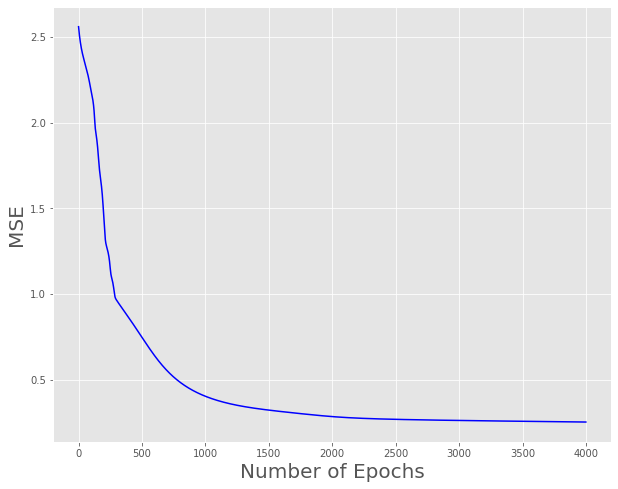

In [26]:
plt.figure(figsize=(10,8))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = plt.plot(range(epochMax),MSEAv,'b')
plt.xlabel('Number of Epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.show()

In [31]:
M1 = 0
Var = 1
N = 300
Mean = [M1, M1]
X = circGuass(N, Mean, Var)
df = pd.DataFrame(X).T # transposed for easier plotting
df = df[(df[0] * df[1]) >= 0] # slice df to get 1st and 3rd quadrant values
Y = circGuass(N, Mean, Var)
dg = pd.DataFrame(Y).T # transposed for easier plotting
dg = dg[(dg[0] * dg[1]) <= 0] # slice df to get 1st and 3rd quadrant values
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
XN = dg.values
XP = df.values
datamisclass = data
Ymisclass = MLP(datamisclass[:,0:2].T,Wh6,Wo6)    #pick one of the weights to classify new dataset
H = np.multiply(datamisclass[:,2],Ymisclass)
datamisclass[:,2] = H
misclass = datamisclass[datamisclass[:,2] <0]

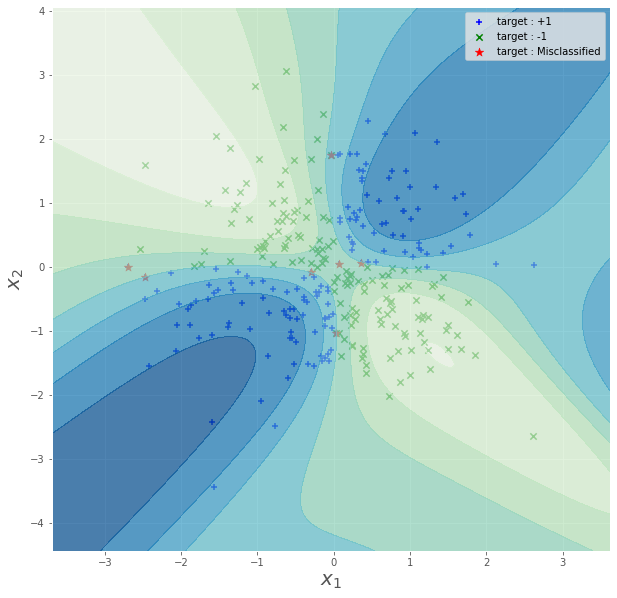

In [32]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(misclass[:,0],misclass[:,1],marker='*', c='r',label = "target : Misclassified", s=80)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))

# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
Y = MLP(Xvals[:,1:3].T,Wh6,Wo6)    #pick the weights you have selected in last section
# Plot contour plot
scores = Y.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.7,  cmap='GnBu')
# show the plot
plt.show()
plt.close()